# **Team 10 Group Project**

Your team is responsible for thoroughly exploring the provided dataset, providing descriptive
statistics, inspecting each gas station’s inventory replenishment pattern, visualizing it, and
suggesting a better inventory policy that may save these gas stations a significant amount of
money. Your decisions must be based on the provided data processed using python and its
data analysis packages. You can ignore the gas delivery cost and focus on making the correct
inventory replenishment decision that may reduce total purchasing cost while maintaining an
excellent customer service level (by not running out of gas).


# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
#!pip install missingno
import missingno as msno
import numpy as np
import seaborn as sns
#install and import folium package for Geographic Map
!pip install folium
import folium

plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams.update({'font.size': 10})

Defaulting to user installation because normal site-packages is not writeable


# Import datasets and preview

In [2]:
df_location = pd.read_csv('Locations.csv')
df_tanks = pd.read_csv('Tanks.csv')
df_invoices = pd.read_csv('Invoices.csv')
df_fuel_1 = pd.read_csv('Fuel_Level_Part_1.csv')
df_fuel_2 = pd.read_csv('Fuel_Level_Part_2.csv')

datasets = [df_location, df_tanks, df_invoices, df_fuel_1, df_fuel_2]
for dataset in datasets:
    display(dataset.head(2))

Gas Station Location Gas Station Name  \
0                     1        EastMount   
1                     2         Eastgate   

                                 Gas Station Address  Gas Station Latitude  \
0   386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada              43.23467   
1  75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...              43.23070   

   Gas Station Longitude  
0              -79.83651  
1              -79.76393

Tank ID  Tank Location  Tank Number Tank Type  Tank Capacity
0    T 10              1            1         U          40000
1    T 11              1            2         U          40000

Invoice Date  Invoice ID  Invoice Gas Station Location  Gross Purchase Cost  \
0     1/2/2017     10000.0                             1             7570.820   
1     1/2/2017     10001.0                             1            12491.853   

   Amount Purchased Fuel Type  
0          6609.600         G  
1          9338.736         D

Tank ID  Fuel Level     Time stamp
0    T 12     27161.0  1/1/2017 0:10
1    T 12     27017.0  1/1/2017 0:25

Tank ID  Fuel_Level      Timestamp
0    T 32       22327  1/1/2017 0:05
1    T 20       25215  1/1/2017 0:07

# Check data type and missing values

In [3]:
#Check datasets ana missing values
for dataset in datasets:
    print(dataset.info())
    display(dataset.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gas Station Location   8 non-null      int64  
 1   Gas Station Name       8 non-null      object 
 2   Gas Station Address    8 non-null      object 
 3   Gas Station Latitude   8 non-null      float64
 4   Gas Station Longitude  8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes
None


Gas Station Location     0
Gas Station Name         0
Gas Station Address      0
Gas Station Latitude     0
Gas Station Longitude    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tank ID        23 non-null     object
 1   Tank Location  23 non-null     int64 
 2   Tank Number    23 non-null     int64 
 3   Tank Type      23 non-null     object
 4   Tank Capacity  23 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB
None


Tank ID          0
Tank Location    0
Tank Number      0
Tank Type        0
Tank Capacity    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Invoice Date                  2873 non-null   object 
 1   Invoice ID                    2832 non-null   float64
 2   Invoice Gas Station Location  2873 non-null   int64  
 3   Gross Purchase Cost           2831 non-null   float64
 4   Amount Purchased              2831 non-null   float64
 5   Fuel Type                     2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 134.8+ KB
None


Invoice Date                     0
Invoice ID                      41
Invoice Gas Station Location     0
Gross Purchase Cost             42
Amount Purchased                42
Fuel Type                       42
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885151 entries, 0 to 885150
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tank ID     885151 non-null  object 
 1   Fuel Level  885149 non-null  float64
 2   Time stamp  885151 non-null  object 
dtypes: float64(1), object(2)
memory usage: 20.3+ MB
None


Tank ID       0
Fuel Level    2
Time stamp    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974509 entries, 0 to 974508
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Tank ID     974509 non-null  object
 1   Fuel_Level  974509 non-null  int64 
 2   Timestamp   974509 non-null  object
dtypes: int64(1), object(2)
memory usage: 22.3+ MB
None


Tank ID       0
Fuel_Level    0
Timestamp     0
dtype: int64

### Start with `df_tanks`
 - ##### check for missing values
 - ##### handle the missing values
 - ##### check for duplicate values
 - ##### `clean` the column names. This means consistency in column names (all lower case characters, all upper case characters, capitalize, use of _, etc etc). 
 - ##### get rid the row with `P` as fuel type.
 - ##### use `replace` function to change the code `U` to `G` (standing for `Gas`).
 - ##### find total capacity of each kind of fuel in each location. There are at least two different ways of doing this.
 - ##### plot the results from the previous question. 
 - ##### make sure the legend labels are `Gas`, `Diesel`. You need to use `object-oriented` approach (alongside pandas `plot` function)
 - ##### what fraction of locations have more capacity for `Diesel` than `Gas`?

- ##### check,handle the missing values,check for duplicate values and `clean` the column names.

In [4]:
df_tanks.columns

Index(['Tank ID', 'Tank Location', 'Tank Number', 'Tank Type',
       'Tank Capacity'],
      dtype='object')

In [5]:
df_tanks.columns = [item.replace(' ', '_').upper() for item in df_tanks.columns]
df_tanks.columns

Index(['TANK_ID', 'TANK_LOCATION', 'TANK_NUMBER', 'TANK_TYPE',
       'TANK_CAPACITY'],
      dtype='object')

<AxesSubplot:>

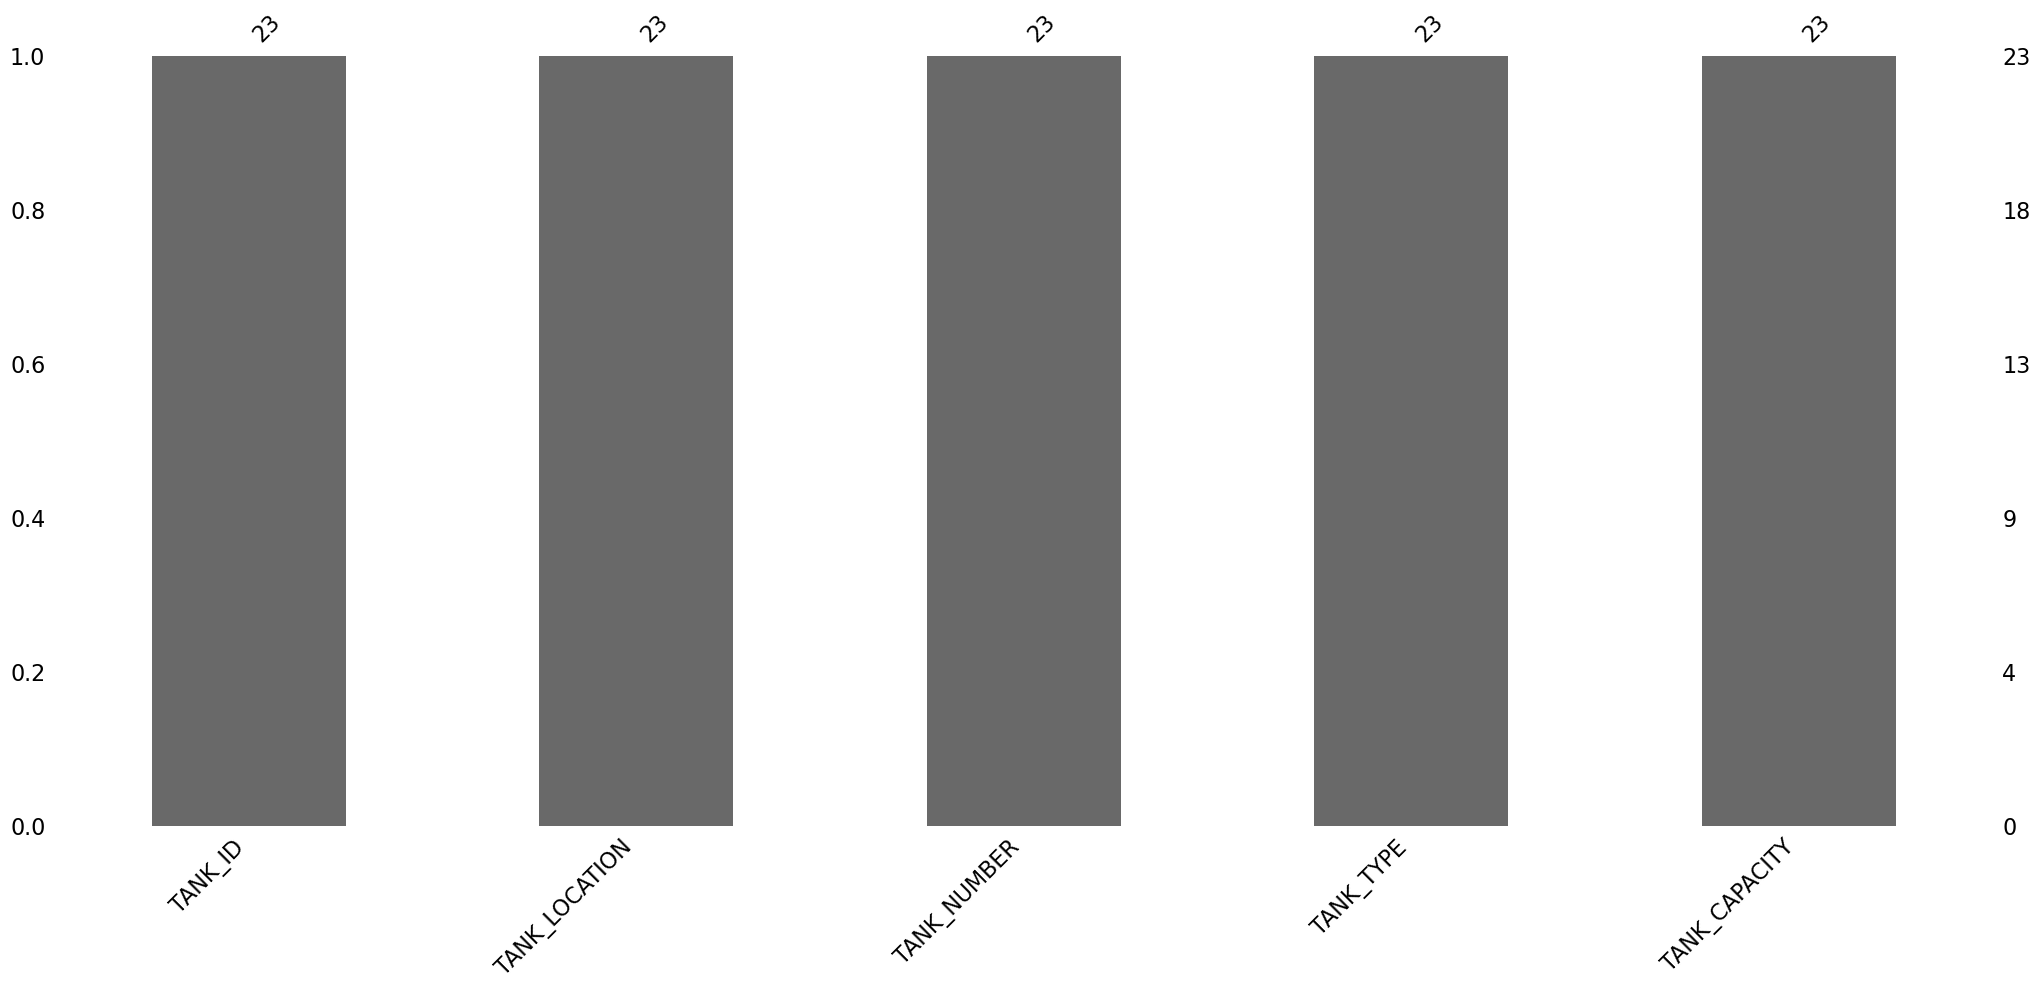

In [6]:
# missing values in df_tank
msno.bar(df_tanks)

<AxesSubplot:>

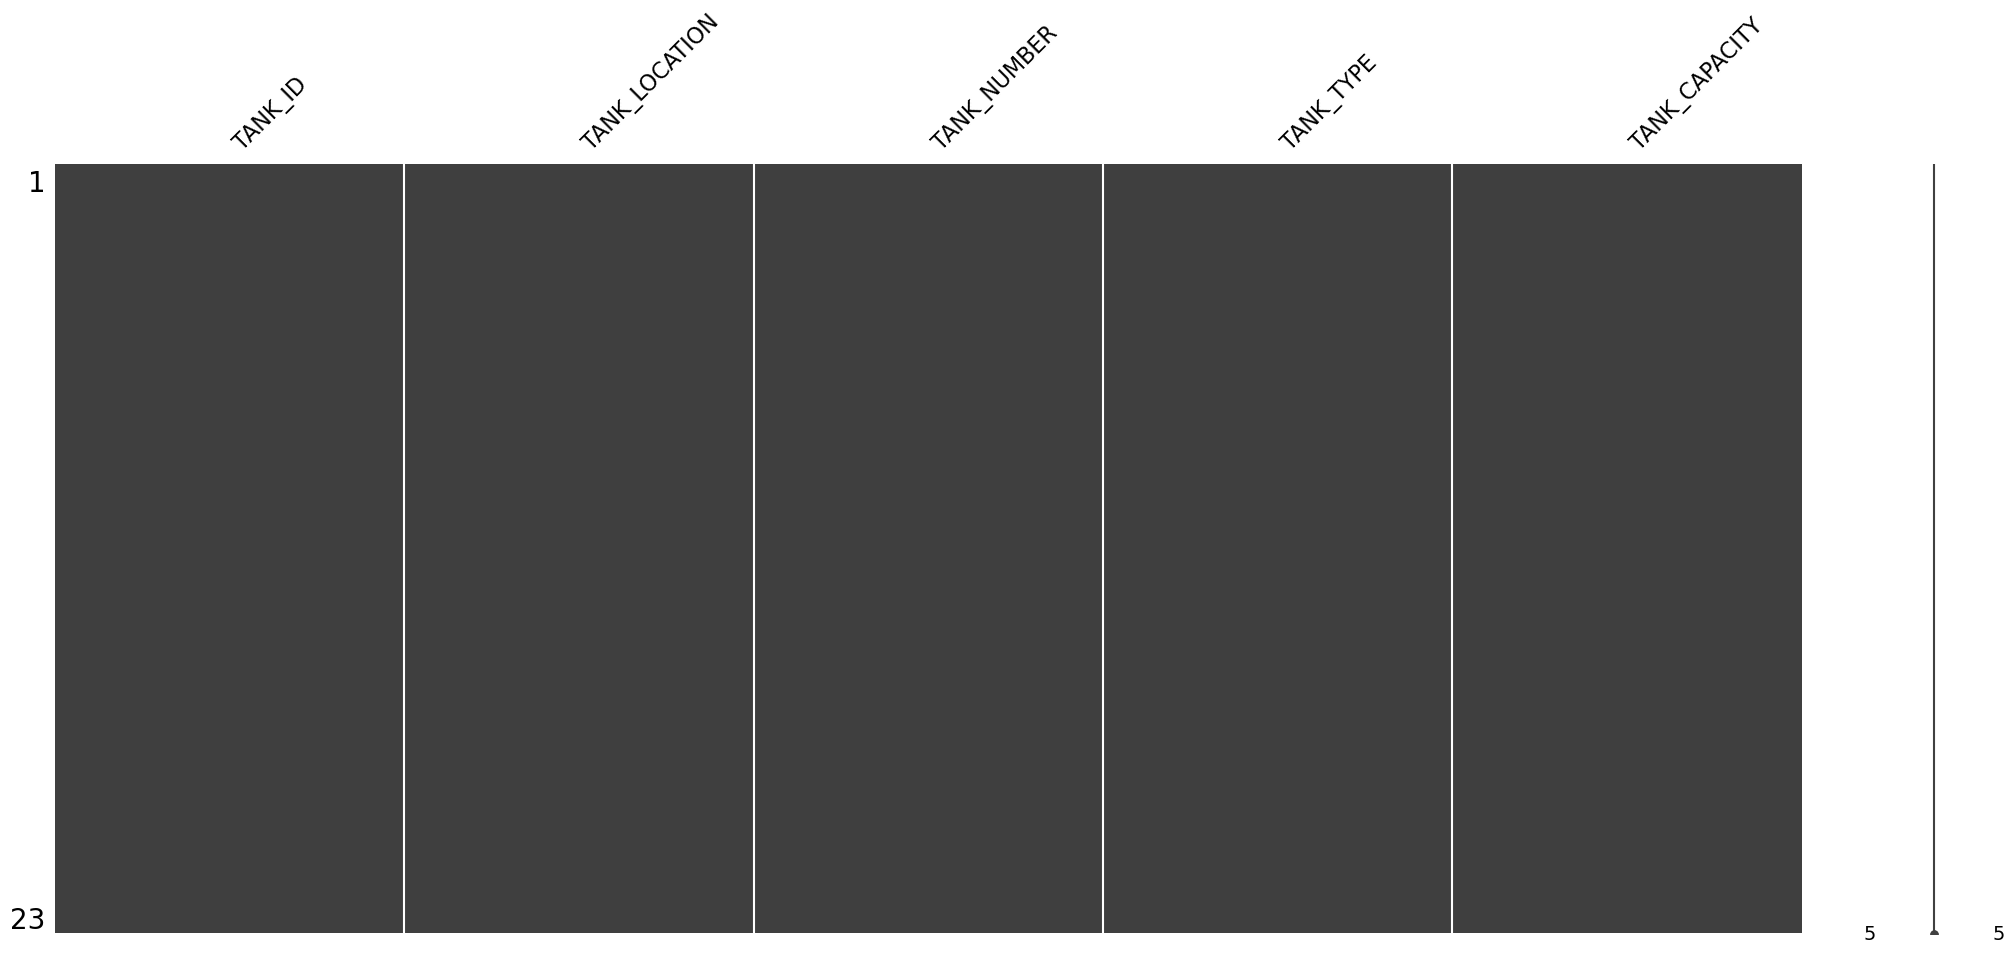

In [7]:
# doing matrix to see the locations of missing values in  df_tanks
msno.matrix(df_tanks)

In [8]:
df_tanks.isna().sum().sum()
#we can see there is no missing values in df_tanks.

0

In [9]:
df_tanks.TANK_ID.duplicated().sum()
# we can see each TANK_ID in df_tanks is unique.

0

In [10]:
df_tanks.TANK_NUMBER.duplicated()
# some values of tank_number are same.

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
Name: TANK_NUMBER, dtype: bool

In [11]:
df_tanks.TANK_TYPE.value_counts()
# As P is only in one Tank, we can ignore P completely.  With this assumption, G and U are precisely the same things. THEN we will 

U    12
D    10
P     1
Name: TANK_TYPE, dtype: int64

In [12]:
#Delete Tank Type == P in  df_tanks and replace Tank Type U to G
df_tanks = df_tanks.loc[df_tanks['TANK_TYPE'] != 'P']
df_tanks.loc[df_tanks['TANK_TYPE'] == 'U', 'TANK_TYPE'] = 'G'

In [13]:
df_tanks
# so far df_tanks: no insane data; P is gone, U is replaced with G.
# df_tanks is clean and ready to be processed.

TANK_ID  TANK_LOCATION  TANK_NUMBER TANK_TYPE  TANK_CAPACITY
0     T 10              1            1         G          40000
1     T 11              1            2         G          40000
2     T 12              1            3         D          40000
4     T 14              1            5         G          40000
5     T 15              1            6         D          40000
6     T 16              2            1         G          70000
7     T 17              2            2         D          40000
8     T 18              2            3         G          40000
9     T 19              2            4         D          70000
10    T 20              3            1         G          30000
11    T 21              3            2         D          30000
12    T 22              4            1         G          40000
13    T 23              4            2         D          40000
14    T 24              5            1         D          25000
15    T 25              5            2         G          25000
16    T 26              6            1         G          30000
17    T 27              6            2         G          30000
18    T 28              6            3         D          30000
19    T 29              7            1         G           5000
20    T 30              7            2         D           5000
21    T 31              8            1         D          40000
22    T 32              8            2         G          40000

# continue with `locations`, `invoice`
 - ##### check for missing values
 - ##### handle the missing values (check with locations have most missing values, etc etc). Is there any data point that doesn't make sense?
 - ##### check for duplicate values (show `duplicated` values) and handle them
 - ##### clean column names in a similar fashion
 - ##### check the correctness of the data format? (`Date`, `Object`, etc)
 - ##### which location has paid most fuel purchase cost?
 - ##### what fraction of overall fuel purchased is `Gas` or `Diesel`? This is an estimate of amount of each fuel type sold


<AxesSubplot:>

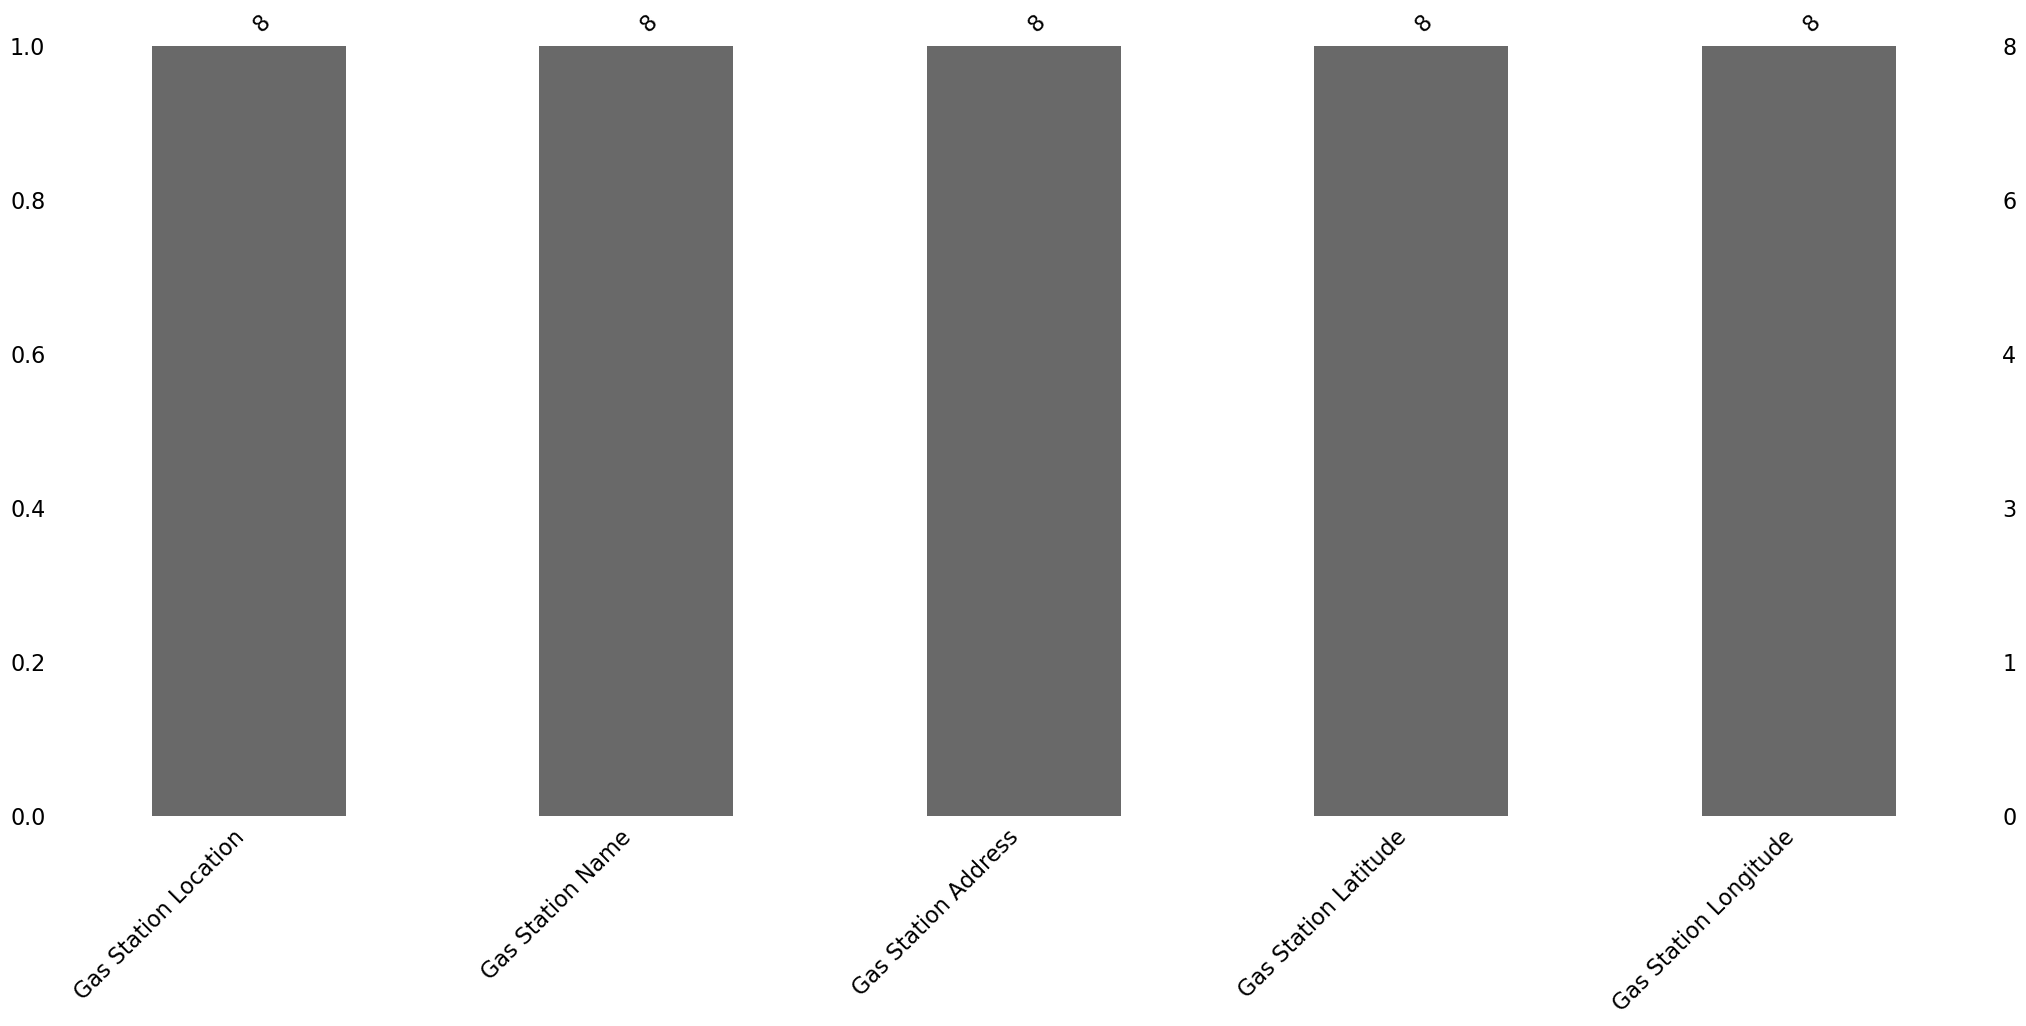

In [14]:
# missing values in df_location
msno.bar(df_location)

In [15]:
df_location.isna().sum().sum()
#we can see no missing values in df_location.

0

In [16]:
df_location.columns = [item.replace(' ', '_').upper() for item in df_location.columns]
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GAS_STATION_LOCATION   8 non-null      int64  
 1   GAS_STATION_NAME       8 non-null      object 
 2   GAS_STATION_ADDRESS    8 non-null      object 
 3   GAS_STATION_LATITUDE   8 non-null      float64
 4   GAS_STATION_LONGITUDE  8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes


In [17]:
df_location.duplicated()
# and there is no same values in df_location

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [18]:
df_location

GAS_STATION_LOCATION GAS_STATION_NAME  \
0                     1        EastMount   
1                     2         Eastgate   
2                     3          Central   
3                     4          Chedoke   
4                     5    Mountain View   
5                     6         Oakville   
6                     7           Circle   
7                     8          Chappel   

                                 GAS_STATION_ADDRESS  GAS_STATION_LATITUDE  \
0   386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada             43.234670   
1  75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...             43.230700   
2         80 Park St N, Hamilton, ON L8R 2M9, Canada             43.260260   
3        16 McMaster Ave, Dundas, ON L9H 0A8, Canada             43.261849   
4        985 Scenic Dr, Hamilton, ON L9C 1H7, Canada             43.244910   
5    503 Plains Rd E, Burlington, ON L7T 2E2, Canada             43.319160   
6  1170 Upper James St, Hamilton, ON L9C 3B1, Canada             43.216968   
7  1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...             38.875955   

   GAS_STATION_LONGITUDE  
0             -79.836510  
1             -79.763930  
2             -79.870580  
3             -79.937057  
4             -79.921850  
5             -79.836340  
6             -79.894023  
7             -77.024461

# DATA Visualization for DF_TANKS for QUESTION 1
## QUESTION 1 total capacity of fuel types in each location

    TANK_LOCATION TANK_TYPE  TANK_CAPACITY
0               1         D          80000
1               1         G         120000
2               2         D         110000
3               2         G         110000
4               3         D          30000
5               3         G          30000
6               4         D          40000
7               4         G          40000
8               5         D          25000
9               5         G          25000
10              6         D          30000
11              6         G          60000
12              7         D           5000
13              7         G           5000
14              8         D          40000
15              8         G          40000


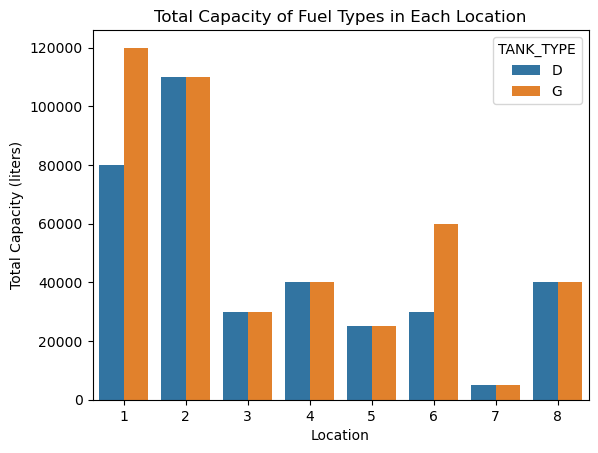

we can see the one that has the highest capacity for G fuel type is LOCATION_1 and that has the lowest capacity for G fuel type is LOCATION_7.
we can see the one that has the highest capacity for D fuel type is LOCATION_2 and that has the lowest capacity for D fuel type is LOCATION_7.


In [19]:
## DATA Visualization for DF_TANKS for QUESTION 1
## QUESTION 1
df_TANKS_each_GAS = df_tanks.groupby(['TANK_LOCATION', 'TANK_TYPE'])['TANK_CAPACITY'].sum().reset_index()
print(df_TANKS_each_GAS)
# Create a bar plot using seaborn
sns.barplot(x='TANK_LOCATION', y='TANK_CAPACITY', hue='TANK_TYPE', data=df_TANKS_each_GAS)
plt.title('Total Capacity of Fuel Types in Each Location')
plt.xlabel('Location')
plt.ylabel('Total Capacity (liters)')
plt.show()

print('we can see the one that has the highest capacity for G fuel type is LOCATION_1 and that has the lowest capacity for G fuel type is LOCATION_7.')
print('we can see the one that has the highest capacity for D fuel type is LOCATION_2 and that has the lowest capacity for D fuel type is LOCATION_7.')

## QEUSTION2 total capacity of gas and diesel in all locations

In [20]:
df_tanks.groupby(by = ['TANK_TYPE']).TANK_CAPACITY.sum()

TANK_TYPE
D    360000
G    430000
Name: TANK_CAPACITY, dtype: int64

<AxesSubplot:xlabel='TANK_TYPE'>

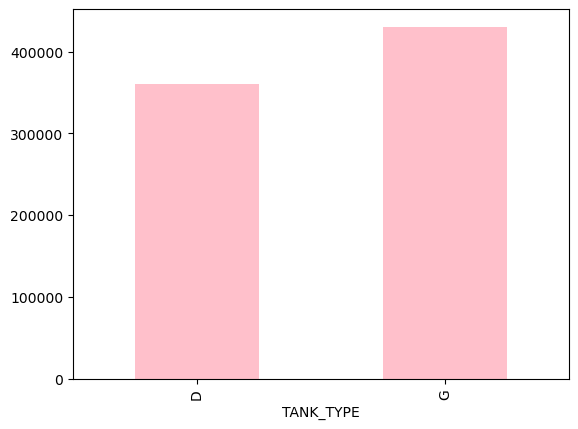

In [21]:
# make the plot of total capacity of gas and diesel in all locations
df_TANKS_type_GAS = df_tanks.groupby(by = ['TANK_TYPE']).TANK_CAPACITY.sum().plot(kind = 'bar',color ='pink') 
df_TANKS_type_GAS

## QUESTION 3 what fraction of locations have more capacity for Diesel than Gas?

In [22]:
# try pivot_table for question 1

In [23]:
capacity_each_type = df_tanks.pivot_table(index='TANK_LOCATION',
                      columns='TANK_TYPE',
                      values = 'TANK_CAPACITY',
                      aggfunc='sum',)

<AxesSubplot:xlabel='TANK_LOCATION'>

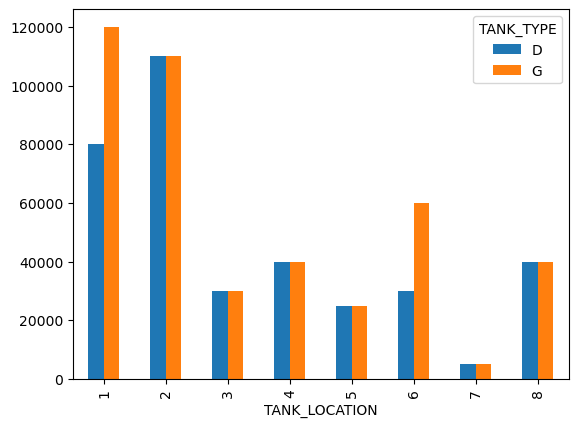

In [24]:
capacity_each_type.plot(kind = 'bar')

In [25]:
capacity_each_type

TANK_TYPE           D       G
TANK_LOCATION                
1               80000  120000
2              110000  110000
3               30000   30000
4               40000   40000
5               25000   25000
6               30000   60000
7                5000    5000
8               40000   40000

In [26]:
capacity_each_type.D.gt(capacity_each_type.G).mul(100).mean()
print(f'the {capacity_each_type.D.gt(capacity_each_type.G).mul(100).mean()} locations have more capacity for Diesel than Gas.')

the 0.0 locations have more capacity for Diesel than Gas.


## QUESTION 4 in how many locations Gas and Diesel have the same capacity?

In [27]:
(capacity_each_type.D == capacity_each_type.G).sum()
print(f'Gas and Diesel have the same capacity in {(capacity_each_type.D == capacity_each_type.G).sum()} locations.')

Gas and Diesel have the same capacity in 6 locations.


## QEUSTION 5 use GAS_STATION_LATITUDE to plot a Geographic Map

In [28]:
df_location

GAS_STATION_LOCATION GAS_STATION_NAME  \
0                     1        EastMount   
1                     2         Eastgate   
2                     3          Central   
3                     4          Chedoke   
4                     5    Mountain View   
5                     6         Oakville   
6                     7           Circle   
7                     8          Chappel   

                                 GAS_STATION_ADDRESS  GAS_STATION_LATITUDE  \
0   386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada             43.234670   
1  75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...             43.230700   
2         80 Park St N, Hamilton, ON L8R 2M9, Canada             43.260260   
3        16 McMaster Ave, Dundas, ON L9H 0A8, Canada             43.261849   
4        985 Scenic Dr, Hamilton, ON L9C 1H7, Canada             43.244910   
5    503 Plains Rd E, Burlington, ON L7T 2E2, Canada             43.319160   
6  1170 Upper James St, Hamilton, ON L9C 3B1, Canada             43.216968   
7  1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...             38.875955   

   GAS_STATION_LONGITUDE  
0             -79.836510  
1             -79.763930  
2             -79.870580  
3             -79.937057  
4             -79.921850  
5             -79.836340  
6             -79.894023  
7             -77.024461

In [29]:
map_center = [df_location['GAS_STATION_LATITUDE'].mean(), df_location['GAS_STATION_LONGITUDE'].mean()]
gm = folium.Map(location = map_center, zoom_start = 6)

for index, row in df_location.iterrows():
    coordinates = [row['GAS_STATION_LATITUDE'], row['GAS_STATION_LONGITUDE']]
    popup = f"Gas Station {index}"
    marker = folium.Marker(location = coordinates, popup = popup)
    marker.add_to(gm)
gm

### FOR INVOICES data cleanning, replace

In [30]:
df_invoices.columns = [item.replace(' ', '_').upper() for item in df_invoices.columns]
df_invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   INVOICE_DATE                  2873 non-null   object 
 1   INVOICE_ID                    2832 non-null   float64
 2   INVOICE_GAS_STATION_LOCATION  2873 non-null   int64  
 3   GROSS_PURCHASE_COST           2831 non-null   float64
 4   AMOUNT_PURCHASED              2831 non-null   float64
 5   FUEL_TYPE                     2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 134.8+ KB


<AxesSubplot:>

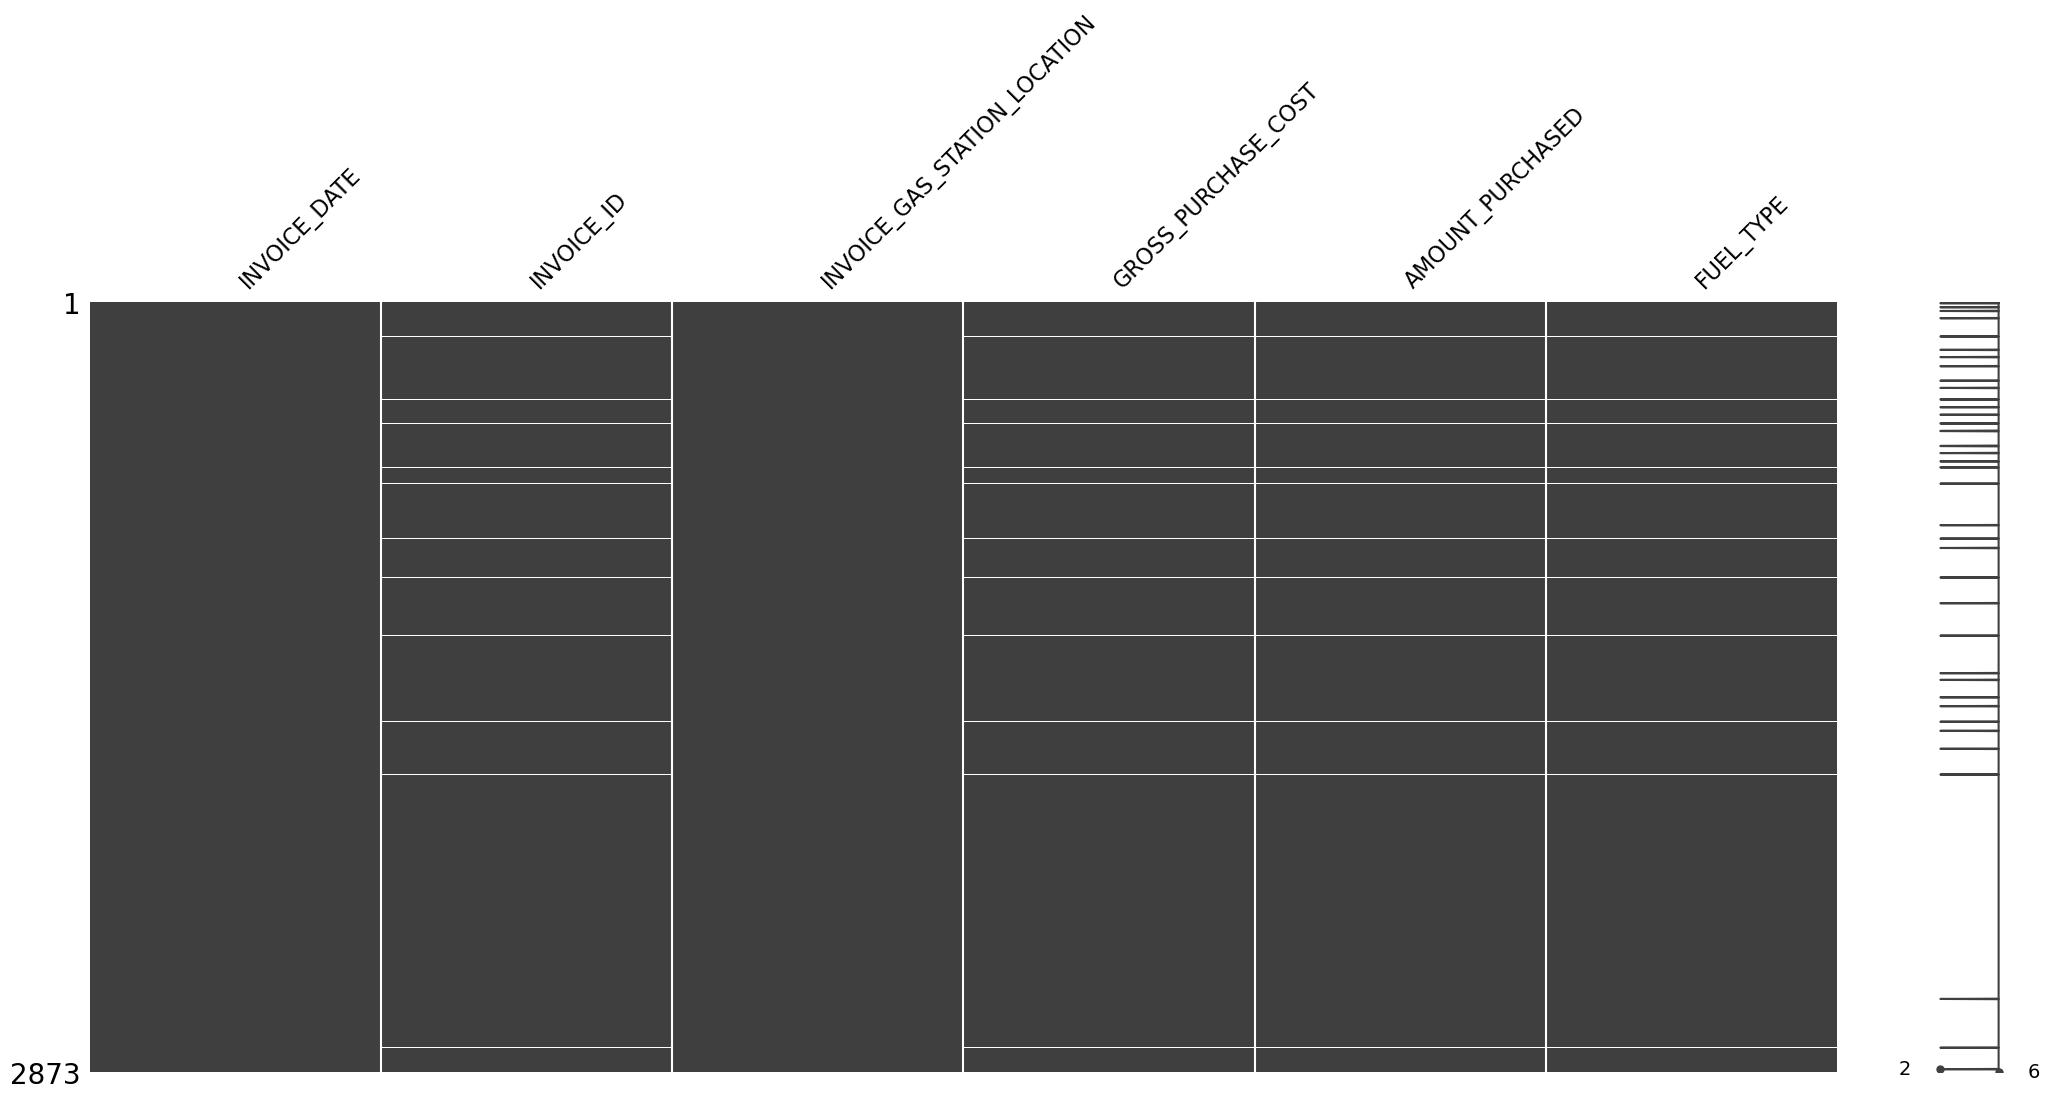

In [31]:
## checking misssing values
msno.matrix(df_invoices)

<AxesSubplot:>

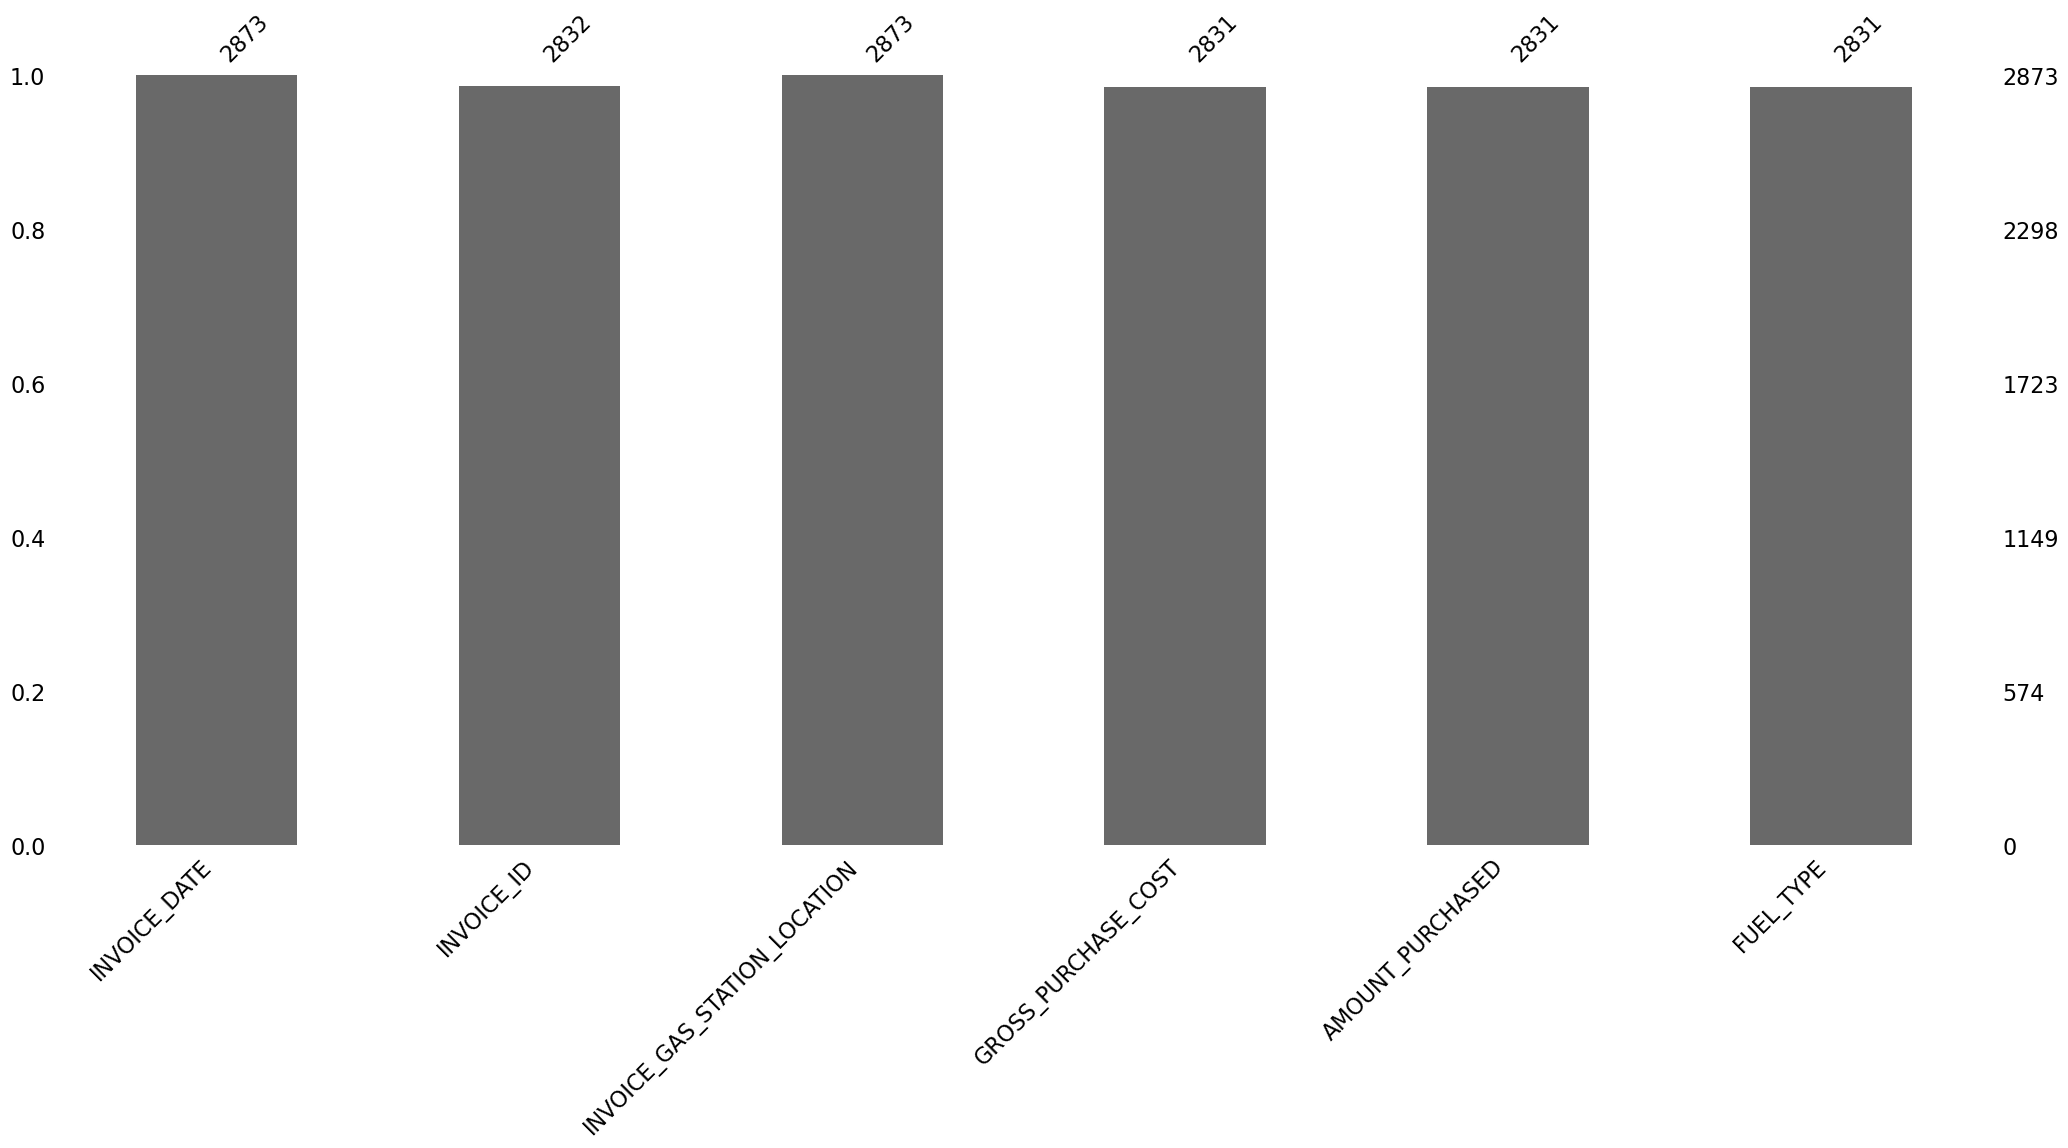

In [32]:
msno.bar(df_invoices)

In [33]:
# checking whether INVOIVE_ID has missing value
df_invoices[df_invoices.INVOICE_ID.isna()]

INVOICE_DATE  INVOICE_ID  INVOICE_GAS_STATION_LOCATION  \
4        1/2/2017         NaN                             2   
19       1/5/2017         NaN                             1   
33       1/9/2017         NaN                             1   
60      1/17/2017         NaN                             3   
128      2/8/2017         NaN                             2   
178     2/24/2017         NaN                             1   
205      3/6/2017         NaN                             5   
239     3/15/2017         NaN                             4   
293      4/4/2017         NaN                             2   
320     4/11/2017         NaN                             6   
363     4/26/2017         NaN                             3   
392      5/5/2017         NaN                             1   
420     5/12/2017         NaN                             5   
452     5/24/2017         NaN                             5   
453     5/24/2017         NaN                             5   
480     5/31/2017         NaN                             4   
481     5/31/2017         NaN                             4   
536     6/14/2017         NaN                             8   
537     6/14/2017         NaN                             8   
563     6/21/2017         NaN                             3   
594     6/30/2017         NaN                             1   
616      7/6/2017         NaN                             4   
617      7/6/2017         NaN                             4   
677     7/24/2017         NaN                             1   
832      9/8/2017         NaN                             5   
882     9/28/2017         NaN                             3   
917     10/9/2017         NaN                             4   
1027   11/17/2017         NaN                             2   
1123   12/20/2017         NaN                             8   
1244    1/31/2018         NaN                             2   
1384    3/16/2018         NaN                            20   
1409    3/23/2018         NaN                            17   
1474    4/16/2018         NaN                             5   
1507    4/26/2018         NaN                            21   
1565    5/15/2018         NaN                             3   
1599    5/25/2018         NaN                             5   
1666    6/18/2018         NaN                            41   
1762    7/20/2018         NaN                            11   
2599    4/30/2019         NaN                             2   
2781     7/9/2019         NaN                             6   
2861     8/9/2019         NaN                             4   

      GROSS_PURCHASE_COST  AMOUNT_PURCHASED FUEL_TYPE  
4                     NaN               NaN       NaN  
19                    NaN               NaN       NaN  
33                    NaN               NaN       NaN  
60                    NaN               NaN       NaN  
128                   NaN               NaN       NaN  
178                   NaN               NaN       NaN  
205                   NaN               NaN       NaN  
239                   NaN               NaN       NaN  
293                   NaN               NaN       NaN  
320                   NaN               NaN       NaN  
363                   NaN               NaN       NaN  
392                   NaN               NaN       NaN  
420                   NaN               NaN       NaN  
452                   NaN               NaN       NaN  
453                   NaN               NaN       NaN  
480                   NaN               NaN       NaN  
481                   NaN               NaN       NaN  
536                   NaN               NaN       NaN  
537                   NaN               NaN       NaN  
563                   NaN               NaN       NaN  
594                   NaN               NaN       NaN  
616                   NaN               NaN       NaN  
617                   NaN               NaN       NaN  
677           

In [34]:
df_invoices.INVOICE_GAS_STATION_LOCATION.value_counts()
#print('we can see location 1,location 2,location 4 and location 5 are the top 5 locations that buy fuel frequently.')
#print('we only have 8 locations so that location 20,location 17,location 21 ,location 41 and location 11 are wrong rows.')

1     1368
2      638
4      363
5      287
3       85
7       52
6       44
8       31
20       1
17       1
21       1
41       1
11       1
Name: INVOICE_GAS_STATION_LOCATION, dtype: int64

In [35]:
# so that we can  create a new dataframe df_invoces_2
df_invoices = df_invoices[df_invoices.INVOICE_GAS_STATION_LOCATION.le(8)]

In [36]:
df_invoices.INVOICE_GAS_STATION_LOCATION.value_counts()

1    1368
2     638
4     363
5     287
3      85
7      52
6      44
8      31
Name: INVOICE_GAS_STATION_LOCATION, dtype: int64

<AxesSubplot:>

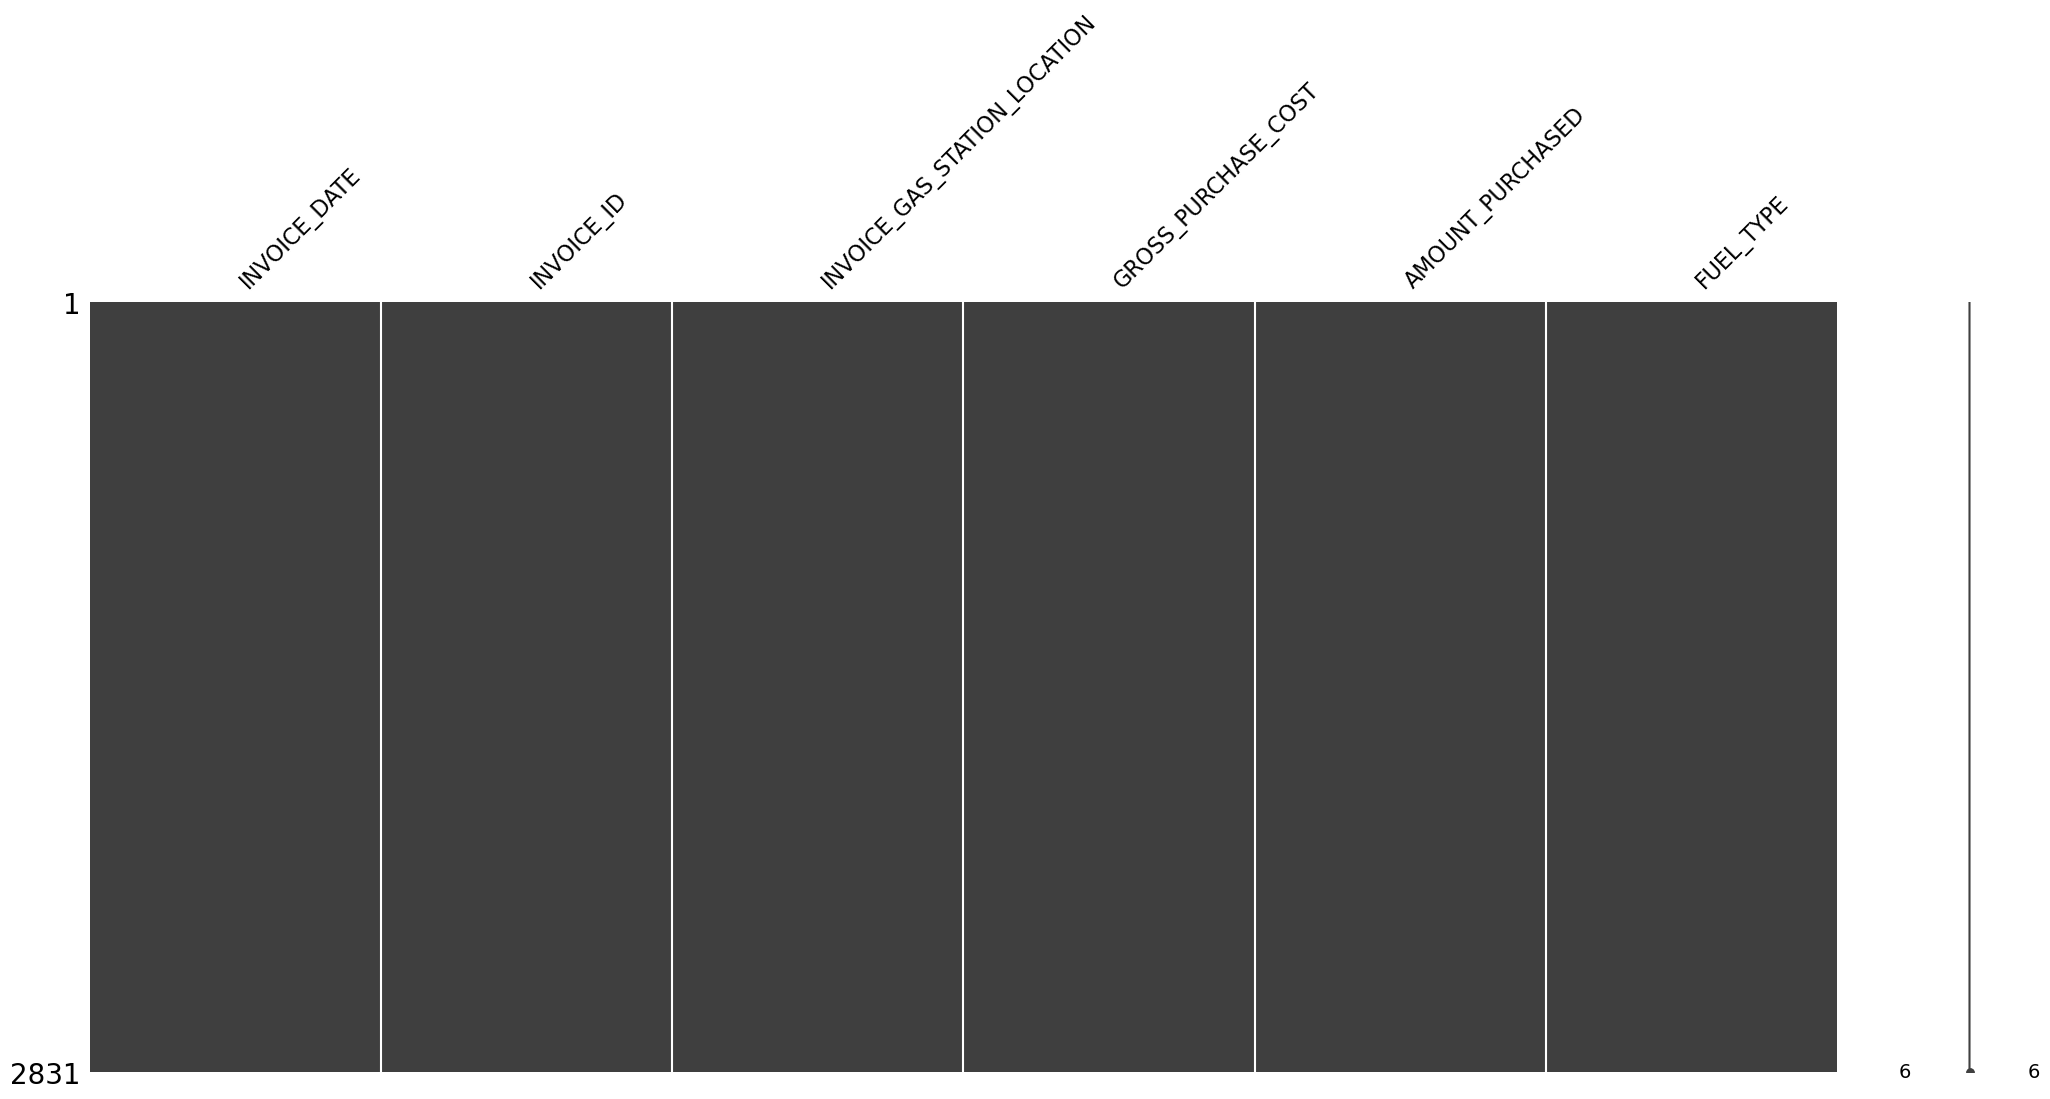

In [37]:
# get rid of the missing rows
msno.matrix(df_invoices.dropna())

In [38]:
# then drop nan values in df_invoices
df_invoices = df_invoices.copy()
df_invoices.dropna(how = 'any', inplace = True)

In [39]:
# then we change the date type in df_invoices_2
df_invoices['INVOICE_DATE'] = pd.to_datetime(df_invoices['INVOICE_DATE'])

In [40]:
df_invoices.info()
# then the dataframe df_invoices is ready to analyse.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   INVOICE_DATE                  2831 non-null   datetime64[ns]
 1   INVOICE_ID                    2831 non-null   float64       
 2   INVOICE_GAS_STATION_LOCATION  2831 non-null   int64         
 3   GROSS_PURCHASE_COST           2831 non-null   float64       
 4   AMOUNT_PURCHASED              2831 non-null   float64       
 5   FUEL_TYPE                     2831 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 154.8+ KB


# DATA VISUALIZAIOTN in DF_INVOICES

## QUESTION1: what is the unit_COST of each fuel type?
#### calculate unit cost of acquiring fuel
#### using `dt` create a column for day of the week name
#### for each fuel type, calculate `min`, `mean`, `max` of unit fuel price per day of the week

In [41]:
# for "G" type
df_invoices['UNIT_COST'] = df_invoices.GROSS_PURCHASE_COST.div(df_invoices.AMOUNT_PURCHASED)

In [42]:
df_invoices_G = df_invoices[df_invoices.FUEL_TYPE.eq('G')]

In [43]:
df_invoices_G.head()

INVOICE_DATE  INVOICE_ID  INVOICE_GAS_STATION_LOCATION  \
0    2017-01-02     10000.0                             1   
9    2017-01-03     10007.0                             1   
10   2017-01-03     10008.0                             1   
11   2017-01-03     10009.0                             2   
12   2017-01-03     10010.0                             2   

    GROSS_PURCHASE_COST  AMOUNT_PURCHASED FUEL_TYPE  UNIT_COST  
0            7570.82000          6609.600         G   1.145428  
9            7627.60115          6659.184         G   1.145426  
10          32175.98500         26704.960         G   1.204869  
11           9467.31041          8265.312         G   1.145427  
12           9463.52500          8262.000         G   1.145428

In [44]:
df_invoices_G = df_invoices_G.copy()
df_invoices_G['DAY_NAME'] = df_invoices_G.INVOICE_DATE.dt.day_name()
df_invoices_G.head()

INVOICE_DATE  INVOICE_ID  INVOICE_GAS_STATION_LOCATION  \
0    2017-01-02     10000.0                             1   
9    2017-01-03     10007.0                             1   
10   2017-01-03     10008.0                             1   
11   2017-01-03     10009.0                             2   
12   2017-01-03     10010.0                             2   

    GROSS_PURCHASE_COST  AMOUNT_PURCHASED FUEL_TYPE  UNIT_COST DAY_NAME  
0            7570.82000          6609.600         G   1.145428   Monday  
9            7627.60115          6659.184         G   1.145426  Tuesday  
10          32175.98500         26704.960         G   1.204869  Tuesday  
11           9467.31041          8265.312         G   1.145427  Tuesday  
12           9463.52500          8262.000         G   1.145428  Tuesday

<AxesSubplot:xlabel='DAY_NAME'>

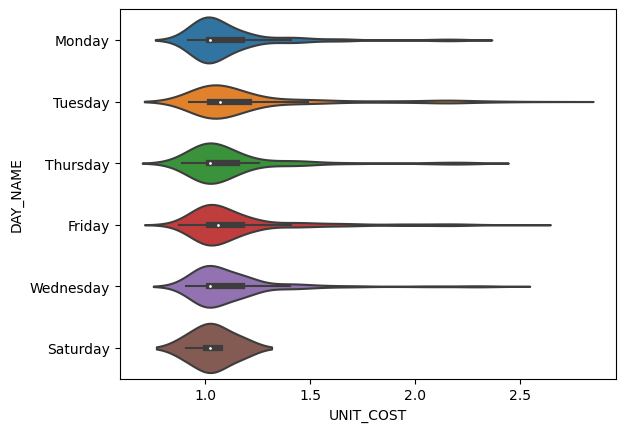

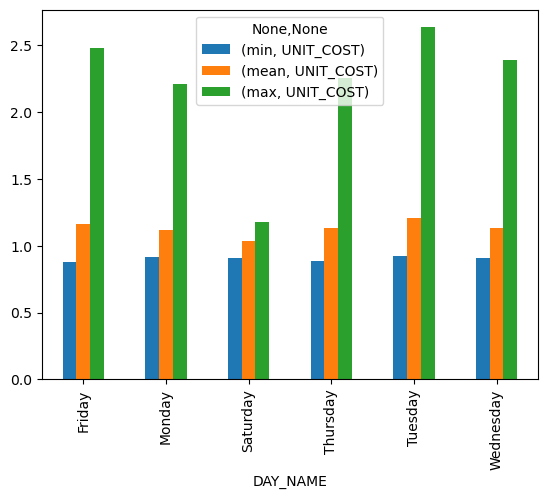

In [45]:
sns.violinplot(y = 'DAY_NAME', x = 'UNIT_COST', data = df_invoices_G,title ='unit cost for Fuel G')
df_invoices_G.pivot_table(index = 'DAY_NAME',
                         values = 'UNIT_COST',
                         aggfunc=['min', 'mean', 'max']).plot(kind = 'bar')

DAY_NAME
Friday       AxesSubplot(0.125,0.11;0.775x0.77)
Monday       AxesSubplot(0.125,0.11;0.775x0.77)
Saturday     AxesSubplot(0.125,0.11;0.775x0.77)
Thursday     AxesSubplot(0.125,0.11;0.775x0.77)
Tuesday      AxesSubplot(0.125,0.11;0.775x0.77)
Wednesday    AxesSubplot(0.125,0.11;0.775x0.77)
Name: UNIT_COST, dtype: object

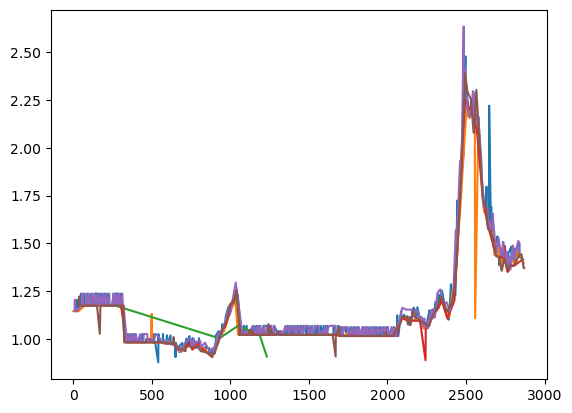

In [46]:
df_invoices_G.groupby(by = 'DAY_NAME').UNIT_COST.plot()

In [47]:
# for D fuel type, the unit price and min,mean,max are shown below

In [48]:
df_invoices_D = df_invoices[df_invoices.FUEL_TYPE.eq('D')]
df_invoices_D.head()

INVOICE_DATE  INVOICE_ID  INVOICE_GAS_STATION_LOCATION  GROSS_PURCHASE_COST  \
1   2017-01-02     10001.0                             1          12491.85300   
3   2017-01-02     10002.0                             2          17034.34500   
5   2017-01-02     10003.0                             2          12616.77153   
6   2017-01-02     10004.0                             4          11363.80082   
7   2017-01-02     10005.0                             5           9573.30189   

   AMOUNT_PURCHASED FUEL_TYPE  UNIT_COST  
1          9338.736         D   1.337639  
3         13377.824         D   1.273327  
5          9432.112         D   1.337640  
6          9139.200         D   1.243413  
7          7156.864         D   1.337639

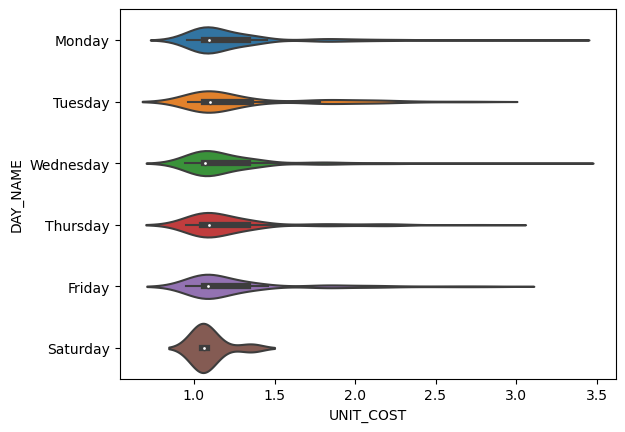

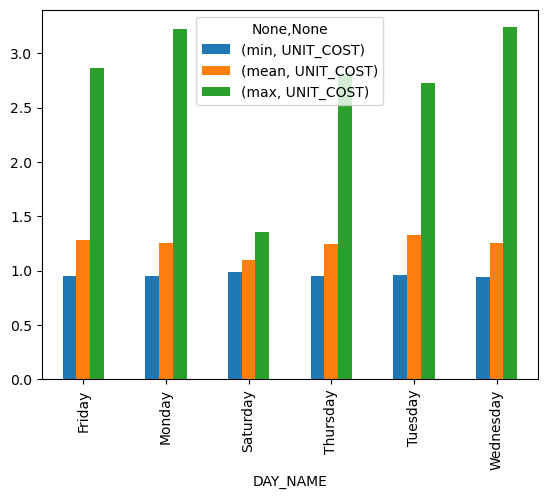

In [49]:
df_invoices_D = df_invoices_D.copy()
df_invoices_D['DAY_NAME'] = df_invoices_D.INVOICE_DATE.dt.day_name()
invoices_D_VP = sns.violinplot(y = 'DAY_NAME', x = 'UNIT_COST', data = df_invoices_D,title ='unit cost for Fuel D')
invoices_D_PT = df_invoices_D.pivot_table(index = 'DAY_NAME',
                         values = 'UNIT_COST',
                         aggfunc=['min', 'mean', 'max']).plot(kind = 'bar')

DAY_NAME
Friday       AxesSubplot(0.125,0.11;0.775x0.77)
Monday       AxesSubplot(0.125,0.11;0.775x0.77)
Saturday     AxesSubplot(0.125,0.11;0.775x0.77)
Thursday     AxesSubplot(0.125,0.11;0.775x0.77)
Tuesday      AxesSubplot(0.125,0.11;0.775x0.77)
Wednesday    AxesSubplot(0.125,0.11;0.775x0.77)
Name: UNIT_COST, dtype: object

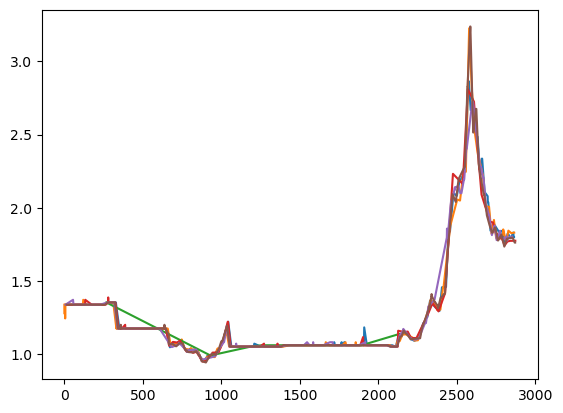

In [50]:
df_invoices_D.groupby(by = 'DAY_NAME').UNIT_COST.plot()

## Question2: which location has paid most fuel purchase cost?
###  what fraction of overall fuel purchased is Gas or Diesel? This is an estimate of amount of each fuel type

LOCATION_1 has paid most fuel purchase cost.
LOCATION_1 has paid most fuel purchase amount.


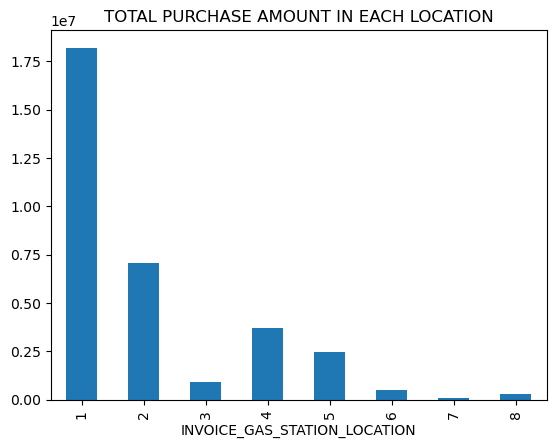

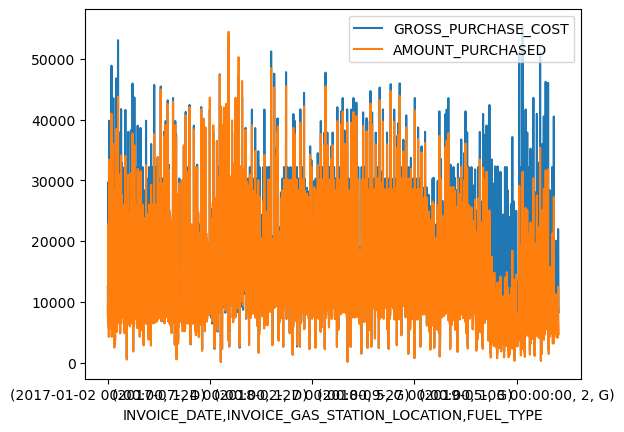

In [51]:
# make a plot to see the situation about purchase cost in each location
df_invoices.groupby(by = 'INVOICE_GAS_STATION_LOCATION').GROSS_PURCHASE_COST.sum().plot(kind = 'bar',title = 'TOTAL PURCHASE COST FOR EACH LOCATION')
print('LOCATION_1 has paid most fuel purchase cost.')
df_invoices.groupby(by = 'INVOICE_GAS_STATION_LOCATION').AMOUNT_PURCHASED.sum().plot(kind = 'bar',title = 'TOTAL PURCHASE AMOUNT IN EACH LOCATION')
print('LOCATION_1 has paid most fuel purchase amount.')
df_test = df_invoices.groupby(by=['INVOICE_DATE', 'INVOICE_GAS_STATION_LOCATION', 'FUEL_TYPE'])[['GROSS_PURCHASE_COST', 'AMOUNT_PURCHASED']].sum().plot()

## QEUSTION3 : caculate the total savings for each tank considering the inflation rate

In [52]:
inflation_2017 = pd.Series([1.1, 1.2, 1.1, 1, 0.9, 0.9, 1.1, 1.2, 1.3, 1.3, 1.4, 1.6]) / 100
inflation_2018 = pd.Series([1.6, 1.8, 1.8, 1.8, 1.8, 1.9, 2.1, 2, 1.8, 1.9, 1.8, 1.8]) / 100
inflation_2019 = pd.Series([1.7, 1.8, 2, 2, 2.2, 2.1, 2.2, 2.1]) / 100

cum_inflation = pd.concat([(inflation_2017 + 1), (inflation_2018 + 1), (inflation_2019 + 1)]).reset_index(drop=True).cumprod()
month1 = 1
cum_inflation1 = pd.Series([month1] + list(cum_inflation))

In [53]:
# add inflation rate to invoice.
#add cumulation inflation rate to invoice.
for num in range(1,13):
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2017) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Inflation rate'] = inflation_2017[num-1]
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2017) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Cumulation Inflation rate'] = cum_inflation1[num-1]
for num in range(1,13):
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2018) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Inflation rate'] = inflation_2018[num-1]
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2018) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Cumulation Inflation rate'] = cum_inflation1[num-1+12]
for num in range(1,9):
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2019) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Inflation rate'] = inflation_2019[num-1]
    df_invoices.loc[(df_invoices['INVOICE_DATE'].dt.year == 2019) & (df_invoices['INVOICE_DATE'].dt.month == num), 'Cumulation Inflation rate'] = cum_inflation1[num-1+25]
# convert value to Jan 1st 2017
df_invoices['2017-1-1 value'] = df_invoices['GROSS_PURCHASE_COST']/df_invoices['Cumulation Inflation rate']
#add discount
df_invoices.loc[(df_invoices['AMOUNT_PURCHASED']<=15000, 'Total_discount(dollars)')] = 0
df_invoices.loc[(df_invoices['AMOUNT_PURCHASED']>15000) &(df_invoices['AMOUNT_PURCHASED']<=25000), 'Total_discount(dollars)'] = 2*df_invoices['AMOUNT_PURCHASED']/100
df_invoices.loc[(df_invoices['AMOUNT_PURCHASED']>25000) &(df_invoices['AMOUNT_PURCHASED']<=40000), 'Total_discount(dollars)'] = 3*df_invoices['AMOUNT_PURCHASED']/100
df_invoices.loc[(df_invoices['AMOUNT_PURCHASED']>40000), 'Total_discount(dollars)'] = 4*df_invoices['AMOUNT_PURCHASED']/100
df_invoices['2017-1-1 discount'] = df_invoices['Total_discount(dollars)']/df_invoices['Cumulation Inflation rate']

In [54]:
sum_discount = df_invoices.groupby(['INVOICE_GAS_STATION_LOCATION','FUEL_TYPE'])['2017-1-1 discount'].sum()
sum_discount

INVOICE_GAS_STATION_LOCATION  FUEL_TYPE
1                             D              2052.617305
                              G            158426.970731
2                             D              5763.375220
                              G              3187.545422
3                             D               293.542281
                              G              1509.473542
4                             D               273.529788
                              G                 0.000000
5                             D                 0.000000
                              G                 0.000000
6                             D                 0.000000
                              G              1288.807569
7                             D                 0.000000
                              G                 0.000000
8                             D               443.670446
                              G               790.326302
Name: 2017-1-1 discount, dtype: float64

[Text(0.5, 1.0, 'Total saving of different types of fuel in each gas station')]

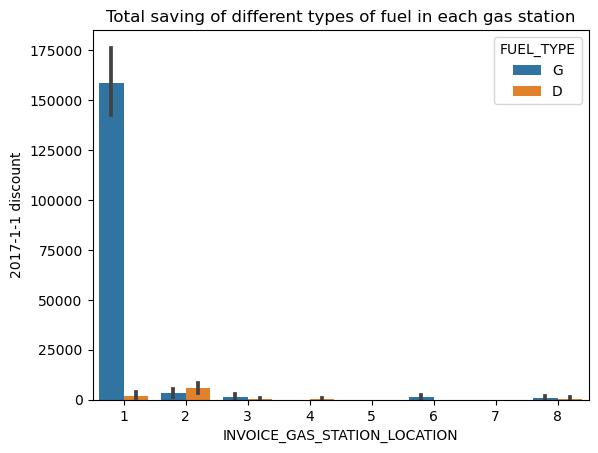

In [55]:
import seaborn as sns

ax = sns.barplot(x='INVOICE_GAS_STATION_LOCATION',
                 y='2017-1-1 discount',
                 hue='FUEL_TYPE',
                 data=df_invoices,
                 estimator=sum)

ax.set(title='Total saving of different types of fuel in each gas station')

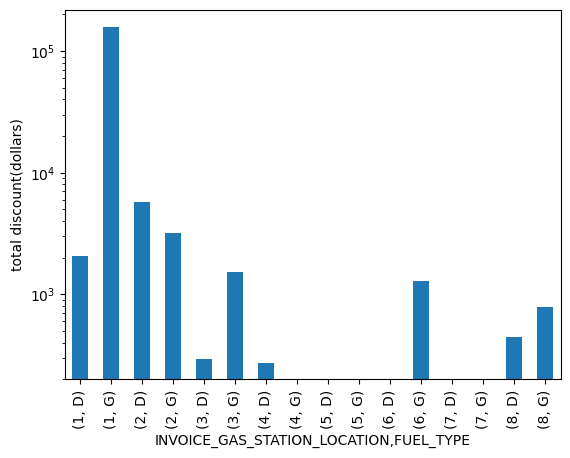

In [56]:
sum_discount.plot(kind='bar')
plt.ylabel('total discount(dollars)')
#generate a plot with a logarithmic scale for the y-axis, which compresses the data and makes it easier to see the patterns
plt.yscale('log')

In [57]:
df_invoices.groupby(['INVOICE_GAS_STATION_LOCATION','FUEL_TYPE']).count()

INVOICE_DATE  INVOICE_ID  \
INVOICE_GAS_STATION_LOCATION FUEL_TYPE                             
1                            D                   599         599   
                             G                   762         762   
2                            D                   347         347   
                             G                   285         285   
3                            D                    41          41   
                             G                    39          39   
4                            D                   184         184   
                             G                   172         172   
5                            D                   125         125   
                             G                   155         155   
6                            D                     7           7   
                             G                    35          35   
7                            D                     8           8   
                             G                    44          44   
8                            D                     9           9   
                             G                    19          19   

                                        GROSS_PURCHASE_COST  AMOUNT_PURCHASED  \
INVOICE_GAS_STATION_LOCATION FUEL_TYPE                                          
1                            D                          599               599   
                             G                          762               762   
2                            D                          347               347   
                             G                          285               285   
3                            D                           41                41   
                             G                           39                39   
4                            D                          184               184   
                             G                          172               172   
5                            D                          125               125   
                             G                          155               155   
6                            D                            7                 7   
                             G                           35                35   
7                            D                            8                 8   
                             G                           44                44   
8                            D                            9                 9   
                             G                           19                19   

                                        UNIT_COST  Inflation rate  \
INVOICE_GAS_STATION_LOCATION FUEL_TYPE                              
1                            D                599             599   
                             G                762             762   
2                            D                347             347   
                             G                285             285   
3                            D                 41              41   
                             G                 39              39   
4                            D                184             184   
                             G                172             172   
5                            D                125             125   
                             G                155             155   
6                            D                  7               7   
                             G                 35              35   
7                            D                  8               8   
                             G                 44              44   
8                            D                  9               9   
                             G                 19              19   

                                        Cumulation Inflation rate  \
INVOICE_GAS_STATION_LOCATION FUEL_TYPE      

# For df_FUEL_LEVEL_1 and df_FUEL_LEVEL_2

In [58]:
df_fuel_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885151 entries, 0 to 885150
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tank ID     885151 non-null  object 
 1   Fuel Level  885149 non-null  float64
 2   Time stamp  885151 non-null  object 
dtypes: float64(1), object(2)
memory usage: 20.3+ MB


In [59]:
df_fuel_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974509 entries, 0 to 974508
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Tank ID     974509 non-null  object
 1   Fuel_Level  974509 non-null  int64 
 2   Timestamp   974509 non-null  object
dtypes: int64(1), object(2)
memory usage: 22.3+ MB


In [60]:
df_fuel_1.head(1)

Tank ID  Fuel Level     Time stamp
0    T 12     27161.0  1/1/2017 0:10

In [61]:
df_fuel_1.columns = [item.replace(' ', '_').upper() for item in df_fuel_1.columns]
df_fuel_2.columns = [item.replace(' ', '_').upper() for item in df_fuel_2.columns]

In [62]:
# check the two datadrames' column names whether are same
df_fuel_1.columns == df_fuel_2.columns

array([ True,  True, False])

In [63]:
#make fuel_2 columns' name same as fuel_1's
df_fuel_2.columns=df_fuel_1.columns

In [64]:
df_fuel_1.columns == df_fuel_2.columns

array([ True,  True,  True])

In [65]:
### connecting two fuel data to df_fuel

In [66]:
df_fuel = pd.concat([df_fuel_1, df_fuel_2])

In [67]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859660 entries, 0 to 974508
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   TANK_ID     object 
 1   FUEL_LEVEL  float64
 2   TIME_STAMP  object 
dtypes: float64(1), object(2)
memory usage: 56.8+ MB


In [68]:
df_fuel.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
974504    False
974505    False
974506    False
974507    False
974508    False
Length: 1859660, dtype: bool

<AxesSubplot:>

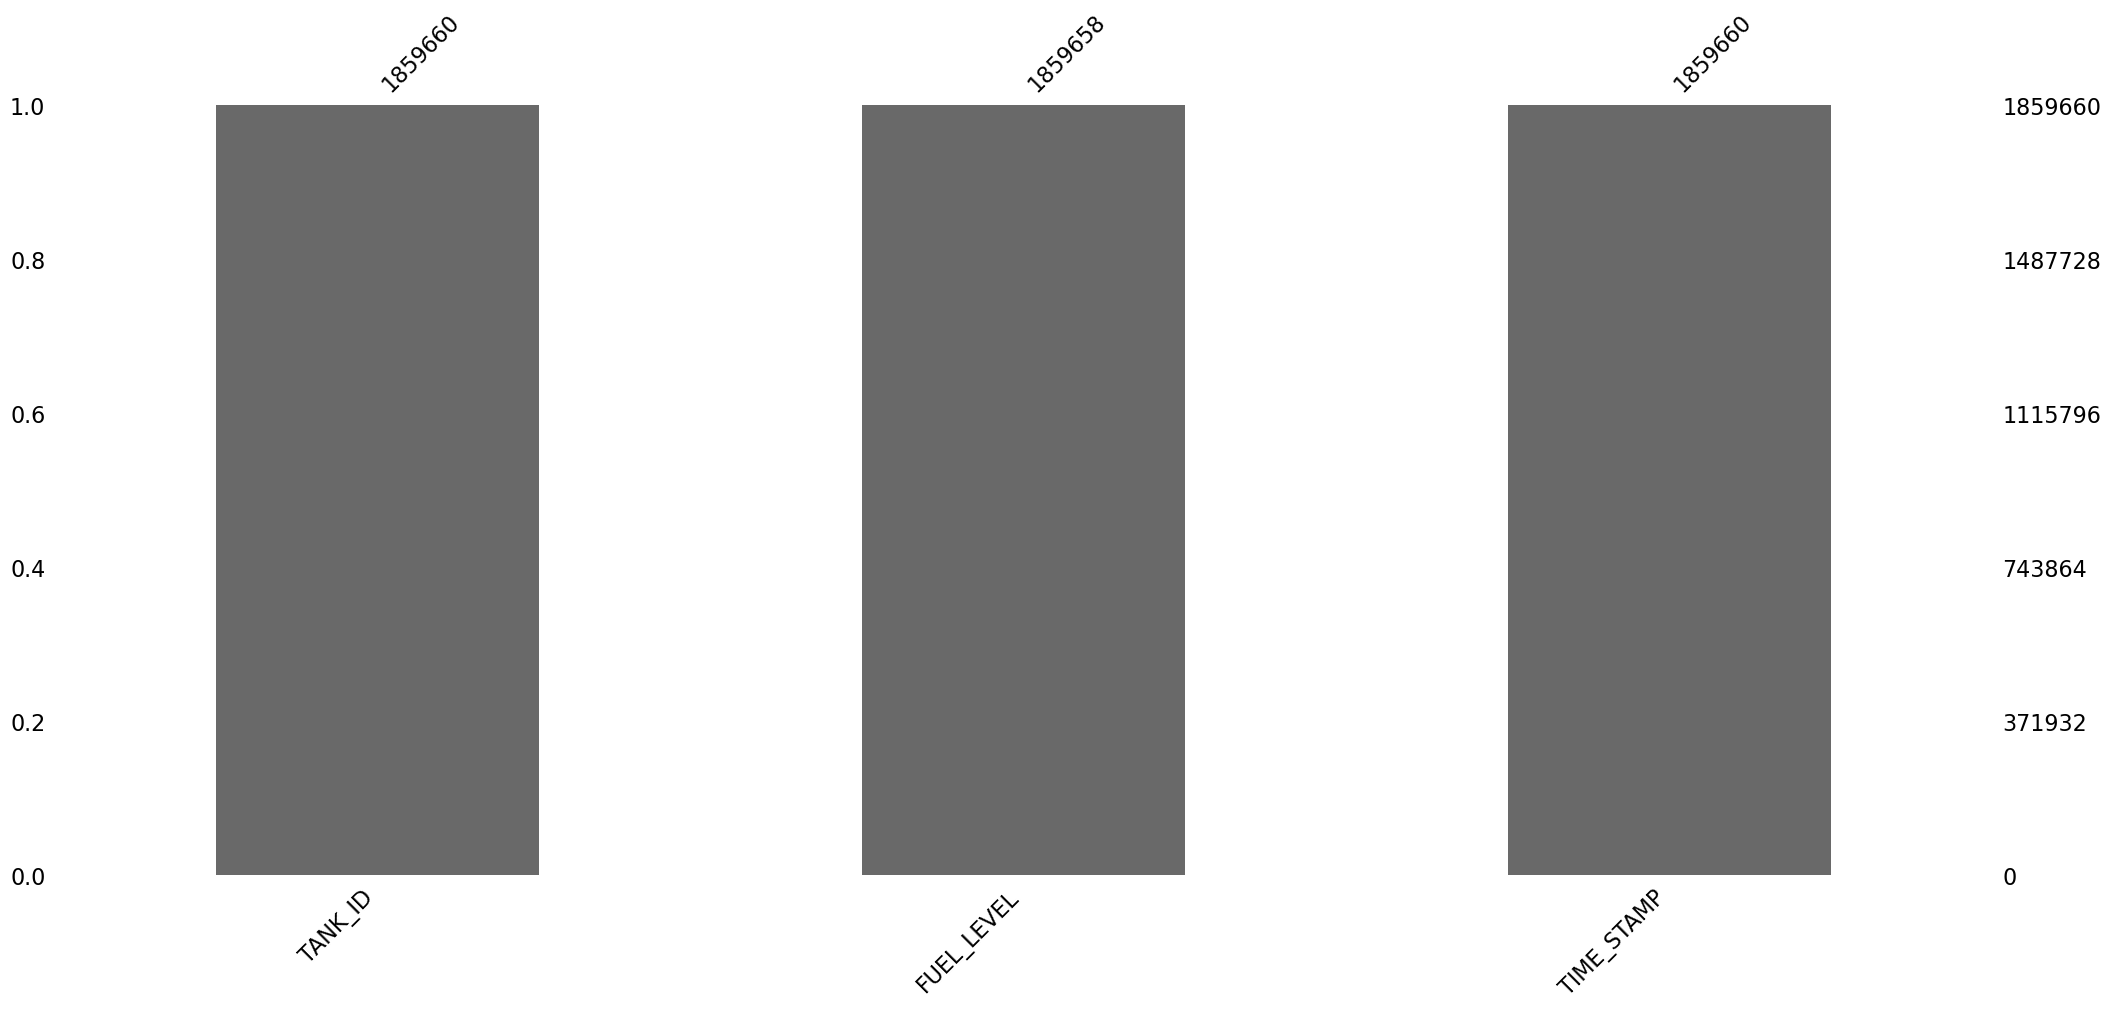

In [69]:
# checking the missing values in df_fuel
msno.bar(df_fuel)

<AxesSubplot:>

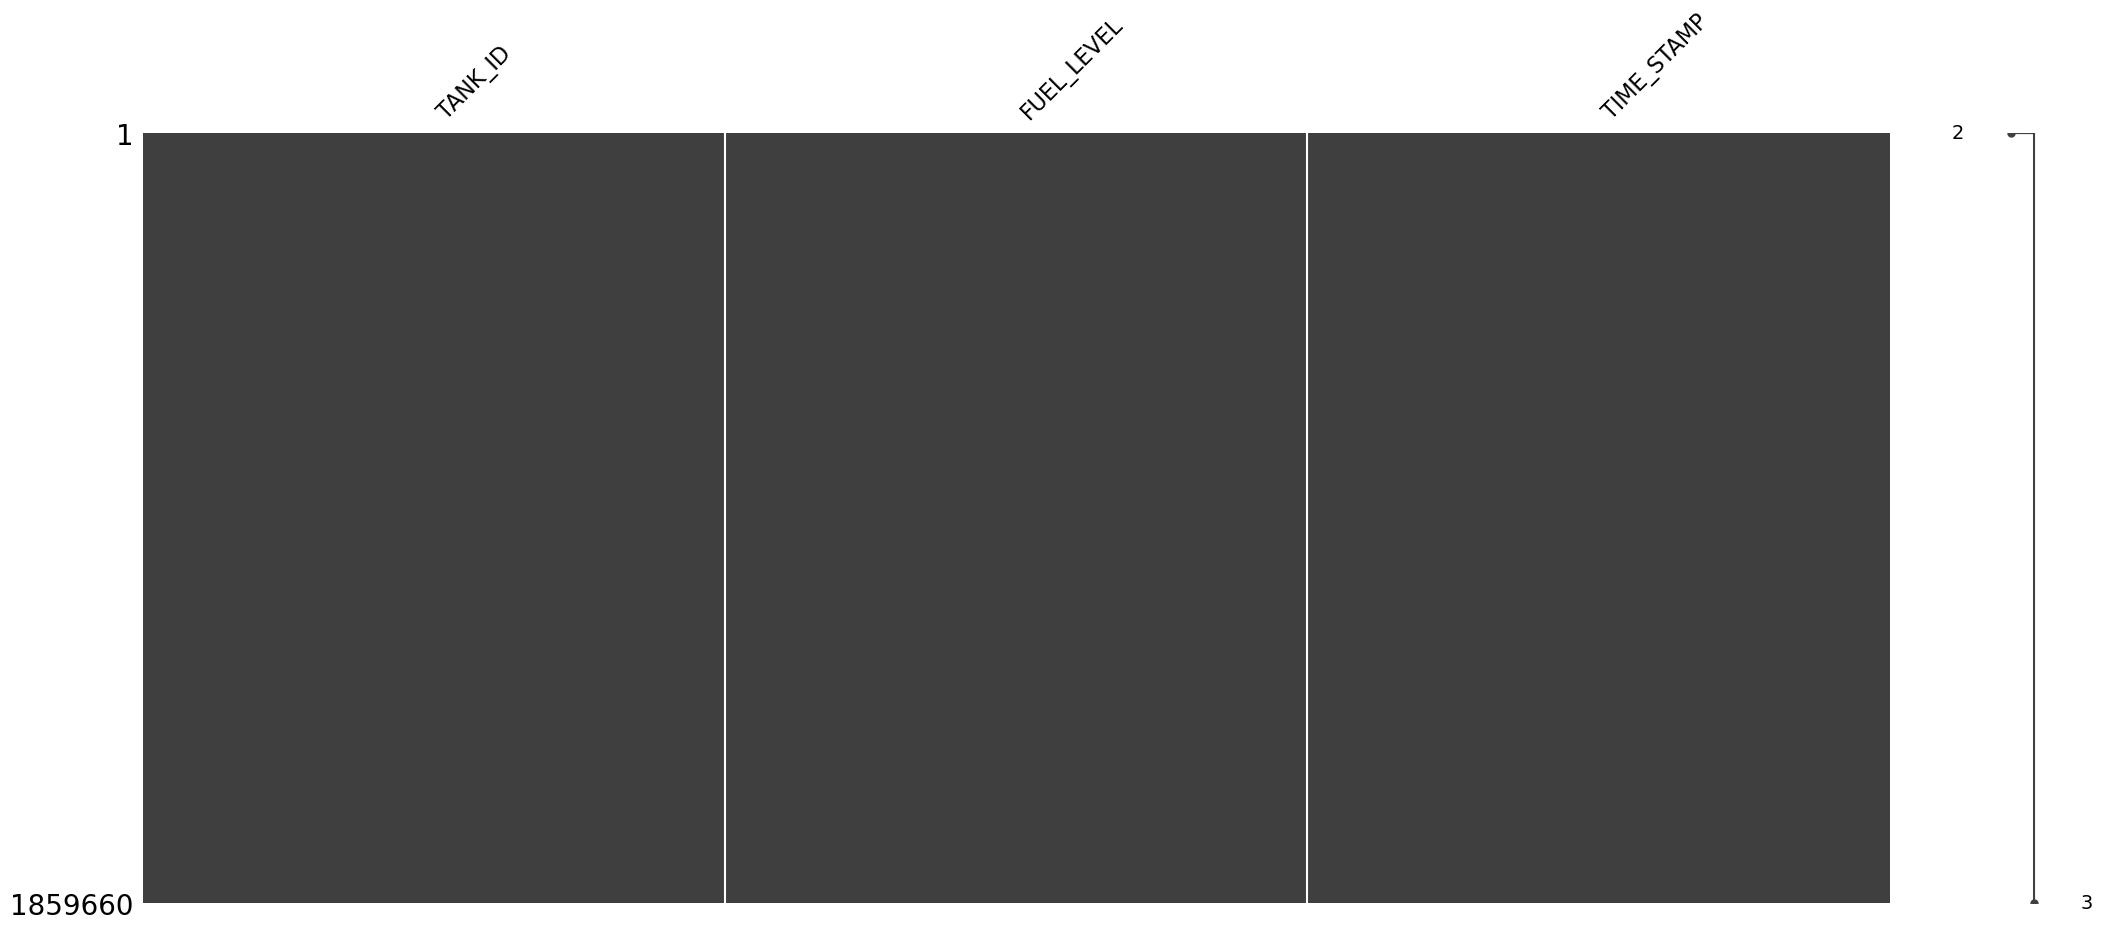

In [70]:
msno.matrix(df_fuel)

In [71]:
# show rows with missing values
df_fuel

TANK_ID  FUEL_LEVEL       TIME_STAMP
0         T 12     27161.0    1/1/2017 0:10
1         T 12     27017.0    1/1/2017 0:25
2         T 12     26934.0    1/1/2017 0:40
3          T12         NaN    1/1/2017 0:45
4         T 12     26786.0    1/1/2017 0:55
...        ...         ...              ...
974504    T 32     27619.0  8/15/2019 23:53
974505    T 22     31548.0  8/15/2019 23:57
974506    T 16     53492.0  8/15/2019 23:57
974507    T 18     27081.0  8/15/2019 23:57
974508    T 25     11815.0  8/15/2019 23:59

[1859660 rows x 3 columns]

In [72]:
df_fuel[df_fuel.FUEL_LEVEL.isna()]

TANK_ID  FUEL_LEVEL     TIME_STAMP
3       T12         NaN  1/1/2017 0:45
111     T12         NaN  1/2/2017 3:35

In [73]:
df_fuel.FUEL_LEVEL.isna().sum()

2

In [74]:
df_fuel[df_fuel.FUEL_LEVEL.isna()]

TANK_ID  FUEL_LEVEL     TIME_STAMP
3       T12         NaN  1/1/2017 0:45
111     T12         NaN  1/2/2017 3:35

In [75]:
df_fuel.dropna(inplace=True)

In [76]:
df_fuel[df_fuel.isna().any(axis=1)]

Empty DataFrame
Columns: [TANK_ID, FUEL_LEVEL, TIME_STAMP]
Index: []

In [77]:
df_fuel.isna()

TANK_ID  FUEL_LEVEL  TIME_STAMP
0         False       False       False
1         False       False       False
2         False       False       False
4         False       False       False
5         False       False       False
...         ...         ...         ...
974504    False       False       False
974505    False       False       False
974506    False       False       False
974507    False       False       False
974508    False       False       False

[1859658 rows x 3 columns]

In [78]:
# df_fuel has no missing values

<AxesSubplot:>

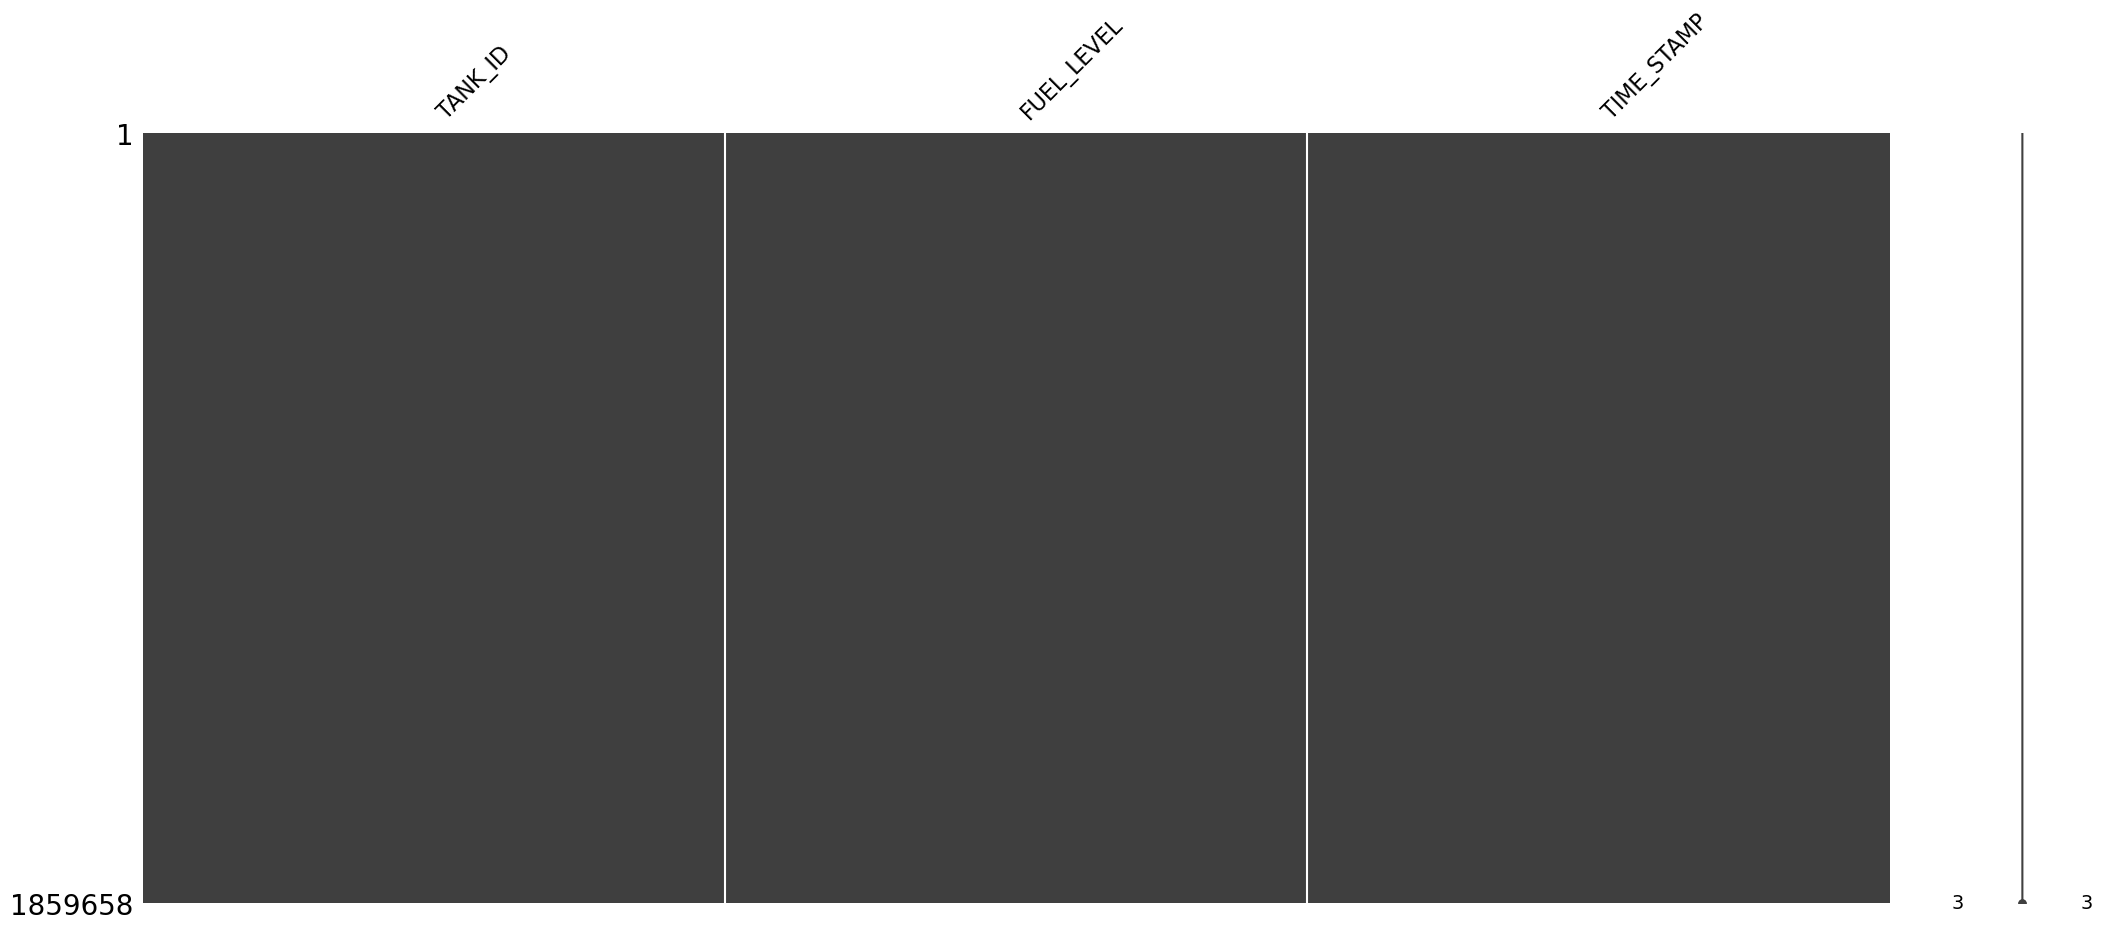

In [79]:
msno.matrix(df_fuel)

In [80]:
## transform to 
df_fuel.TIME_STAMP = pd.to_datetime(df_fuel.TIME_STAMP)

# Data Visualization for Fuel_Level

## Question：which location has more risky safety inventory strategy from historical data, and which is more efficient?

In [81]:
def draw_min_max_df(tank_name):
    df_Fuel_temp = df_fuel[df_fuel.TANK_ID.eq(tank_name)]
    df_Fuel_temp = df_Fuel_temp.copy()
    df_Fuel_temp['DATE'] = df_Fuel_temp.TIME_STAMP.dt.normalize()
    
    p = df_Fuel_temp.pivot_table(index = 'DATE',
                         values = 'FUEL_LEVEL',
                         aggfunc = ['min', 'max'])
    
    capacity = df_tanks[df_tanks['TANK_ID'] == tank_name]['TANK_CAPACITY'].iloc[0]
    
    fig, ax = plt.subplots()
    ax.plot(p.index, p['min'], label='Min Fuel Level')
    ax.plot(p.index, p['max'], label='Max Fuel Level')
    ax.set_title(tank_name + ' Daily Min Max')
    ax.axhline(y = capacity, color='r', linestyle='--', label='Capacity')
    ax.legend(loc='best')

In [82]:
list_of_tanks_names = df_tanks.TANK_ID.to_list()

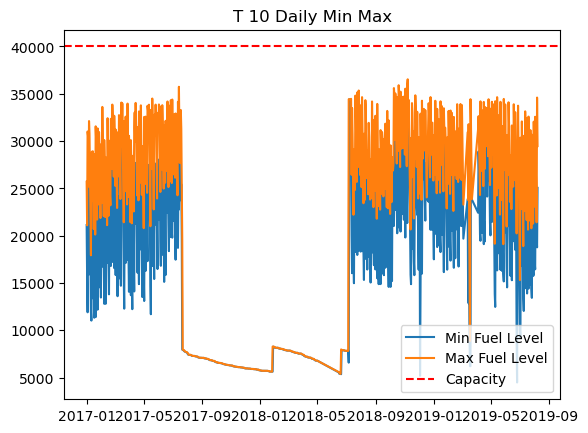

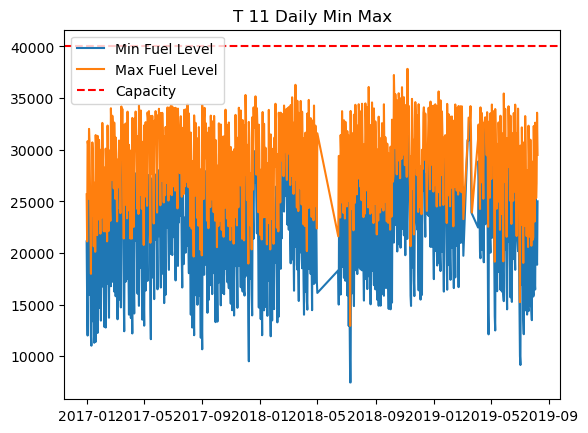

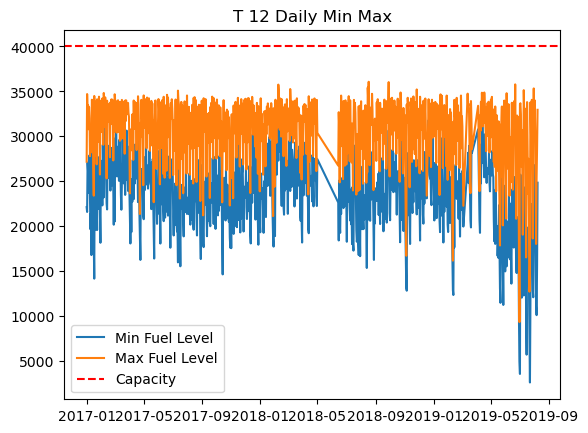

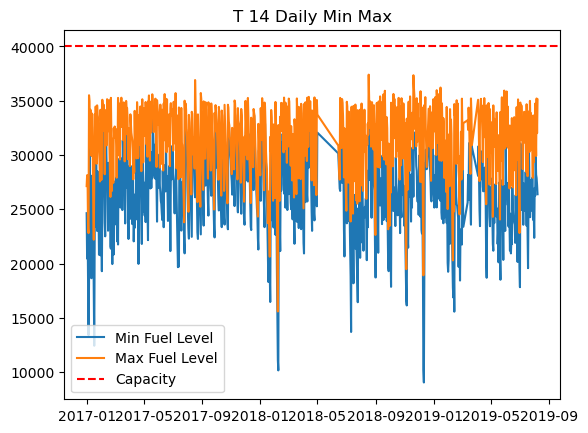

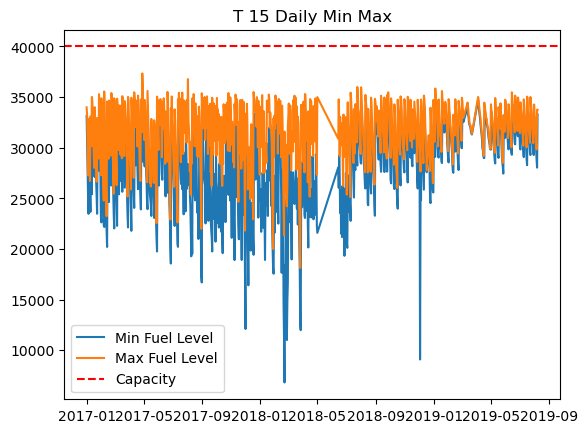

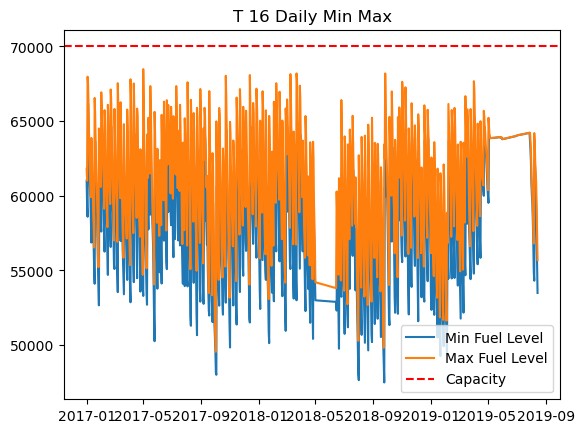

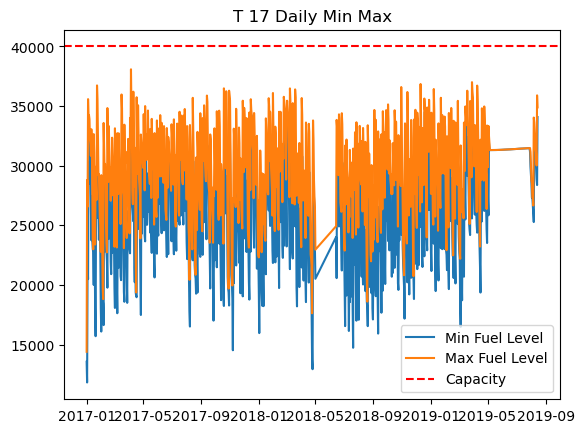

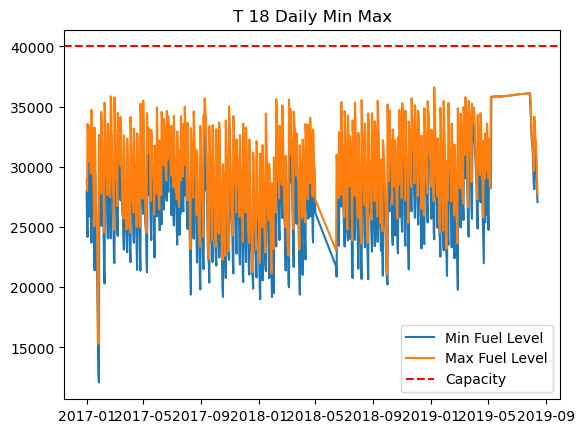

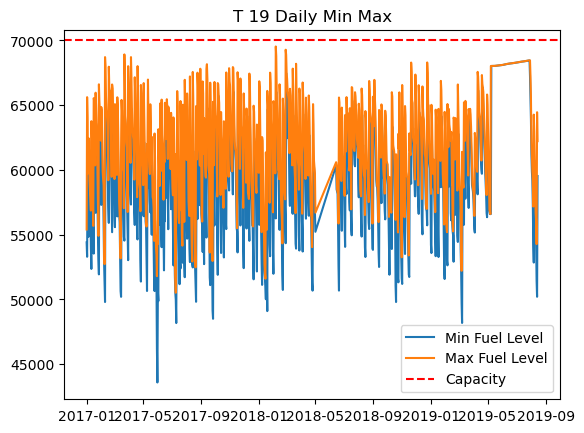

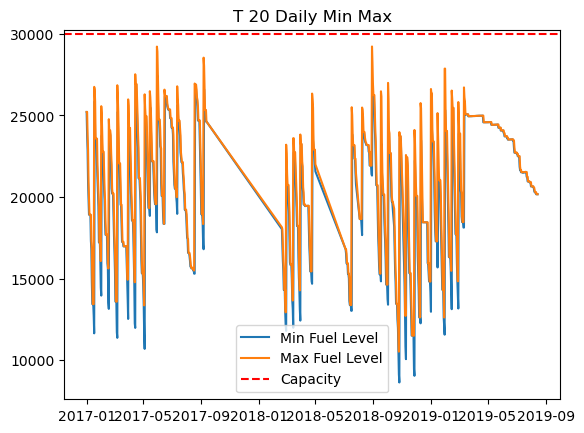

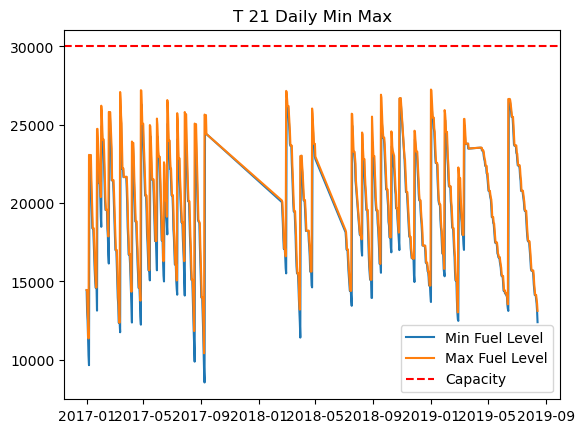

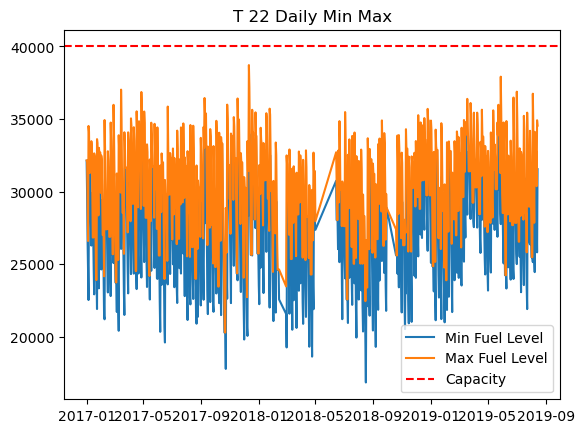

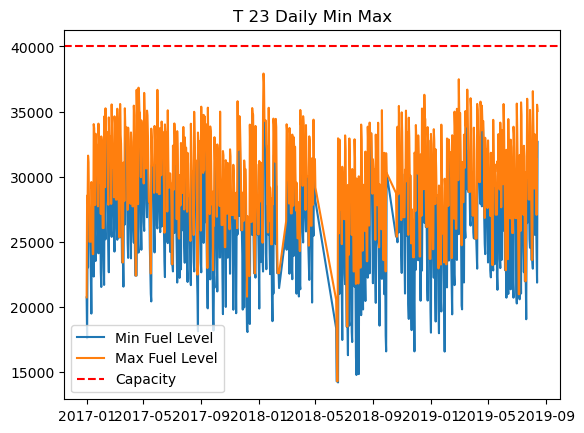

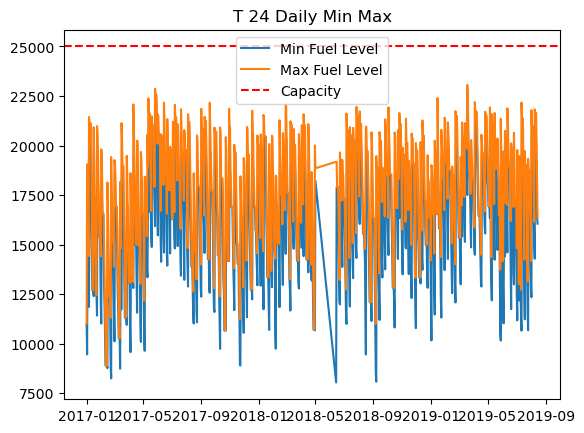

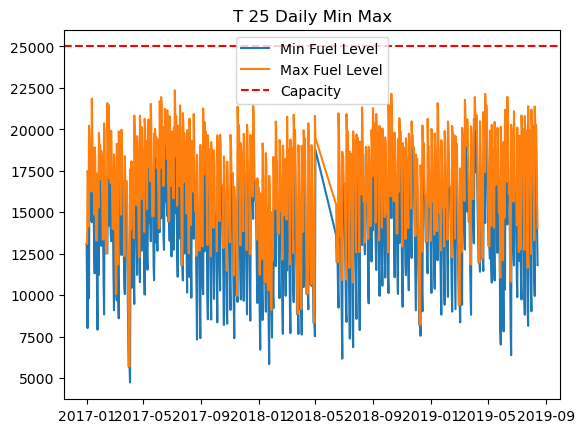

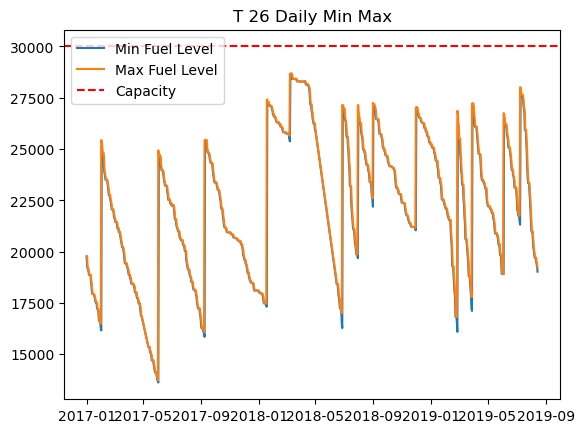

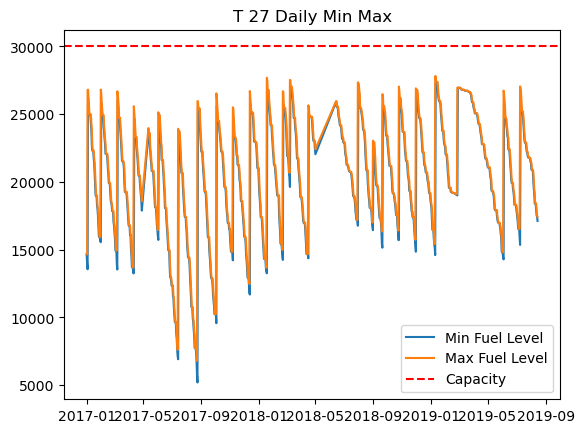

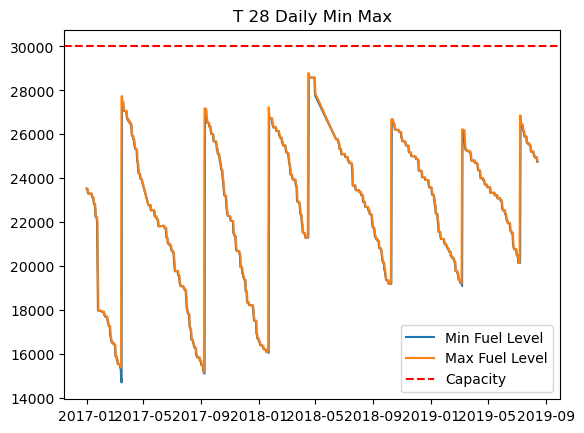

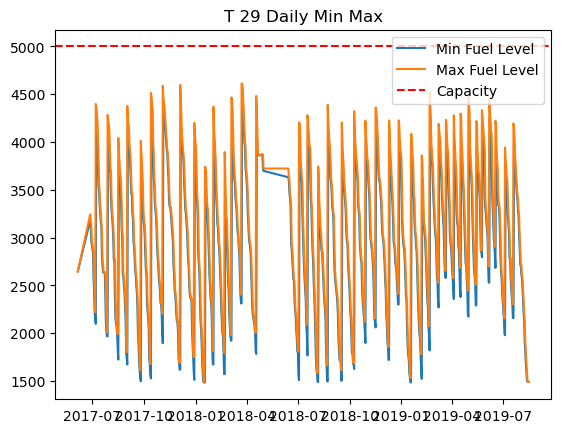

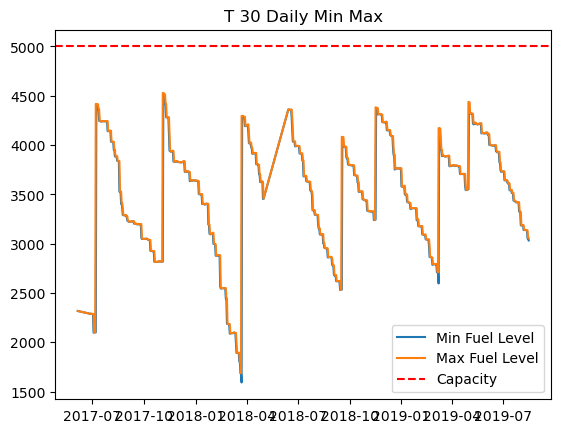

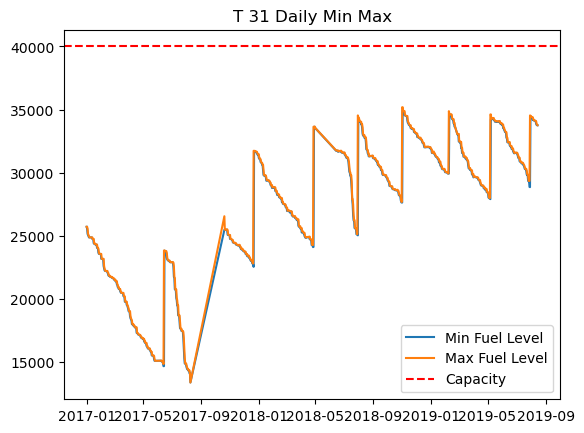

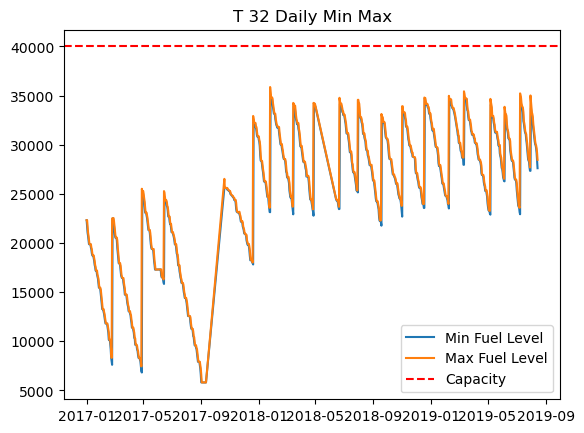

In [83]:
for i in list_of_tanks_names:
    draw_min_max_df(i)

In [84]:
def return_separate_min_max(tank_name):
    fig,ax = plt.subplots(2,2)
    plt.tight_layout()
    df_Fuel_temp = df_fuel[df_fuel.TANK_ID.eq(tank_name)]
    df_Fuel_temp[:500].plot('TIME_STAMP', 'FUEL_LEVEL', kind = 'line', ax = ax[0,0], color = 'red')
    df_Fuel_temp[501:1000].plot('TIME_STAMP', 'FUEL_LEVEL', kind ='line', ax = ax[0,1], color = 'orange')
    df_Fuel_temp[1001:1500].plot('TIME_STAMP', 'FUEL_LEVEL', kind ='line', ax = ax[1,0], color = 'green')
    df_Fuel_temp[1501:2000].plot('TIME_STAMP', 'FUEL_LEVEL', kind = 'line', ax = ax[1,1], color = 'blue')
    fig.suptitle(tank_name + ' Fuel level')
    fig.autofmt_xdate()

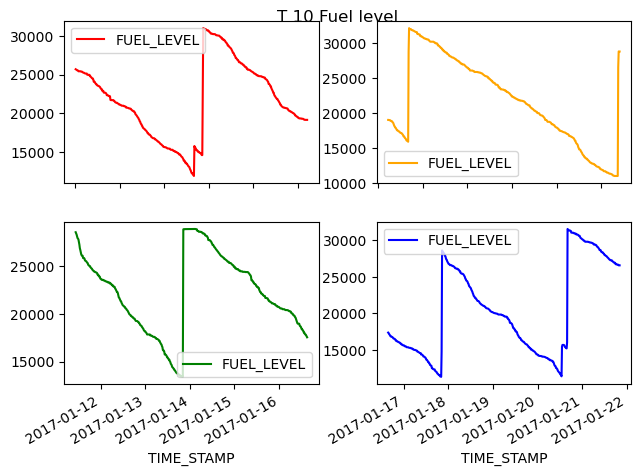

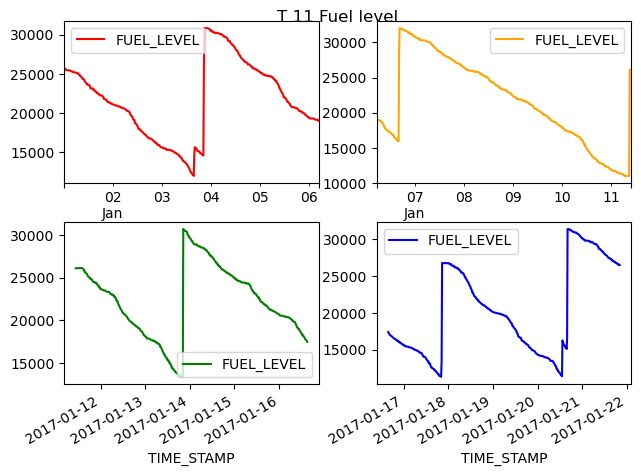

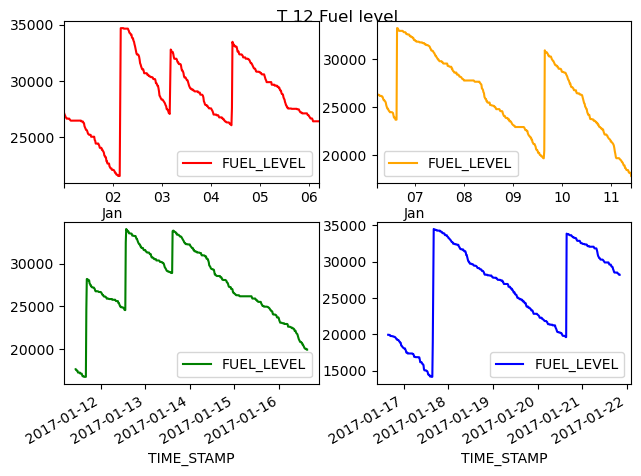

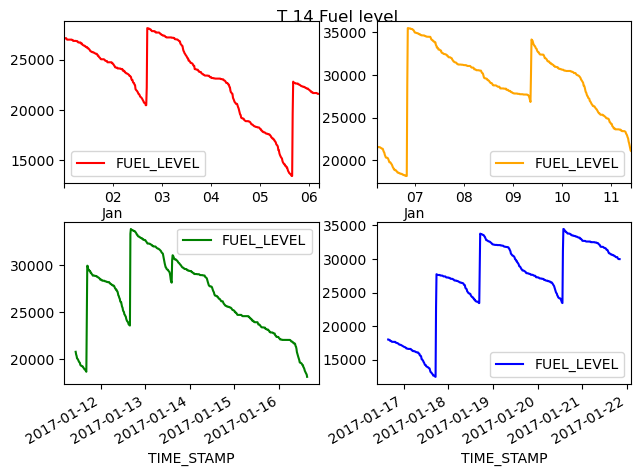

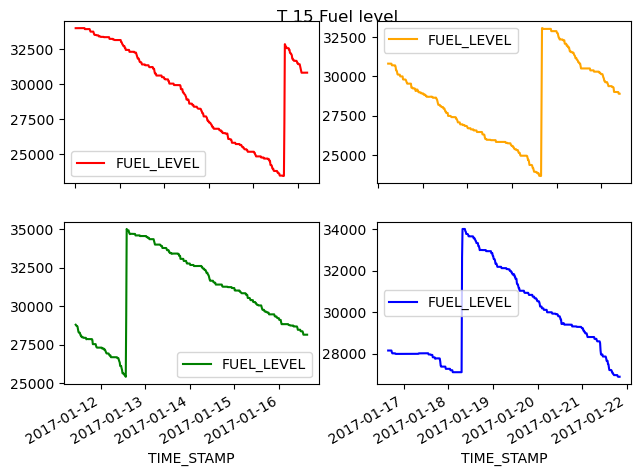

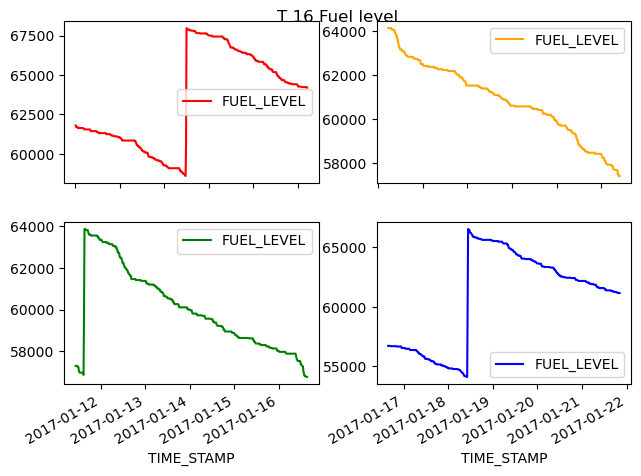

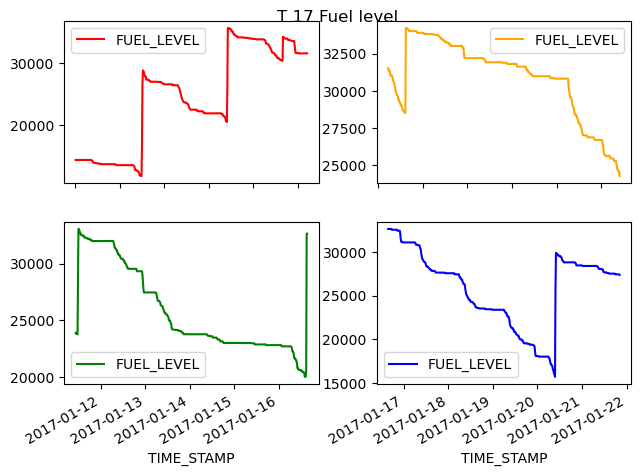

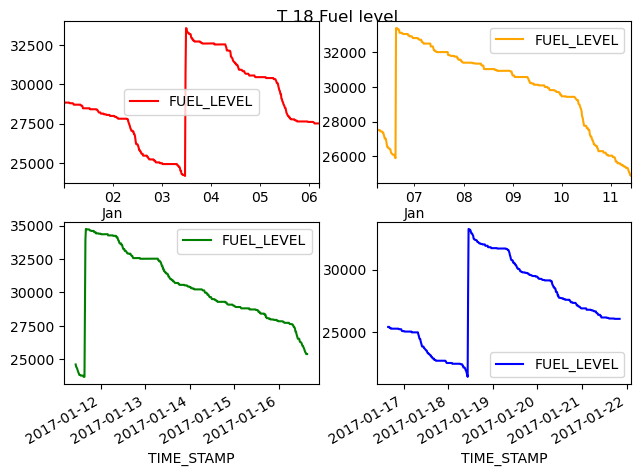

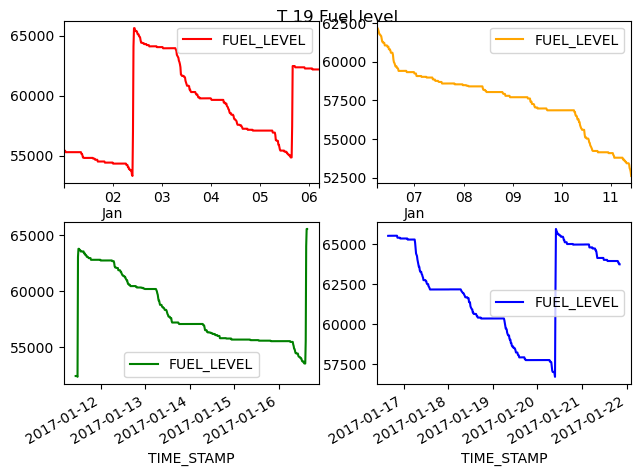

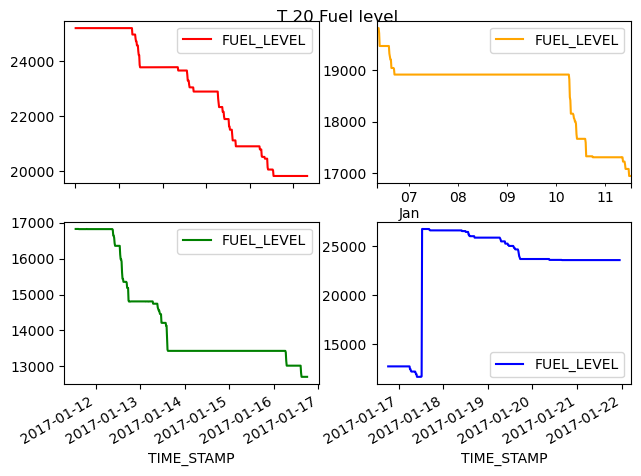

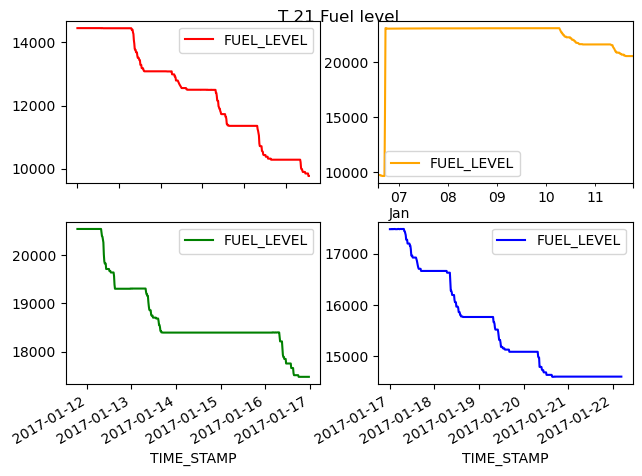

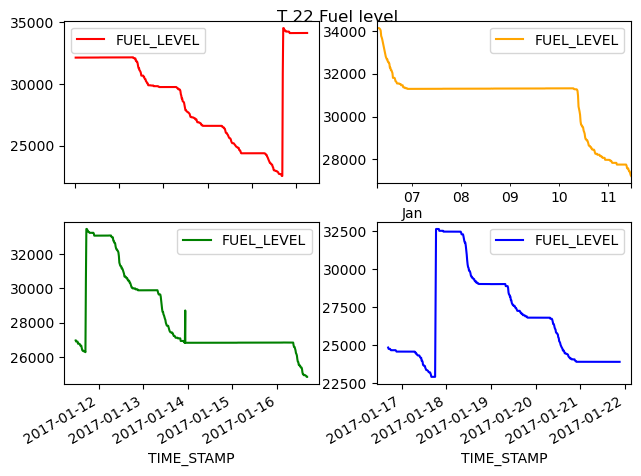

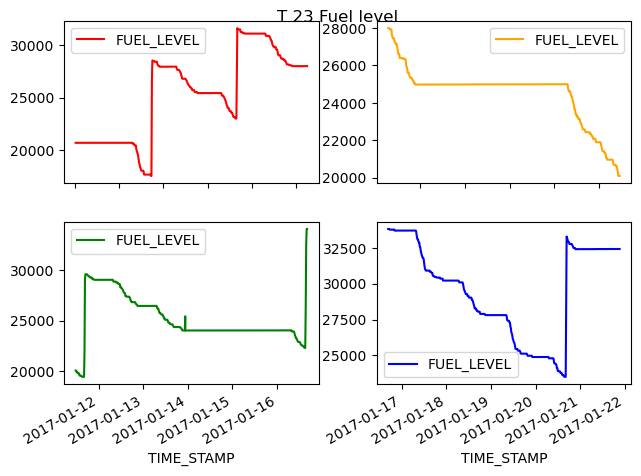

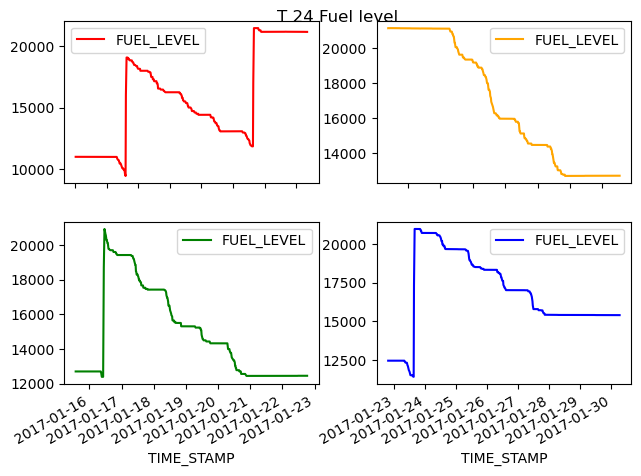

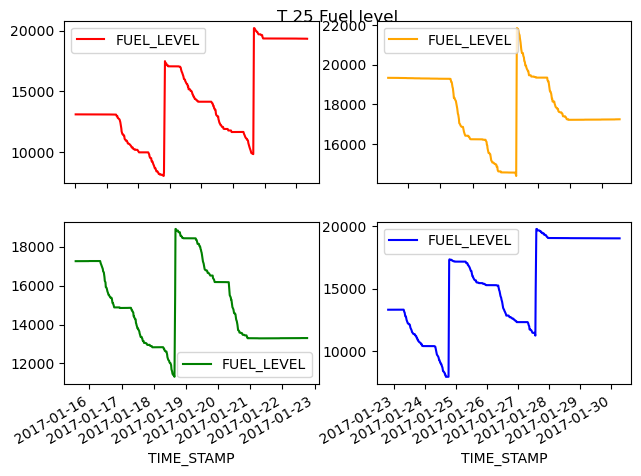

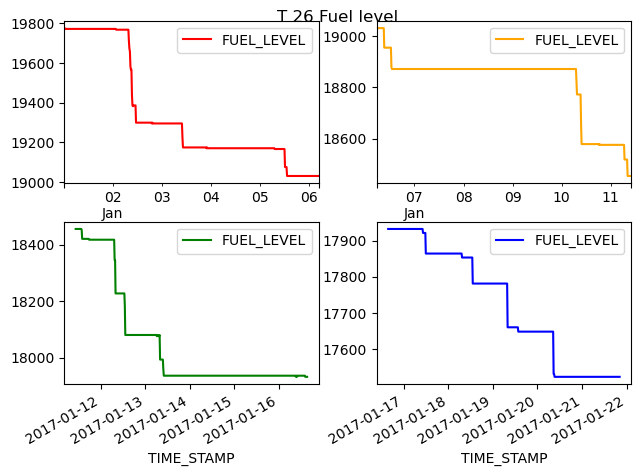

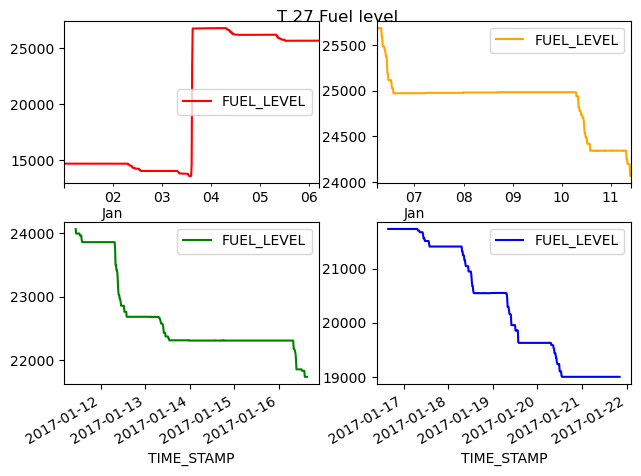

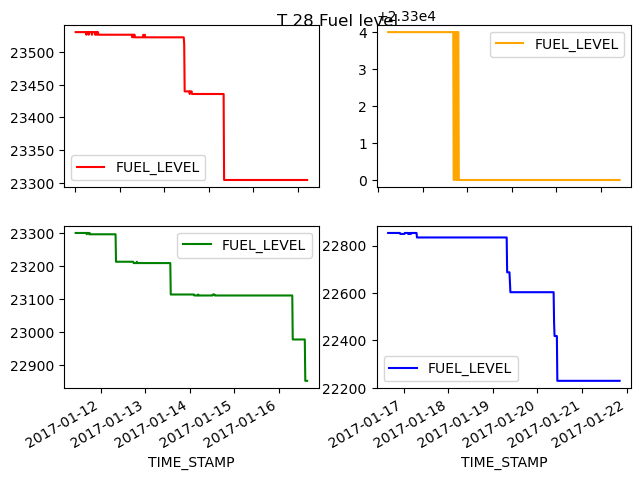

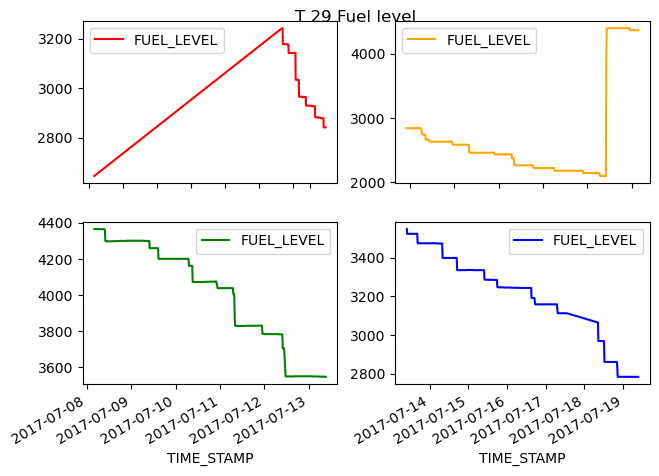

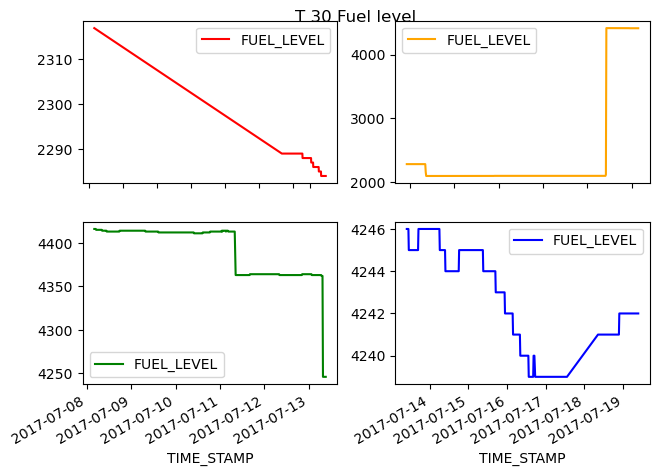

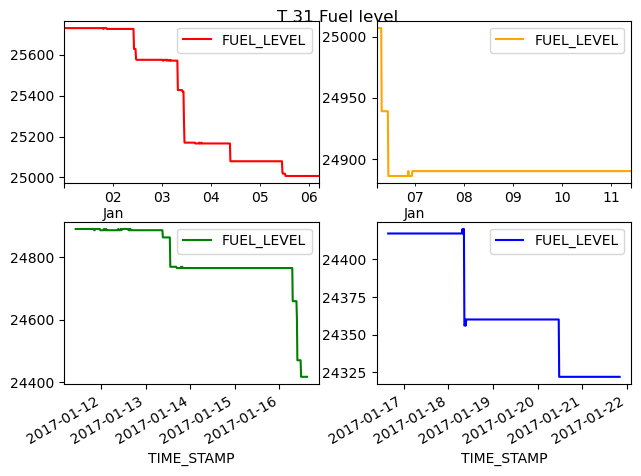

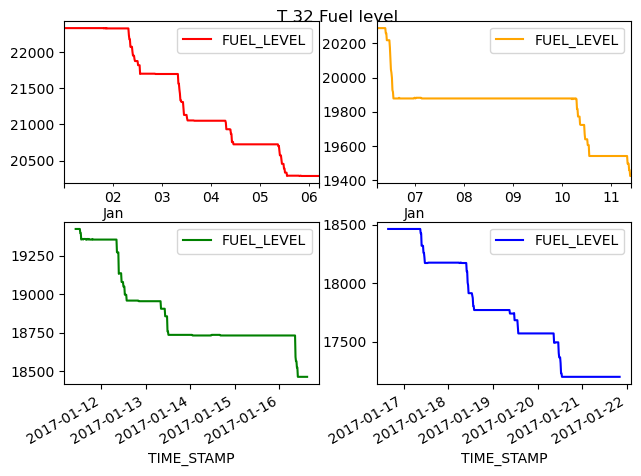

In [85]:
for i in list_of_tanks_names:
    return_separate_min_max(i)

# **New Model to `Calculate Best_refill_days` and `Best_refill_quantity` for every tanks**

In [86]:
tank_fuel_level_data = {}

for tank_id in df_fuel['TANK_ID'].unique():
    tank_fuel_level_data[tank_id] = df_fuel[df_fuel['TANK_ID'] == tank_id]

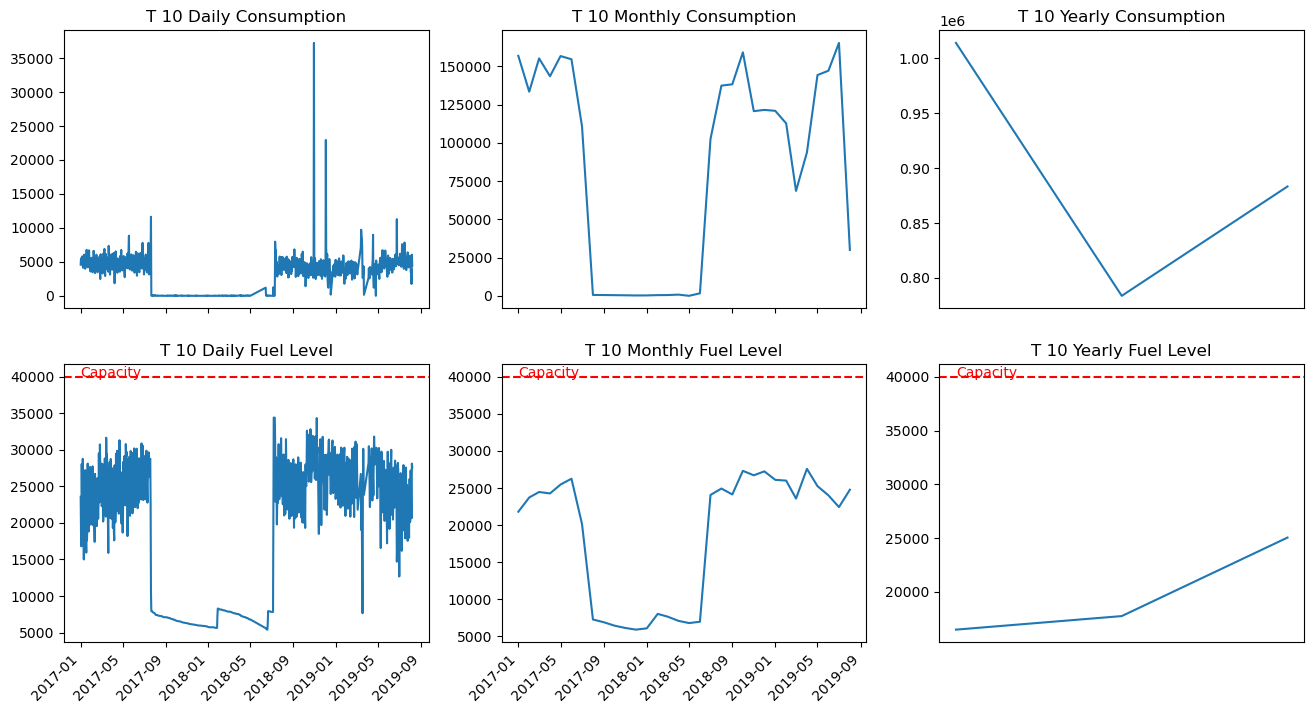

*****************************************************************DIVIDING LINE*****************************************************************


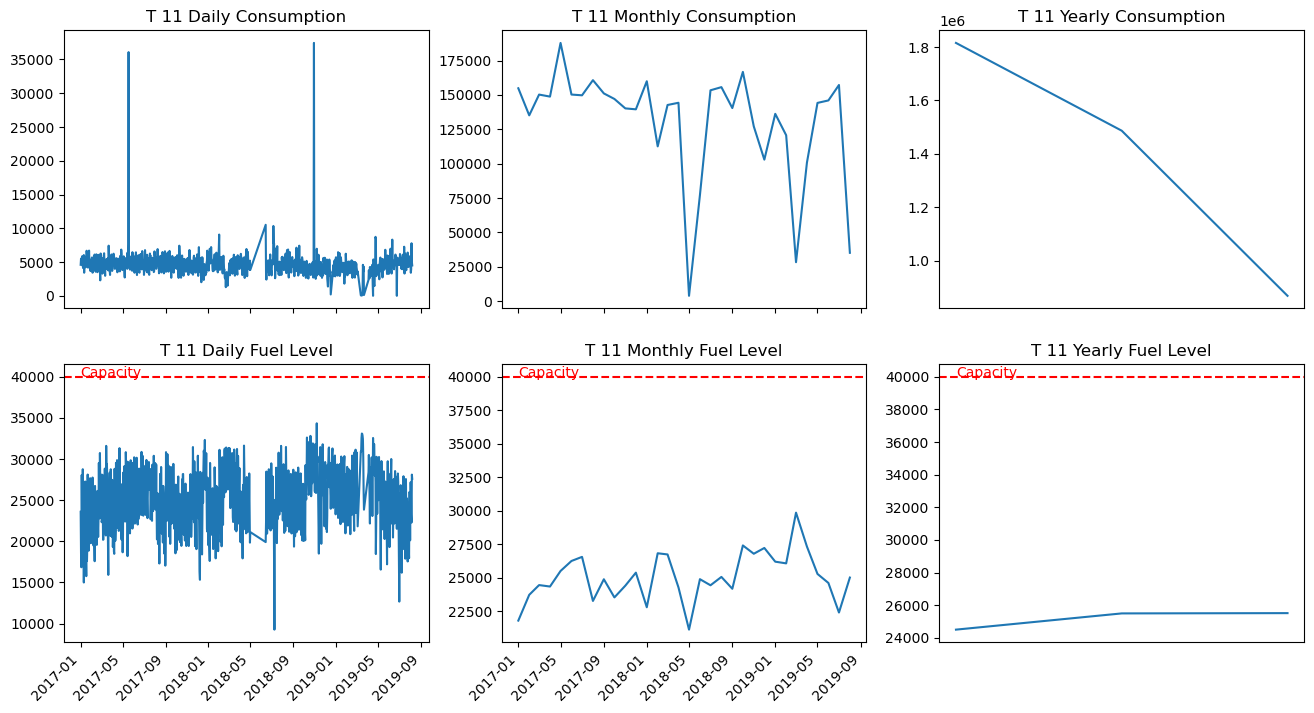

*****************************************************************DIVIDING LINE*****************************************************************


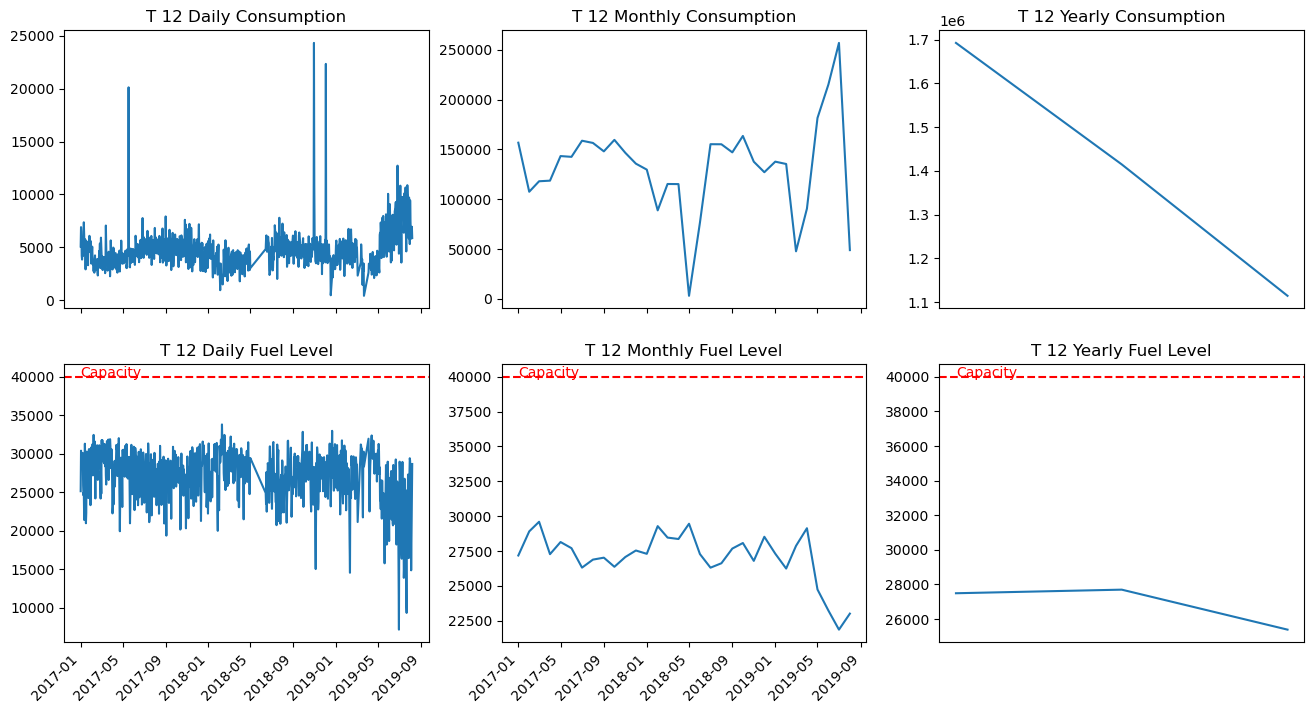

*****************************************************************DIVIDING LINE*****************************************************************


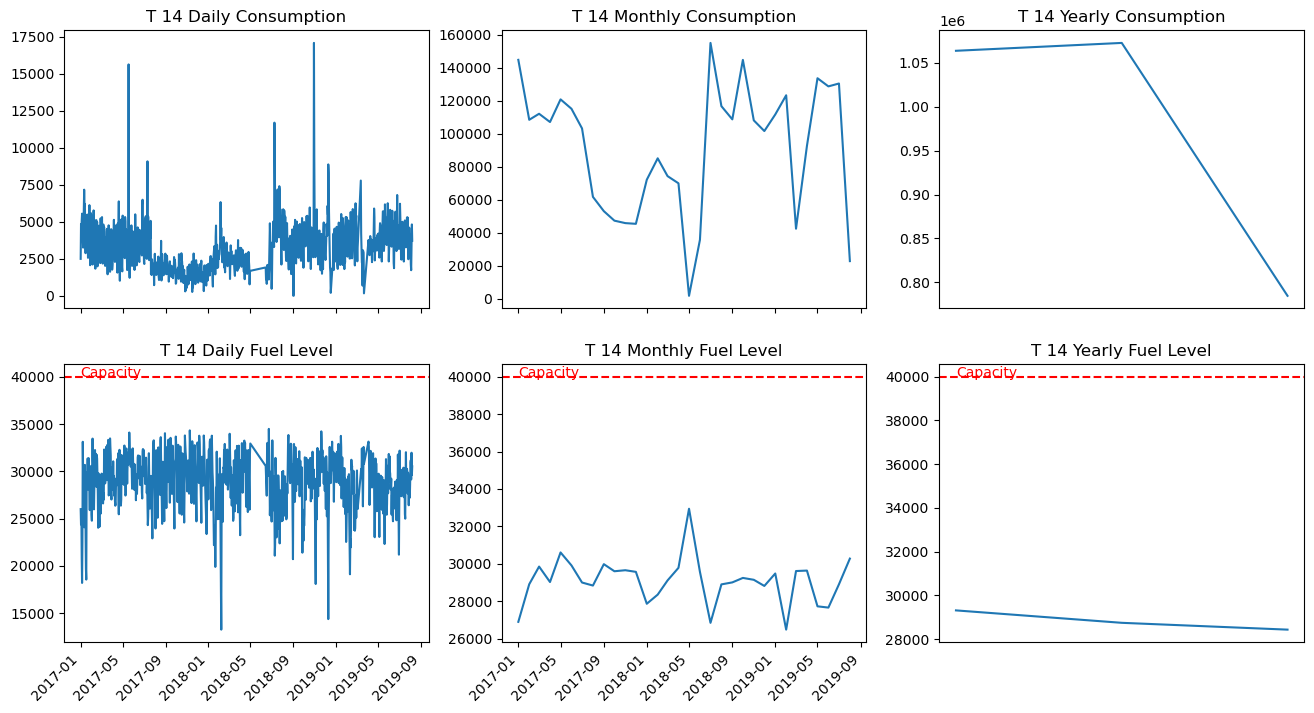

*****************************************************************DIVIDING LINE*****************************************************************


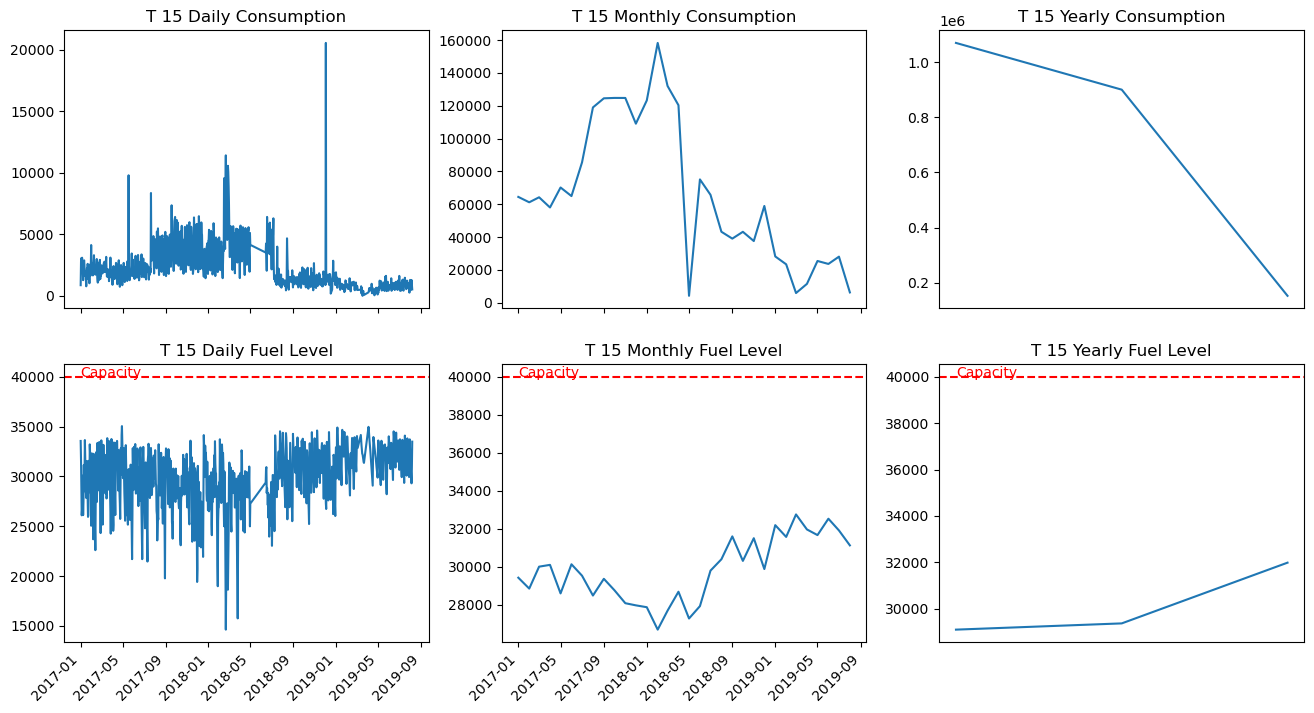

*****************************************************************DIVIDING LINE*****************************************************************


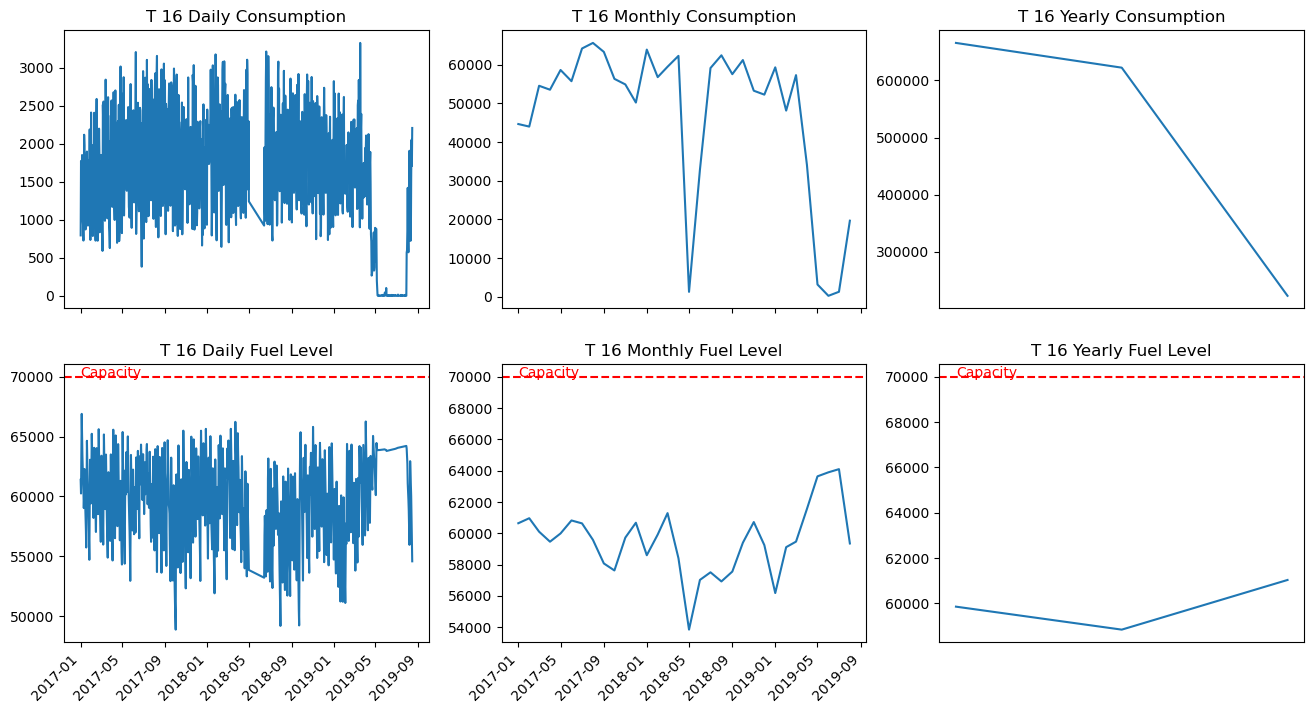

*****************************************************************DIVIDING LINE*****************************************************************


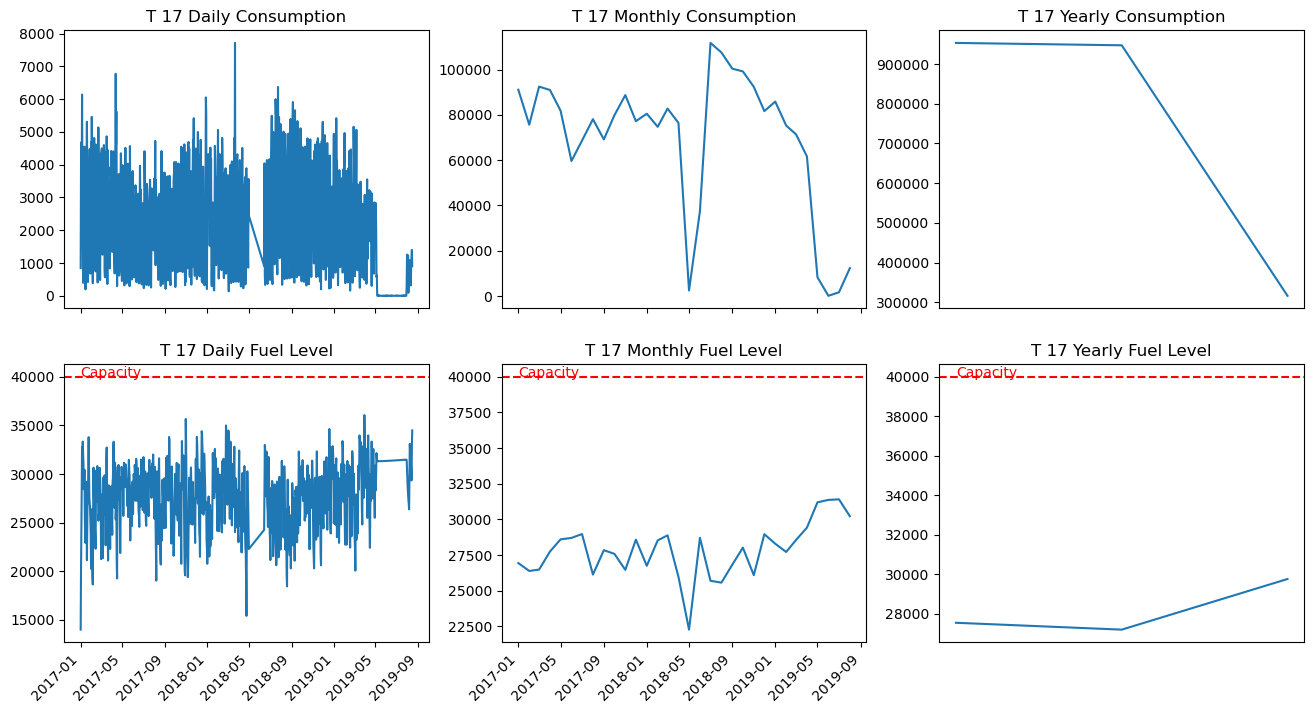

*****************************************************************DIVIDING LINE*****************************************************************


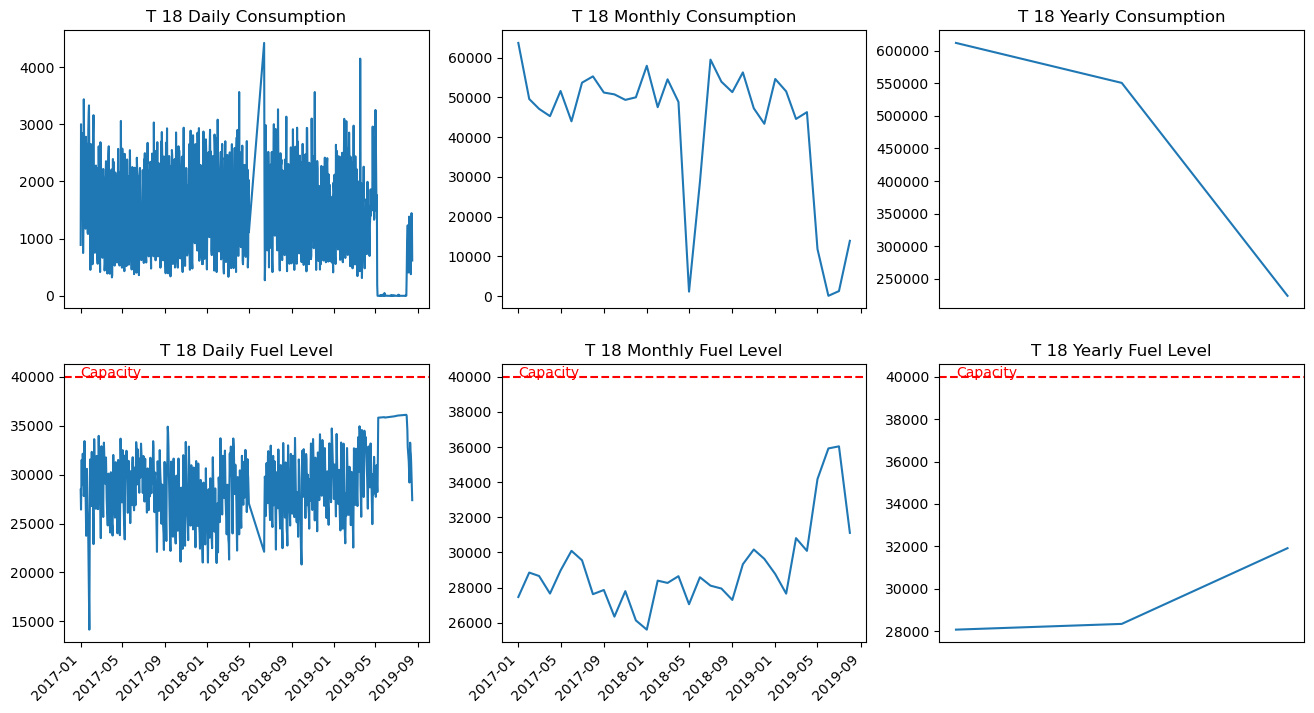

*****************************************************************DIVIDING LINE*****************************************************************


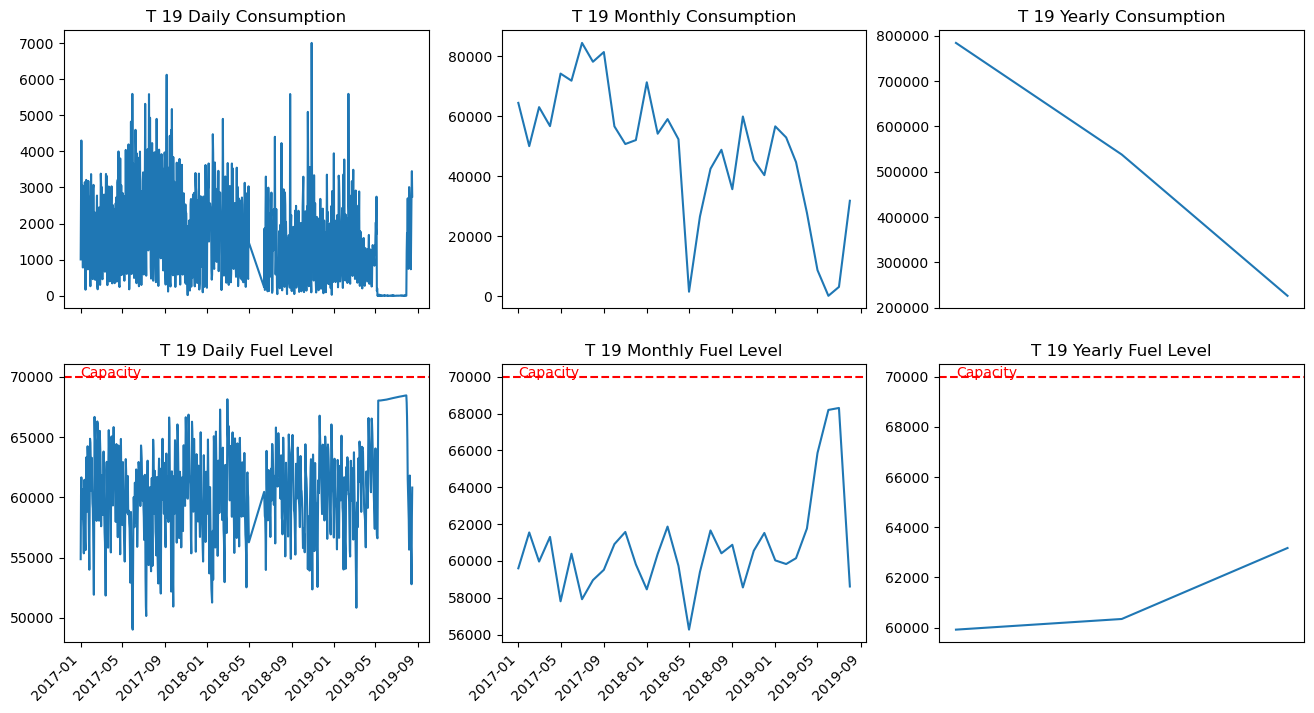

*****************************************************************DIVIDING LINE*****************************************************************


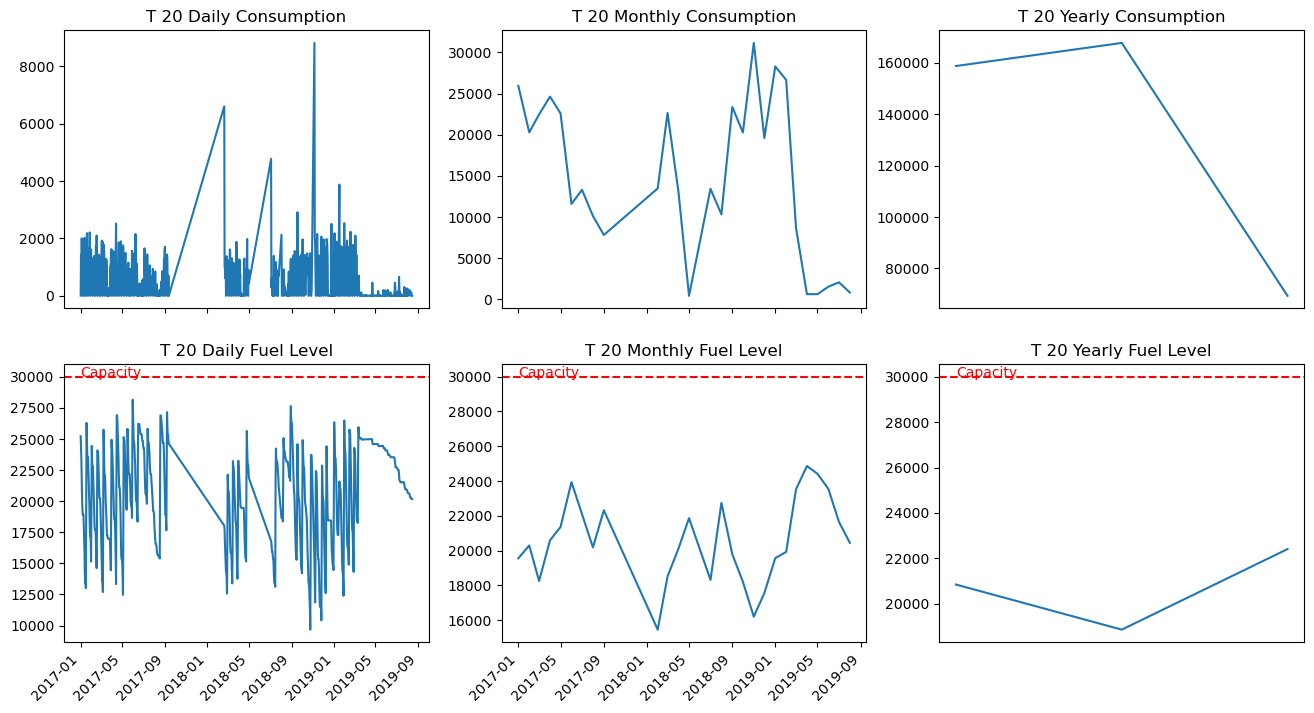

*****************************************************************DIVIDING LINE*****************************************************************


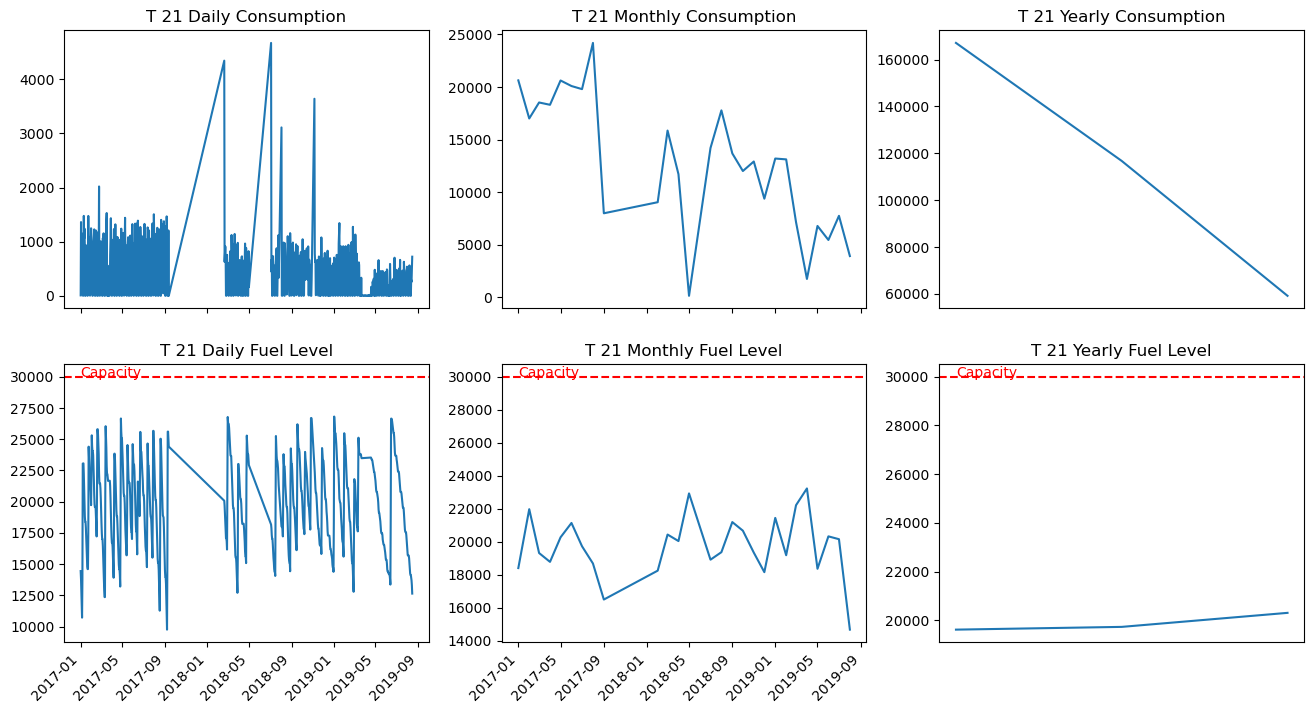

*****************************************************************DIVIDING LINE*****************************************************************


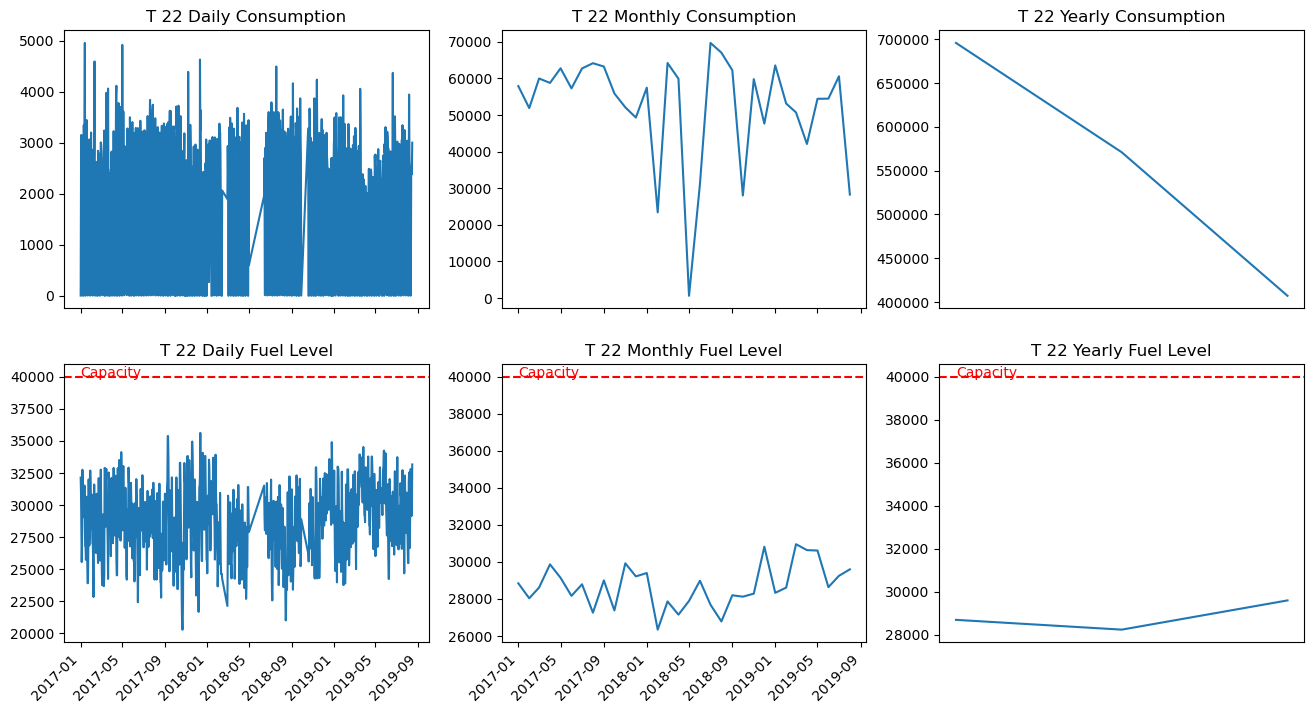

*****************************************************************DIVIDING LINE*****************************************************************


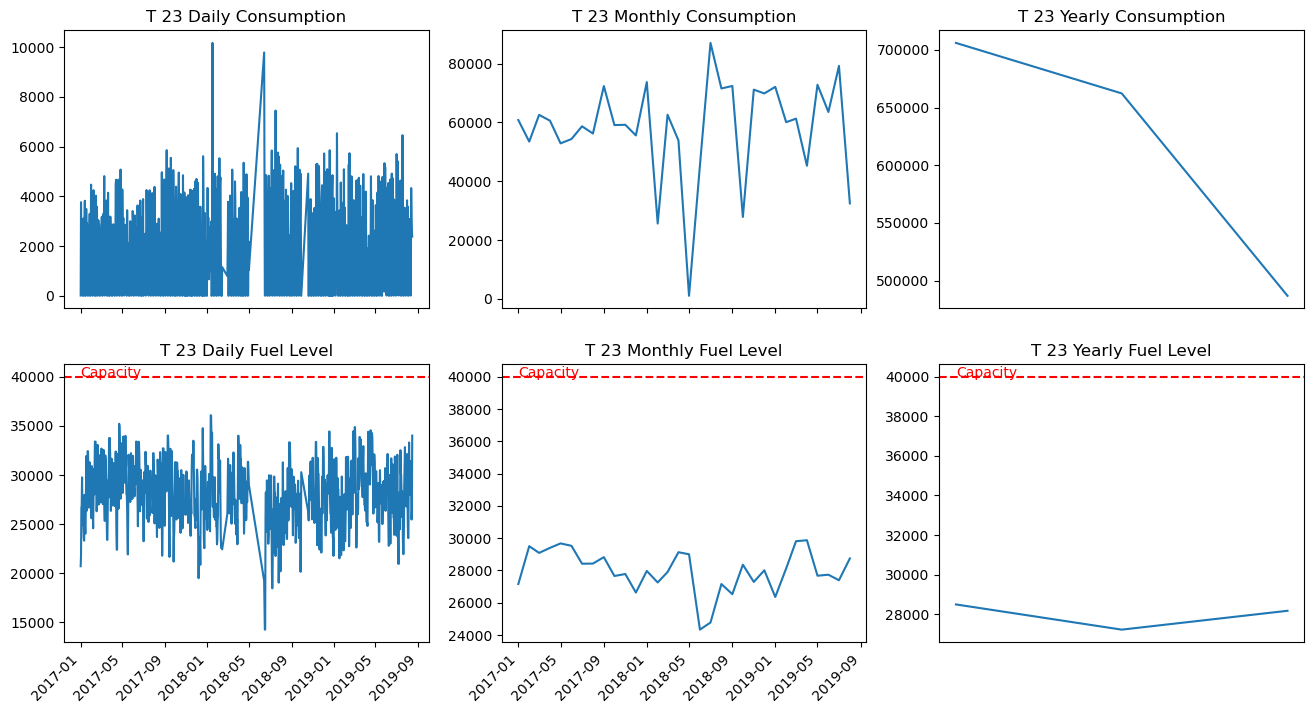

*****************************************************************DIVIDING LINE*****************************************************************


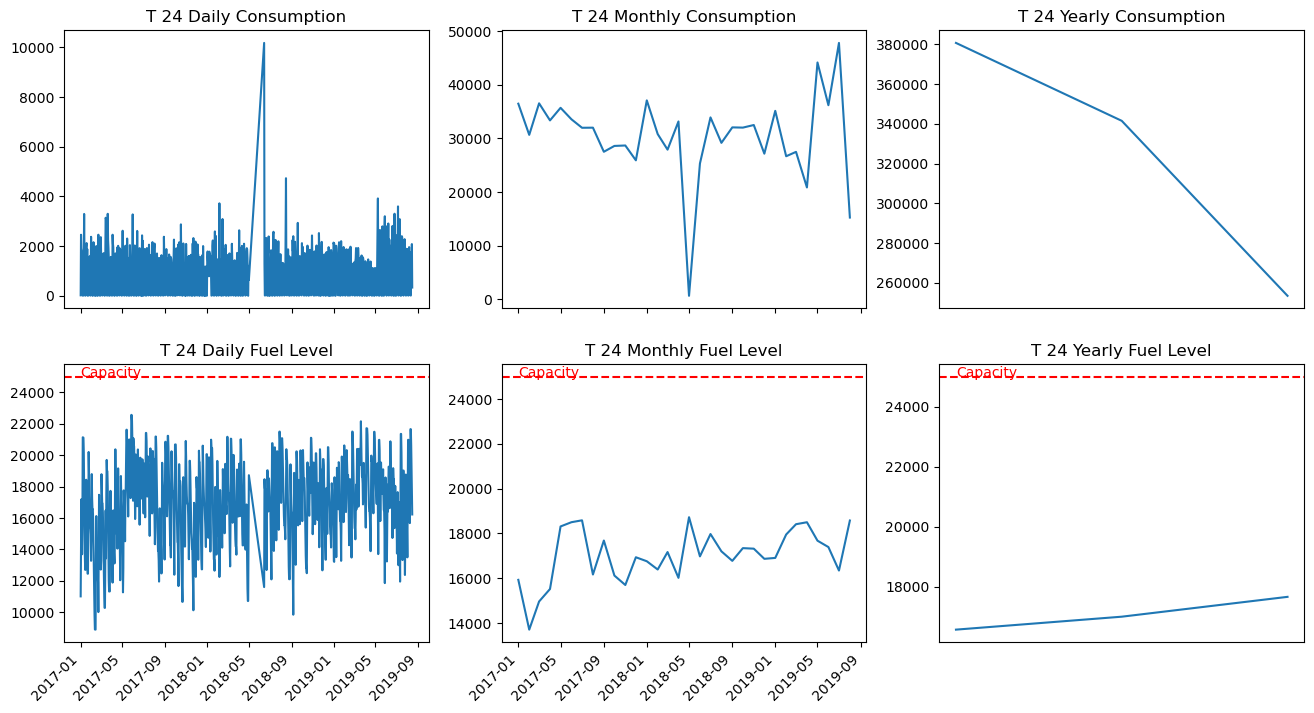

*****************************************************************DIVIDING LINE*****************************************************************


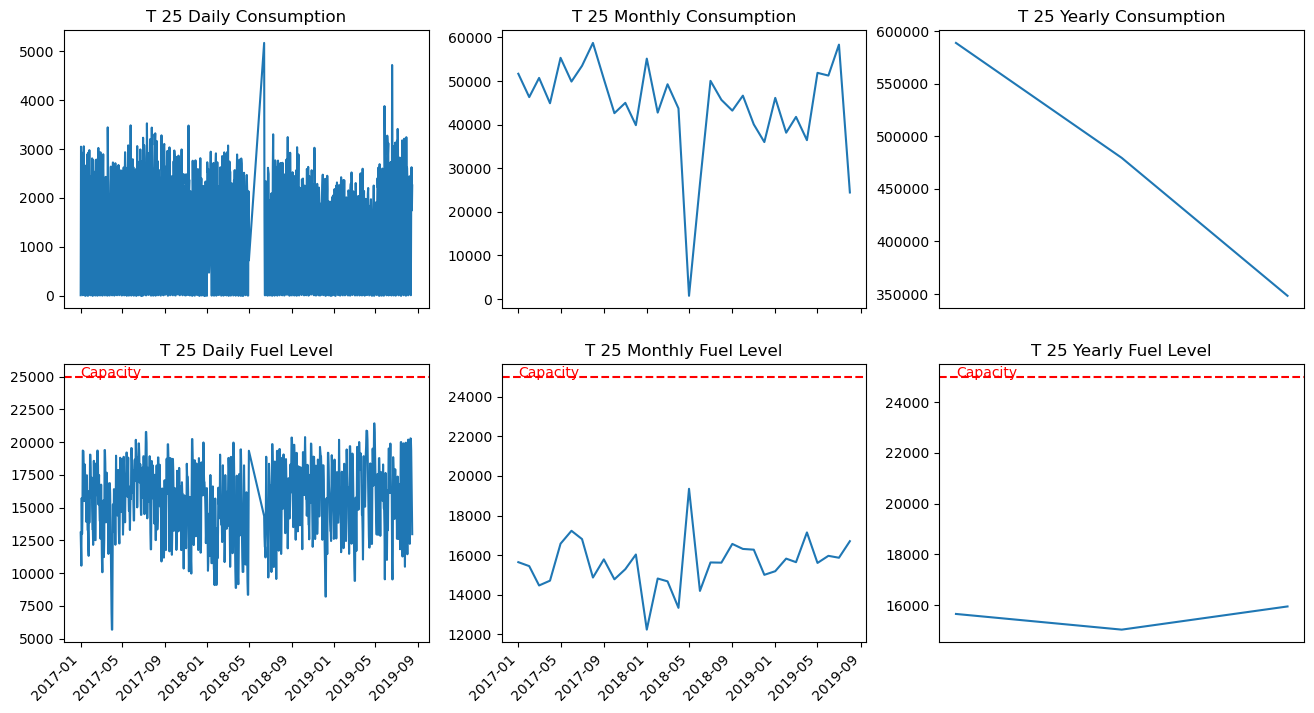

*****************************************************************DIVIDING LINE*****************************************************************


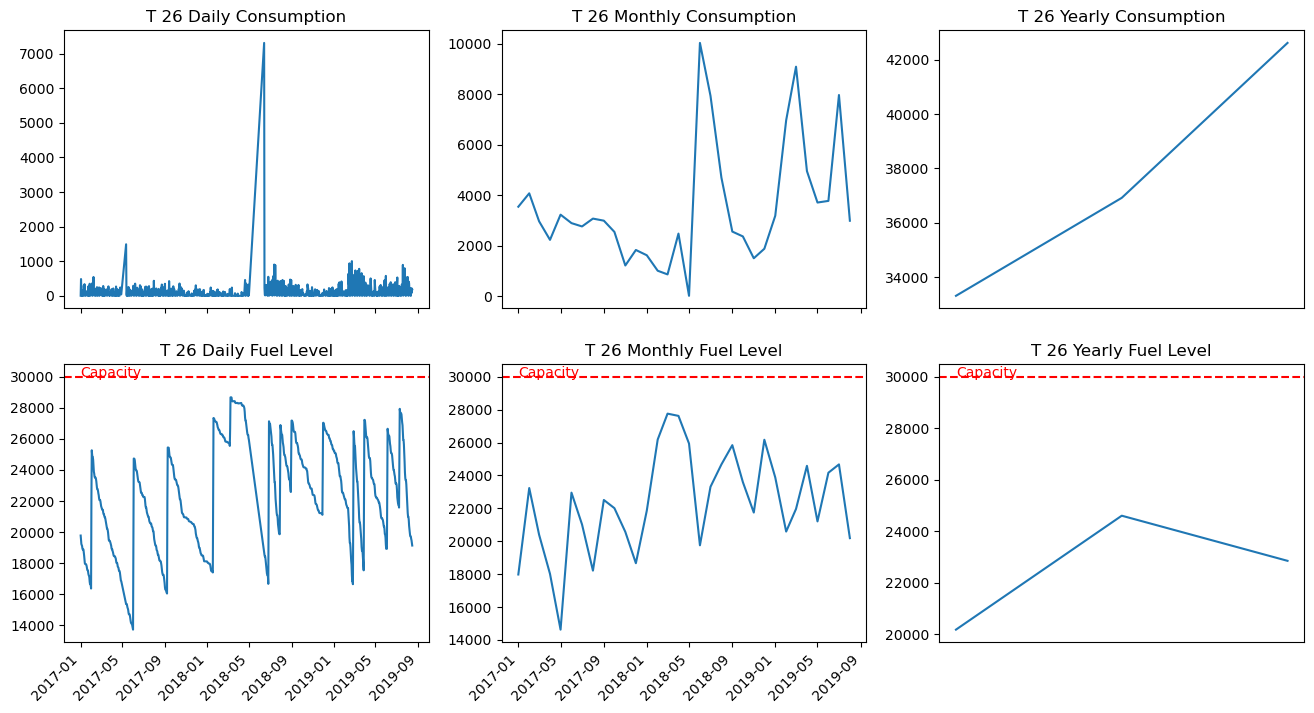

*****************************************************************DIVIDING LINE*****************************************************************


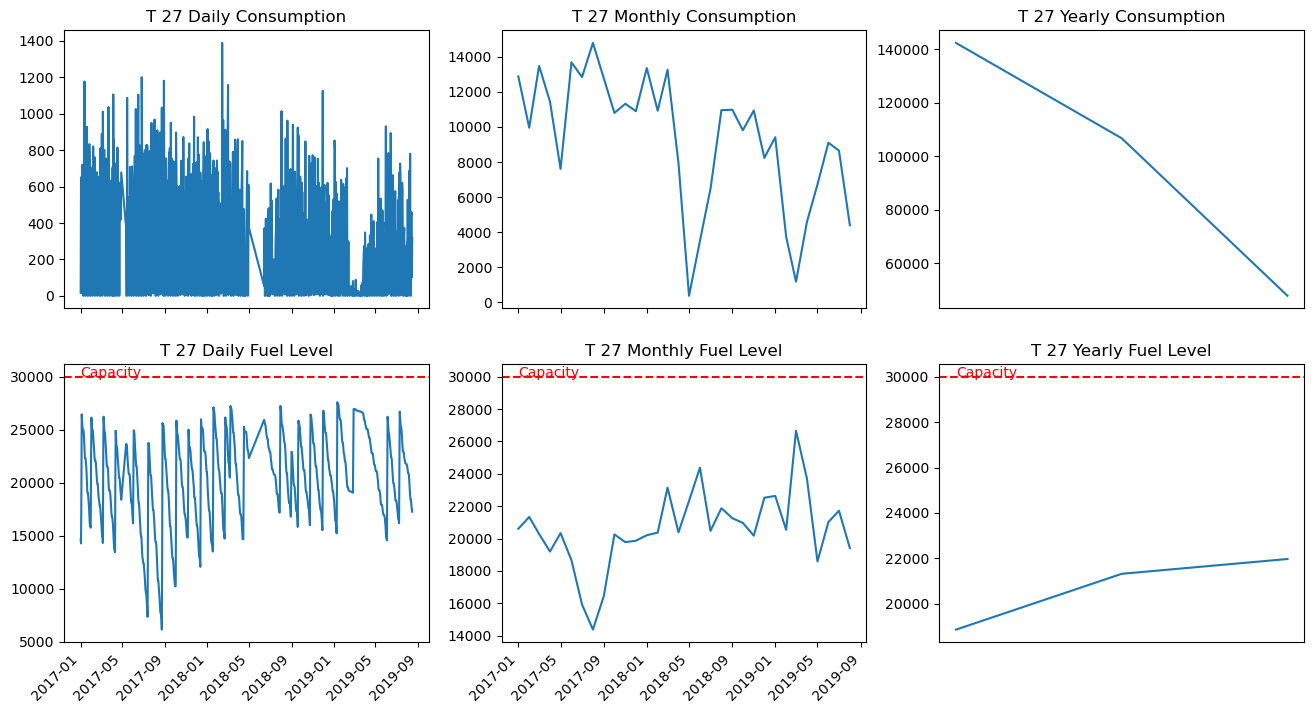

*****************************************************************DIVIDING LINE*****************************************************************


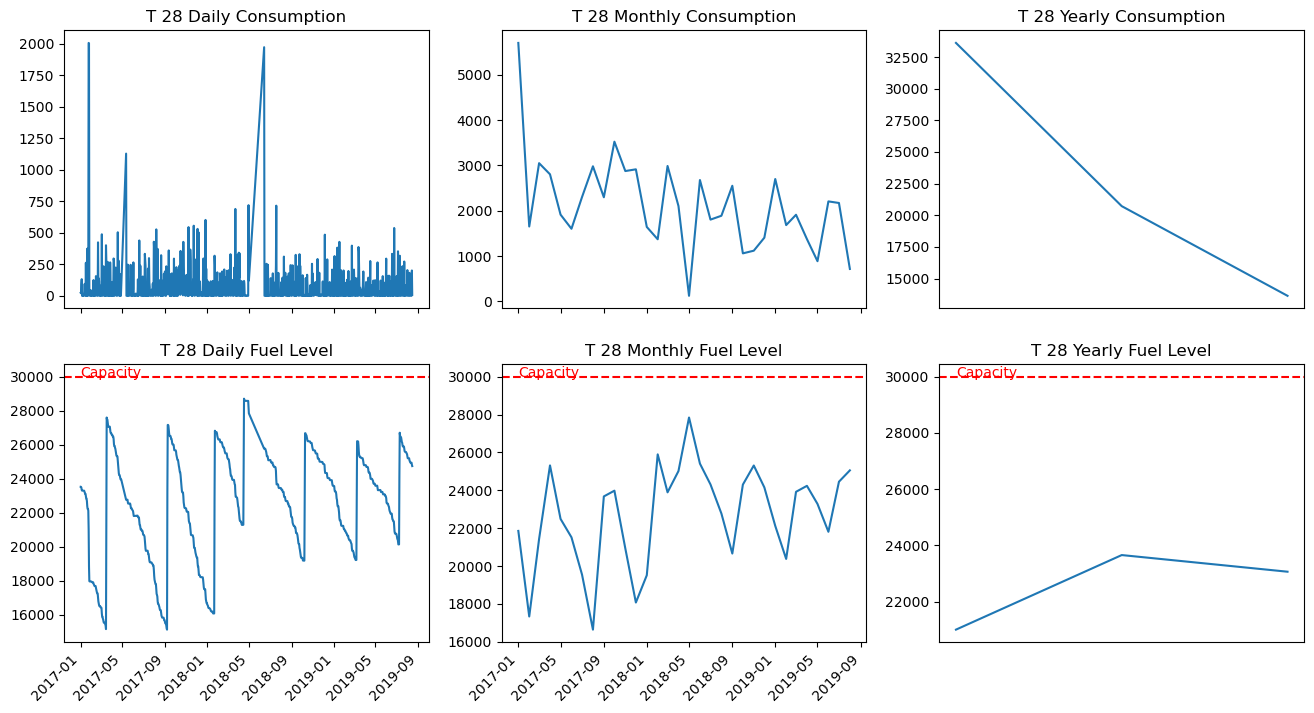

*****************************************************************DIVIDING LINE*****************************************************************


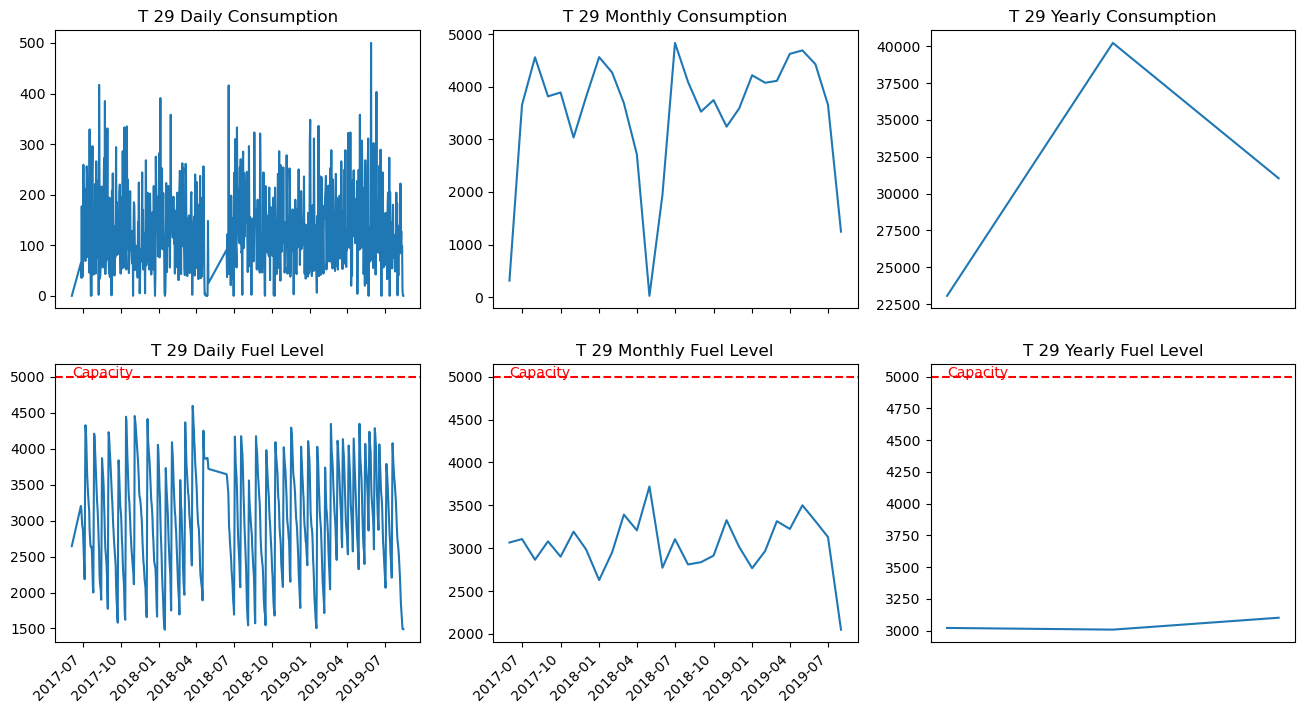

*****************************************************************DIVIDING LINE*****************************************************************


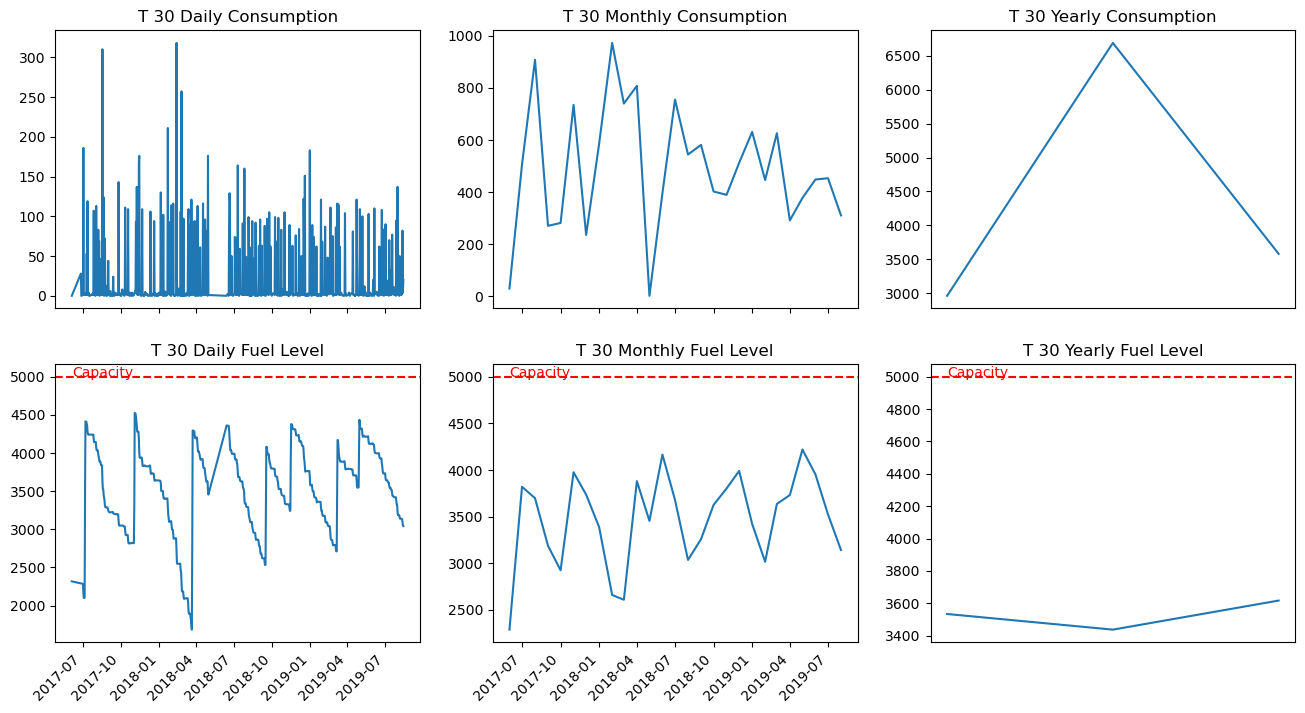

*****************************************************************DIVIDING LINE*****************************************************************


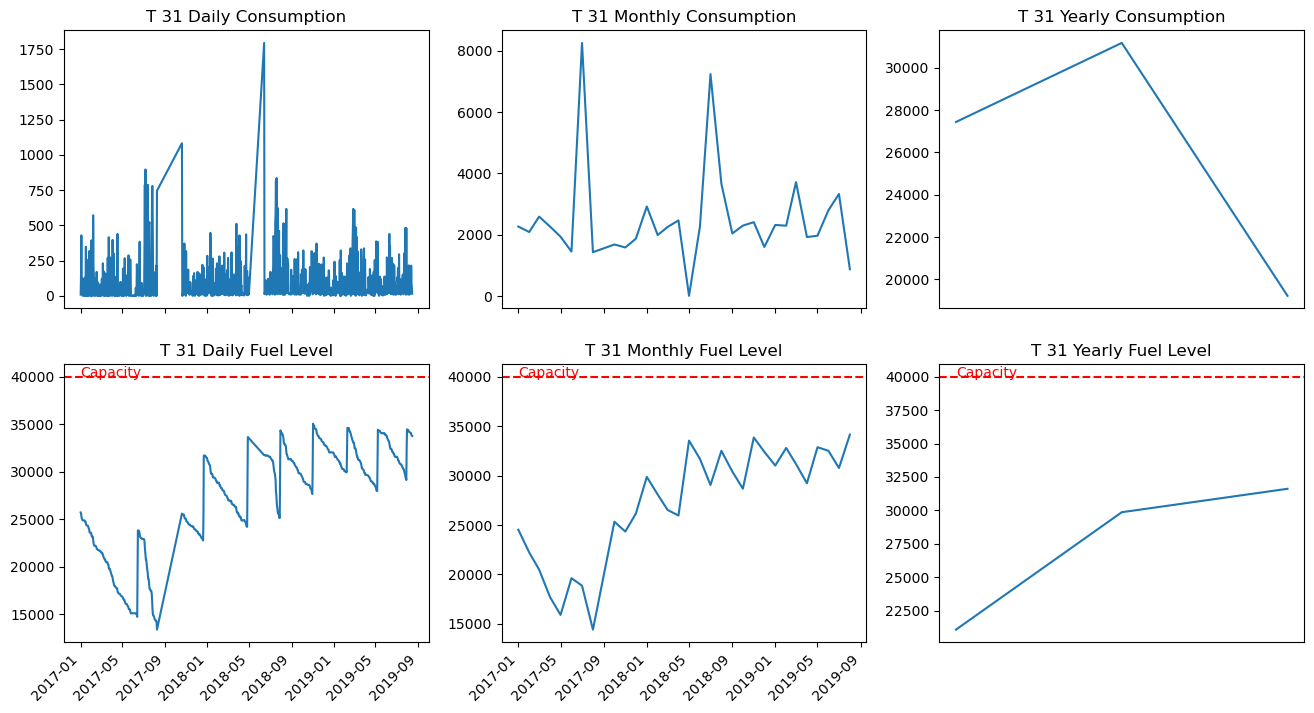

*****************************************************************DIVIDING LINE*****************************************************************


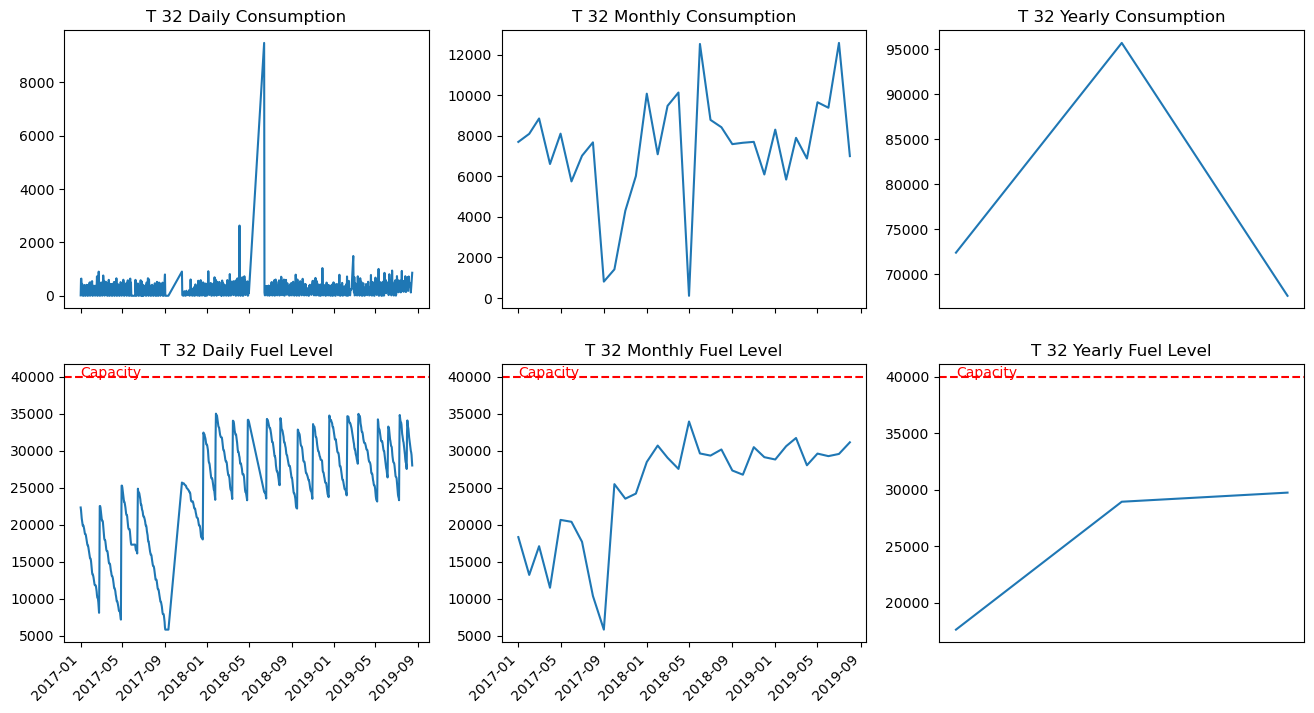

*****************************************************************DIVIDING LINE*****************************************************************


In [87]:
tank_ids = df_tanks['TANK_ID'].tolist()
df_saving = pd.DataFrame(columns=['Tank_ID', 'Best_refill_Days', 'Discount', 'Best_saving', 'Best_refill_quantity', 'Best_saving_after_npv'])


for tank in tank_ids:
    df = tank_fuel_level_data.get(tank)
    df = df.copy()
    df['Date'] = df['TIME_STAMP'].dt.normalize()
    df.loc[:, 'Month'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))
    df.loc[:, 'Year'] = pd.to_datetime(df['Date'].dt.year)
    
    df['Consumption'] = (df['FUEL_LEVEL'].shift(1) - df['FUEL_LEVEL'])
    df.loc[df['Consumption'] < 0, 'Consumption'] = 0
    
    df_daily_consumption = df.groupby(by=['Date'], as_index=False).Consumption.sum()
    df_monthly_consumption = df.groupby(by=['Month'], as_index=False).Consumption.sum()
    df_yearly_consumption = df.groupby(by=['Year'], as_index=False).Consumption.sum()
    
    df_daily_fuel_level = df.groupby(by=['Date'], as_index=False)['FUEL_LEVEL'].mean()
    df_monthly_fuel_level = df.groupby(by=['Month'], as_index=False)['FUEL_LEVEL'].mean()
    df_yearly_fuel_level = df.groupby(by=['Year'], as_index=False)['FUEL_LEVEL'].mean()
    
    capacity = df_tanks[df_tanks['TANK_ID'] == tank]['TANK_CAPACITY'].iloc[0]
    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
    ax[0,0].plot(df_daily_consumption['Date'], df_daily_consumption['Consumption'])
    ax[0,0].set_title(tank + ' Daily Consumption')
    
    ax[0,1].plot(df_monthly_consumption['Month'], df_monthly_consumption['Consumption'])
    ax[0,1].set_title(tank + ' Monthly Consumption')
    
    ax[0,2].plot(df_yearly_consumption['Year'], df_yearly_consumption['Consumption'])
    ax[0,2].set_title(tank + ' Yearly Consumption')

    ax[1,0].plot(df_daily_fuel_level['Date'], df_daily_fuel_level['FUEL_LEVEL'])
    ax[1,0].axhline(y=capacity, color='r', linestyle='--')
    ax[1,0].text(df_daily_fuel_level['Date'].iloc[0], capacity, 'Capacity', color='r')
    ax[1,0].set_title(tank + ' Daily Fuel Level')
    
    ax[1,1].plot(df_monthly_fuel_level['Month'], df_monthly_fuel_level['FUEL_LEVEL'])
    ax[1,1].axhline(y=capacity, color='r', linestyle='--')
    ax[1,1].text(df_monthly_fuel_level['Month'].iloc[0], capacity, 'Capacity', color='r')
    ax[1,1].set_title(tank + ' Monthly Fuel Level')
    
    ax[1,2].plot(df_yearly_fuel_level['Year'], df_yearly_fuel_level['FUEL_LEVEL'])
    ax[1,2].axhline(y=capacity, color='r', linestyle='--')
    ax[1,2].text(df_yearly_fuel_level['Year'].iloc[0], capacity, 'Capacity', color='r')
    ax[1,2].set_title(tank + ' Yearly Fuel Level')

    fig.autofmt_xdate(rotation = 45)
    plt.show()
    #print('*' * 65 + 'DIVIDING LINE' + '*' * 65)
    
    #--------------------------------------------------------------------------------------
    current_refill_days = 0
    best_refill_days = 0
    current_saving = 0
    best_saving = 0

    capacity_string = f'<h2>Capacity for {tank} is: {capacity}<h2>'
    display(HTML(capacity_string))
    
    avg_daily_consumption = df_daily_consumption.Consumption.mean()
    consumption_string = f'<h2>Average daily consumption for {tank} is: {avg_daily_consumption: .2f}<h2>'
    display(HTML(consumption_string))
    
    for current_refill_days in range(1, int(capacity / avg_daily_consumption)+1):
        refill_quantity = current_refill_days * avg_daily_consumption
        if 0 <= refill_quantity <= 15000:
            discount = 0
        elif 15000 < refill_quantity <= 25000:
            discount = 0.02
        elif 25000 < refill_quantity <= 40000:
            discount = 0.03
        elif 40000 < refill_quantity:
            discount = 0.04
        
        each_time_saving = discount * refill_quantity
        total_days = len(cum_inflation1) * 30
        current_saving = each_time_saving * int(total_days / current_refill_days)
        if current_saving > best_saving:
            best_saving = current_saving
            best_refill_days = current_refill_days
    result_string = f'<h2>Best refill days for {tank} is {best_refill_days}, Best discount for {tank} is {discount}, Best total saving for {tank} is {best_saving: .2f}, Best refill quantity for {tank} is {refill_quantity: .2f}</h2>'
    display(HTML(result_string))
    
    total_saving_after_npv = 0
    count_days = 0
    
    if best_refill_days == 0:
        best_refill_days = 1
        
    if int(30 / best_refill_days) >= 1:
        for i in cum_inflation1:
            if best_refill_days <= 30:
                saving_after_npv =  each_time_saving * int(30 / best_refill_days) / i
                total_saving_after_npv += saving_after_npv
            else:
                count_days = divmod(best_refill_days,30)
                saving_after_npv =  each_time_saving * int(30 / count_days) / i
                total_saving_after_npv += saving_after_npv
                
    elif int(30 / best_refill_days) < 1:
        yearly_refill_time = int(best_refill_days / 30)
        for j in range(1, int(total_days / best_refill_days)+1):
            saving_after_npv = each_time_saving / cum_inflation1[j] * yearly_refill_time
            total_saving_after_npv += saving_after_npv
                
    npv_string = f'<h2>Best total saving after npv is {total_saving_after_npv: .2f}<h2>'
    display(HTML(npv_string))
    
    print('*' * 65 + 'DIVIDING LINE' + '*' * 65)
    
    df_saving = pd.concat([df_saving, pd.DataFrame.from_dict({'Tank_ID': tank, 
                                                           'Best_refill_Days': best_refill_days, 
                                                           'Discount': discount,
                                                           'Best_saving':best_saving,
                                                           'Best_refill_quantity':refill_quantity,
                                                           'Best_saving_after_npv':total_saving_after_npv}, 
                                                          orient='index').T], ignore_index=True)

In [88]:
df_saving

Tank_ID Best_refill_Days Discount    Best_saving Best_refill_quantity  \
0     T 10                9     0.03   90270.860204         39512.497732   
1     T 11                6     0.03  140435.305102          37827.69161   
2     T 12                6     0.03  142160.733673         38292.453515   
3     T 14                9     0.03   98469.355505         39785.598184   
4     T 15               11     0.03    71489.65102         38512.943311   
5     T 16               30     0.04   65453.427571         69420.301969   
6     T 17               15     0.03   72024.807112         38801.242888   
7     T 18               18     0.03   45053.502735         39440.776805   
8     T 19               30     0.04   67069.575492         69440.722101   
9     T 20               52     0.03   16344.643621         29777.690808   
10    T 21               55     0.03   14191.801671         29625.983287   
11    T 22               15     0.03   56436.135528         39904.338252   
12    T 23               15     0.03    62535.05244         37900.031782   
13    T 24               18     0.02   21159.195181         24578.863089   
14    T 25               11     0.02   30719.428916         24823.780942   
15    T 26              239     0.03    3592.066548         29933.887902   
16    T 27               90     0.03    9790.023196          29996.36737   
17    T 28              397     0.03    1796.784107         29946.401776   
18    T 29                1        0              0          4991.312076   
19    T 30                1        0              0          4991.552239   
20    T 31              330     0.03    2754.984744         39979.744934   
21    T 32               99     0.03    8027.617087         39732.650229   

   Best_saving_after_npv  
0           94628.295003  
1          150988.934572  
2          152844.028072  
3           95282.341989  
4           61489.644546  
5           73890.824321  
6           61949.942748  
7           31485.510297  
8           73912.559466  
9           15061.234455  
10          14303.982998  
11          63711.141347  
12          60511.071921  
13           13080.84525  
14           26422.38055  
15          24455.835379  
16          27844.239006  
17          22967.068321  
18                   0.0  
19                   0.0  
20          38699.522469  
21          33723.958698

In [89]:
df_saving_with_location = pd.merge(df_saving, 
                                   df_tanks[['TANK_ID', 'TANK_LOCATION', 'TANK_TYPE']],
                                   left_on = 'Tank_ID',
                                   right_on = 'TANK_ID',
                                   how = 'left')

df_saving_with_location

Tank_ID Best_refill_Days Discount    Best_saving Best_refill_quantity  \
0     T 10                9     0.03   90270.860204         39512.497732   
1     T 11                6     0.03  140435.305102          37827.69161   
2     T 12                6     0.03  142160.733673         38292.453515   
3     T 14                9     0.03   98469.355505         39785.598184   
4     T 15               11     0.03    71489.65102         38512.943311   
5     T 16               30     0.04   65453.427571         69420.301969   
6     T 17               15     0.03   72024.807112         38801.242888   
7     T 18               18     0.03   45053.502735         39440.776805   
8     T 19               30     0.04   67069.575492         69440.722101   
9     T 20               52     0.03   16344.643621         29777.690808   
10    T 21               55     0.03   14191.801671         29625.983287   
11    T 22               15     0.03   56436.135528         39904.338252   
12    T 23               15     0.03    62535.05244         37900.031782   
13    T 24               18     0.02   21159.195181         24578.863089   
14    T 25               11     0.02   30719.428916         24823.780942   
15    T 26              239     0.03    3592.066548         29933.887902   
16    T 27               90     0.03    9790.023196          29996.36737   
17    T 28              397     0.03    1796.784107         29946.401776   
18    T 29                1        0              0          4991.312076   
19    T 30                1        0              0          4991.552239   
20    T 31              330     0.03    2754.984744         39979.744934   
21    T 32               99     0.03    8027.617087         39732.650229   

   Best_saving_after_npv TANK_ID  TANK_LOCATION TANK_TYPE  
0           94628.295003    T 10              1         G  
1          150988.934572    T 11              1         G  
2          152844.028072    T 12              1         D  
3           95282.341989    T 14              1         G  
4           61489.644546    T 15              1         D  
5           73890.824321    T 16              2         G  
6           61949.942748    T 17              2         D  
7           31485.510297    T 18              2         G  
8           73912.559466    T 19              2         D  
9           15061.234455    T 20              3         G  
10          14303.982998    T 21              3         D  
11          63711.141347    T 22              4         G  
12          60511.071921    T 23              4         D  
13           13080.84525    T 24              5         D  
14           26422.38055    T 25              5         G  
15          24455.835379    T 26              6         G  
16          27844.239006    T 27              6         G  
17          22967.068321    T 28              6         D  
18                   0.0    T 29              7         G  
19                   0.0    T 30              7         D  
20          38699.522469    T 31              8         D  
21          33723.958698    T 32              8         G

In [90]:
sum_new_discount = df_saving_with_location.groupby(['TANK_LOCATION','TANK_TYPE'])['Best_saving_after_npv'].sum()
sum_new_discount

TANK_LOCATION  TANK_TYPE
1              D            214333.672618
               G            340899.571564
2              D            135862.502213
               G            105376.334618
3              D             14303.982998
               G             15061.234455
4              D             60511.071921
               G             63711.141347
5              D              13080.84525
               G              26422.38055
6              D             22967.068321
               G             52300.074385
7              D                      0.0
               G                      0.0
8              D             38699.522469
               G             33723.958698
Name: Best_saving_after_npv, dtype: object

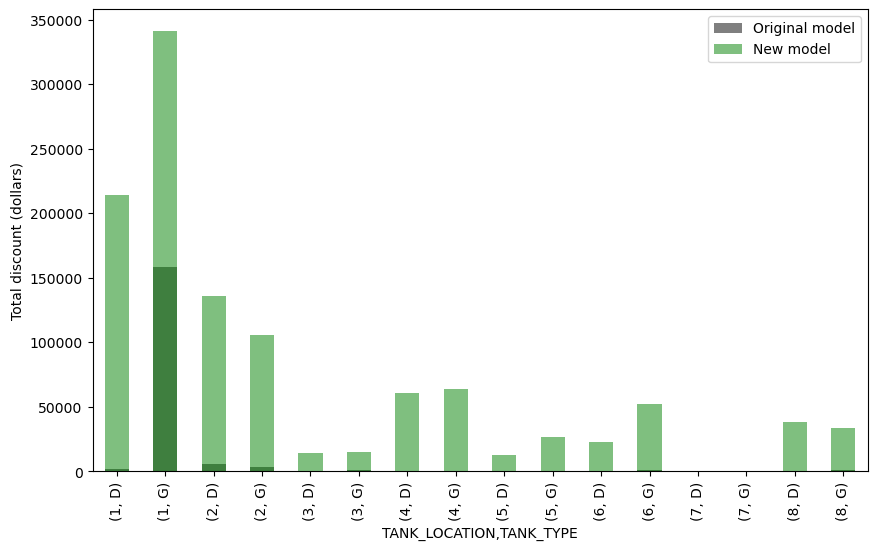

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

sum_discount.plot(kind = 'bar', ax = ax, color = 'black', alpha = 0.5, label = 'Original model')
sum_new_discount.plot(kind = 'bar', ax = ax, color = 'green', alpha = 0.5, label = 'New model')

ax.set_ylabel('Total discount (dollars)')
ax.legend()

plt.show()